In [1881]:
import numpy as np
import pandas as pd
import networkx as nx
from operator import itemgetter
from tabulate import tabulate

# Passing Network Functions

In [1882]:
def make_table(g):
    PM=g
    degree_dict = dict(PM.degree(PM.nodes()))
    
    closeness_dict = nx.closeness_centrality(PM)
    nx.set_node_attributes(PM, closeness_dict, 'closeness')
    top_closeness = closeness_dict.items()
    close=[tc[1] for tc in top_closeness]
    
    betweenness_dict = nx.betweenness_centrality(PM)
    nx.set_node_attributes(PM, betweenness_dict, 'betweenness')
    top_betweenness = betweenness_dict.items()
    betw=[tb[1] for tb in top_betweenness]

    pagerank_dict = nx.pagerank(PM, alpha=0.85)
    nx.set_node_attributes(PM, pagerank_dict, 'pagerank')
    top_pagerank = pagerank_dict.items()
    page=[tb[1] for tb in top_pagerank]

    nx.set_node_attributes(PM, degree_dict, 'degree')
    top_degree = degree_dict.items()
    deg=[tb[1] for tb in top_degree]
    player=[tb[0] for tb in top_pagerank]
    
    clustering_dict = nx.clustering(PM)
    nx.set_node_attributes(PM, clustering_dict, 'clustering')
    top_clustering = clustering_dict.items()
    clust=[t[1] for t in top_clustering]
    df=pd.DataFrame({"player":player,"cls_cent":close,"bet_cent":betw,"p_rank":page,"deg_cent":deg,"cliques":clust})
    print(tabulate(df, headers='keys', tablefmt='psql'))    
    
def generate_graph(x1,y1,x2,y2):
    no_name_0_10=arr[x1:y1,x2:y2]
    matrix=arr[x1:y1,x2+3:y2+11]
    index_to_no_map={}
    ind=0
    for i,j,k in no_name_0_10:
        index_to_no_map[ind]=i
        ind+=1
    PM=nx.DiGraph()
    n,m=matrix.shape
    for i in range(n):
        for j in range(m):
            if(matrix[i][j]!=0):
                PM.add_edge(index_to_no_map[i],index_to_no_map[j],weight=matrix[i][j])
    return PM 

def close_cent(PM):
    degree_dict = dict(PM.degree(PM.nodes()))
    closeness_dict = nx.closeness_centrality(PM)
    nx.set_node_attributes(PM, closeness_dict, 'closeness')
    sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)
    top_closeness = sorted_closeness[:11]
    for tc in top_closeness:
        degree = degree_dict[tc[0]]
        print("Player: ", tc[0], "| Closeness Centrality: ", tc[1], "| Degree: ", degree)
    print("")
    
def bet_cent(PM):
    degree_dict = dict(PM.degree(PM.nodes()))
    betweenness_dict = nx.betweenness_centrality(PM)
    nx.set_node_attributes(PM, betweenness_dict, 'betweenness')
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
    top_betweenness = sorted_betweenness[:11]
    for tb in top_betweenness: 
        degree = degree_dict[tb[0]] 
        print("Player: ", tb[0], "| Betweenness Centrality: ", tb[1], "| Degree: ", degree)
    print("")
    
def pr_cent(PM):
    degree_dict = dict(PM.degree(PM.nodes()))
    pagerank_dict = nx.pagerank(PM, alpha=0.85)
    nx.set_node_attributes(PM, pagerank_dict, 'pagerank')
    sorted_pagerank = sorted(pagerank_dict.items(), key=itemgetter(1), reverse=True)
    top_pagerank = sorted_pagerank[:11]
    for tpr in top_pagerank:
        degree = degree_dict[tpr[0]]
        print("Player: ", tpr[0], "| Page Rank Centrality: ", tpr[1], "| Degree: ", degree)
    print("")
    
def clust_coef(PM):
    degree_dict = dict(PM.degree(PM.nodes()))
    clustering_dict = nx.clustering(PM)
    nx.set_node_attributes(PM, clustering_dict, 'clustering')
    sorted_clustering = sorted(clustering_dict.items(), key=itemgetter(1), reverse=True)
    top_clustering = sorted_clustering[:11]
    for tcl in top_clustering:
        degree = degree_dict[tcl[0]]
        print("Player: ", tcl[0], "| Clustering Coefficient ", tcl[1], "| Degree: ", degree)
    print("")
    avg_clust=nx.average_clustering(PM, nodes=None, weight=None, count_zeros=True)
    print("The Global Average Clustering Coefficient is ", avg_clust)
    print("")
    
def density(g):
    print("")
    density = nx.density(g)
    print("Network density:", density)
    print("")
    
def cliques(g):
    print("The largest cliques are:")
    l=list(nx.find_cliques(g.to_undirected()))
    for i in l:
        print(*i)
    print()
    
def deg_cent(PM):
    degree_dict = dict(PM.degree(PM.nodes()))
    nx.set_node_attributes(PM, degree_dict, 'degree')
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    top_degree = sorted_degree[:11]
    for td in top_degree:
        degree = degree_dict[td[0]]
        print("Player: ", td[0], "| Degree Centrality: ", td[1])
    print("")
    
def no_weekly(g):
    print("number of weakly connected components:",nx.number_weakly_connected_components(g))
    
def comunicability(g):
    print(nx.communicability(g.to_undirected()))
    
def details(g):
    close_cent(g)
    deg_cent(g)
    pr_cent(g)
    bet_cent(g)
    clust_coef(g)
    no_weekly(g)
    density(g)
    cliques(g)
    nx.draw(g, with_labels = True)

# Interception Functions

In [1883]:
def closeness_cent(PM):
    degree_dict = dict(PM.degree(PM.nodes()))
    closeness_dict = nx.closeness_centrality(PM)
    nx.set_node_attributes(PM, closeness_dict, 'closeness')
    sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)
    top_closeness = sorted_closeness[:11]
    for tc in top_closeness:
        degree = degree_dict[tc[0]]
        print("Player: ", tc[0], "| Closeness Centrality: ", tc[1], "| Degree: ", degree)
    print("")


def betweeness_cent(PM):
    degree_dict = dict(PM.degree(PM.nodes()))
    betweenness_dict = nx.betweenness_centrality(PM)
    nx.set_node_attributes(PM, betweenness_dict, 'betweenness')
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
    top_betweenness = sorted_betweenness[:11]
    for tb in top_betweenness: 
        degree = degree_dict[tb[0]] 
        print("Player: ", tb[0], "| Betweenness Centrality: ", tb[1], "| Degree: ", degree)
    print("")
    
def pageRank_cent(PM):
    degree_dict = dict(PM.degree(PM.nodes()))
    pagerank_dict = nx.pagerank(PM, alpha=0.85)
    nx.set_node_attributes(PM, pagerank_dict, 'pagerank')
    sorted_pagerank = sorted(pagerank_dict.items(), key=itemgetter(1), reverse=True)
    top_pagerank = sorted_pagerank[:11]
    for tpr in top_pagerank:
        degree = degree_dict[tpr[0]]
        print("Player: ", tpr[0], "| Page Rank Centrality: ", tpr[1], "| Degree: ", degree)
    print("")
    
def clustring_coef(PM):
    degree_dict = dict(PM.degree(PM.nodes()))
    clustering_dict = nx.clustering(PM)
    nx.set_node_attributes(PM, clustering_dict, 'clustering')
    sorted_clustering = sorted(clustering_dict.items(), key=itemgetter(1), reverse=True)
    top_clustering = sorted_clustering[:11]
    for tcl in top_clustering:
        degree = degree_dict[tcl[0]]
        print("Player: ", tcl[0], "| Clustering Coefficient ", tcl[1], "| Degree: ", degree)
    print("")
    avg_clust=nx.average_clustering(PM, nodes=None, weight=None, count_zeros=True)
    print("The Global Average Clustering Coefficient is ", avg_clust)
    print("")
    
def density(g):
    print("")
    density = nx.density(g)
    print("Network density:", density)
    print("")
    
def degree_cent(PM):
    degree_dict = dict(PM.degree(PM.nodes()))
    nx.set_node_attributes(PM, degree_dict, 'degree')
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    top_degree = sorted_degree[:11]
    for td in top_degree:
        degree = degree_dict[td[0]]
        print("Player: ", td[0], "| Degree Centrality: ", td[1])
    print("")
    
def comunicability(g):
    print(nx.communicability(g.to_undirected()))
    
def no_of_weakly_connected(g):
    print("The number of weakly connected components:",nx.number_weakly_connected_components(g))
    
def display_details(g):
    degree_cent(g)
    closeness_cent(g)
    betweeness_cent(g)
    pageRank_cent(g)
    clustring_coef(g)

In [1884]:
def Interceptions(x1,x2,y1,y2,t1_color,t2_color,interceptedPlayers):
  segment=dfs.iloc[x1:x2,y1:y2]
  display(segment)
  S= nx.DiGraph()
  t1=[ c for c in segment]
  t1.remove(t1[0])
  t2=list(segment.loc[:,interceptedPlayers])
  t2.remove(t2[0])
  S.add_nodes_from(t1)
  S.add_nodes_from(t2)
  nodes=list(S.nodes())
  colors=[]
  for i in nodes:
    if i in t1:
      colors.append(t1_color)
    elif i in t2:
      colors.append(t2_color)
  a = np.delete(segment.to_numpy(), 0,axis=1)
  a = np.delete(a, 0,axis=0)

  for i in range(a.shape[0]):
      for j in range(a.shape[1]):
          if(a[i][j]!=0):
                S.add_edge(t1[j],t2[i])
  d=dict(S.degree)
  pos = nx.spring_layout(S, k=1, iterations=22)      
  nx.draw(S,pos,with_labels=True, node_color=colors,node_shape='h',node_size=[v * 1000 for v in d.values()])

  display_details(S)

# Match 1: Liverpool vs West Ham

In [1885]:
arr=pd.read_excel("LIVMatches.xlsx", sheet_name='LIV vs WHU').to_numpy()

# Liverpool Passing Analysis

The details of 0-10 mins are:
Player:  2 | Closeness Centrality:  0.7363636363636364 | Degree:  11
Player:  4 | Closeness Centrality:  0.5785714285714286 | Degree:  9
Player:  21 | Closeness Centrality:  0.54 | Degree:  8
Player:  66 | Closeness Centrality:  0.54 | Degree:  12
Player:  11 | Closeness Centrality:  0.54 | Degree:  9
Player:  19 | Closeness Centrality:  0.50625 | Degree:  9
Player:  28 | Closeness Centrality:  0.47647058823529415 | Degree:  6
Player:  23 | Closeness Centrality:  0.4263157894736842 | Degree:  3
Player:  27 | Closeness Centrality:  0.4 | Degree:  1
Player:  3 | Closeness Centrality:  0.3857142857142857 | Degree:  7
Player:  1 | Closeness Centrality:  0.0 | Degree:  1

Player:  66 | Degree Centrality:  12
Player:  2 | Degree Centrality:  11
Player:  4 | Degree Centrality:  9
Player:  11 | Degree Centrality:  9
Player:  19 | Degree Centrality:  9
Player:  21 | Degree Centrality:  8
Player:  3 | Degree Centrality:  7
Player:  28 | Degree Centrality:  6
Player:

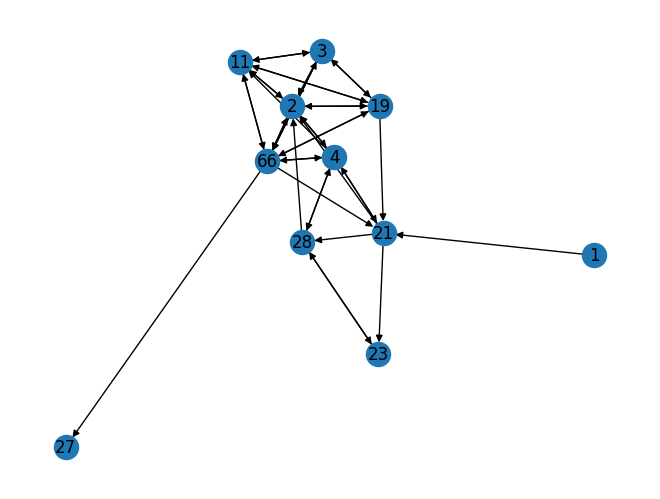

In [1886]:
# Liverpool 0-10 mins
print("The details of 0-10 mins are:")
details(generate_graph(6,17,2,5))
make_table(generate_graph(6,17,2,5))

The details of 10-20 mins are:
Player:  26 | Closeness Centrality:  0.7142857142857143 | Degree:  11
Player:  66 | Closeness Centrality:  0.7142857142857143 | Degree:  14
Player:  8 | Closeness Centrality:  0.625 | Degree:  8
Player:  3 | Closeness Centrality:  0.625 | Degree:  11
Player:  10 | Closeness Centrality:  0.625 | Degree:  8
Player:  23 | Closeness Centrality:  0.5882352941176471 | Degree:  5
Player:  14 | Closeness Centrality:  0.5882352941176471 | Degree:  7
Player:  11 | Closeness Centrality:  0.5882352941176471 | Degree:  7
Player:  4 | Closeness Centrality:  0.5555555555555556 | Degree:  7
Player:  5 | Closeness Centrality:  0.5263157894736842 | Degree:  9
Player:  1 | Closeness Centrality:  0.0 | Degree:  1

Player:  66 | Degree Centrality:  14
Player:  26 | Degree Centrality:  11
Player:  3 | Degree Centrality:  11
Player:  5 | Degree Centrality:  9
Player:  8 | Degree Centrality:  8
Player:  10 | Degree Centrality:  8
Player:  4 | Degree Centrality:  7
Player:  14 | 

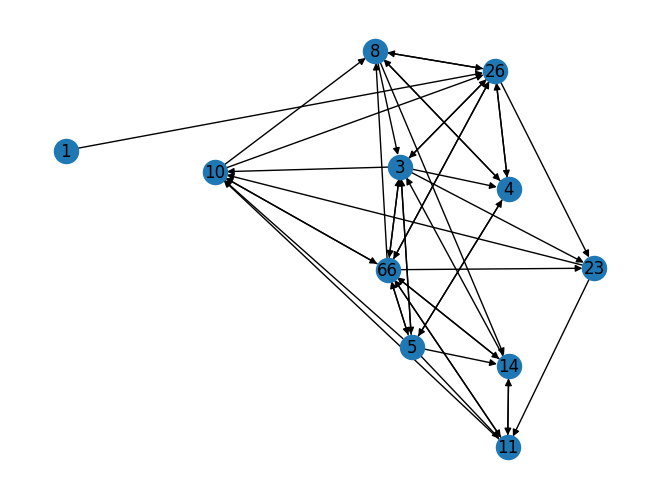

In [1887]:
# Liverpool 10-20 mins
print("The details of 10-20 mins are:")
details(generate_graph(22-2,33-2,2,5))

The details of 20-30 mins are:
Player:  4 | Closeness Centrality:  0.7692307692307693 | Degree:  12
Player:  66 | Closeness Centrality:  0.7142857142857143 | Degree:  14
Player:  10 | Closeness Centrality:  0.7142857142857143 | Degree:  8
Player:  3 | Closeness Centrality:  0.6666666666666666 | Degree:  14
Player:  8 | Closeness Centrality:  0.5882352941176471 | Degree:  9
Player:  23 | Closeness Centrality:  0.5882352941176471 | Degree:  7
Player:  11 | Closeness Centrality:  0.5882352941176471 | Degree:  7
Player:  5 | Closeness Centrality:  0.5555555555555556 | Degree:  8
Player:  26 | Closeness Centrality:  0.5555555555555556 | Degree:  8
Player:  14 | Closeness Centrality:  0.5555555555555556 | Degree:  7
Player:  1 | Closeness Centrality:  0.45454545454545453 | Degree:  4

Player:  66 | Degree Centrality:  14
Player:  3 | Degree Centrality:  14
Player:  4 | Degree Centrality:  12
Player:  8 | Degree Centrality:  9
Player:  5 | Degree Centrality:  8
Player:  26 | Degree Centrality

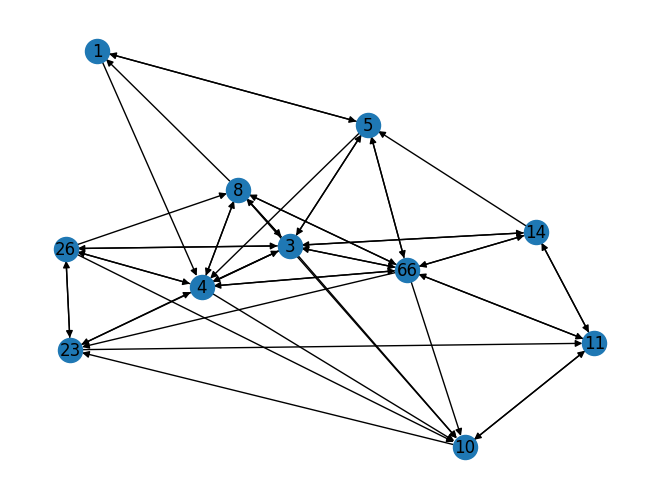

In [1888]:
# Liverpool 20-30 mins
print("The details of 20-30 mins are:")
details(generate_graph(36-2,47-2,2,5))

The details of 30-40 mins are:
Player:  66 | Closeness Centrality:  0.7142857142857143 | Degree:  10
Player:  26 | Closeness Centrality:  0.7142857142857143 | Degree:  13
Player:  3 | Closeness Centrality:  0.7142857142857143 | Degree:  10
Player:  10 | Closeness Centrality:  0.6666666666666666 | Degree:  8
Player:  4 | Closeness Centrality:  0.5882352941176471 | Degree:  10
Player:  14 | Closeness Centrality:  0.5882352941176471 | Degree:  7
Player:  8 | Closeness Centrality:  0.5882352941176471 | Degree:  7
Player:  5 | Closeness Centrality:  0.5882352941176471 | Degree:  10
Player:  23 | Closeness Centrality:  0.5882352941176471 | Degree:  6
Player:  11 | Closeness Centrality:  0.5263157894736842 | Degree:  4
Player:  1 | Closeness Centrality:  0.4166666666666667 | Degree:  3

Player:  26 | Degree Centrality:  13
Player:  4 | Degree Centrality:  10
Player:  66 | Degree Centrality:  10
Player:  3 | Degree Centrality:  10
Player:  5 | Degree Centrality:  10
Player:  10 | Degree Centra

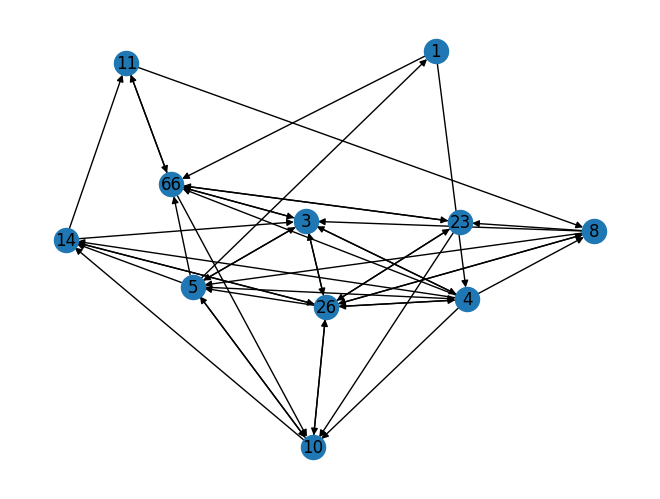

In [1889]:
# Liverpool 30-40 mins
print("The details of 30-40 mins are:")
details(generate_graph(51-2,62-2,2,5))

The details of 40-50 mins are:
Player:  8 | Closeness Centrality:  0.7142857142857143 | Degree:  11
Player:  4 | Closeness Centrality:  0.6666666666666666 | Degree:  9
Player:  26 | Closeness Centrality:  0.625 | Degree:  8
Player:  5 | Closeness Centrality:  0.625 | Degree:  11
Player:  23 | Closeness Centrality:  0.5882352941176471 | Degree:  7
Player:  3 | Closeness Centrality:  0.5882352941176471 | Degree:  7
Player:  14 | Closeness Centrality:  0.5882352941176471 | Degree:  9
Player:  10 | Closeness Centrality:  0.5882352941176471 | Degree:  8
Player:  11 | Closeness Centrality:  0.5882352941176471 | Degree:  8
Player:  1 | Closeness Centrality:  0.5555555555555556 | Degree:  7
Player:  66 | Closeness Centrality:  0.5263157894736842 | Degree:  5

Player:  5 | Degree Centrality:  11
Player:  8 | Degree Centrality:  11
Player:  4 | Degree Centrality:  9
Player:  14 | Degree Centrality:  9
Player:  26 | Degree Centrality:  8
Player:  10 | Degree Centrality:  8
Player:  11 | Degree Ce

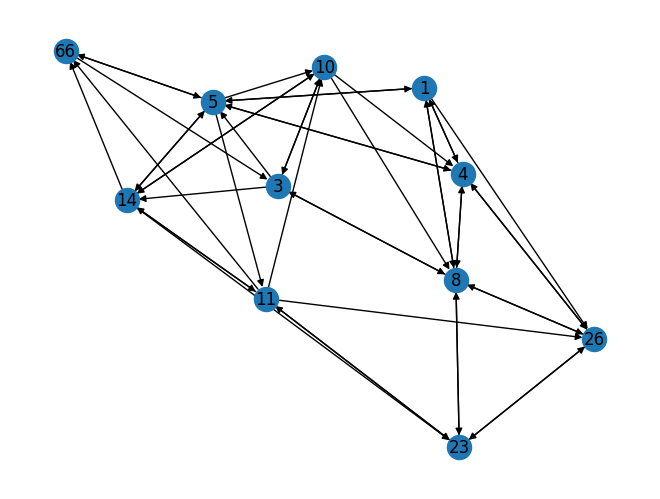

In [1890]:
# Liverpool 40-50 mins
print("The details of 40-50 mins are:")
details(generate_graph(65-2,76-2,2,5))

The details of 50-60 mins are:
Player:  5 | Closeness Centrality:  0.7142857142857143 | Degree:  13
Player:  8 | Closeness Centrality:  0.7142857142857143 | Degree:  10
Player:  66 | Closeness Centrality:  0.6666666666666666 | Degree:  11
Player:  10 | Closeness Centrality:  0.6666666666666666 | Degree:  10
Player:  14 | Closeness Centrality:  0.6666666666666666 | Degree:  8
Player:  4 | Closeness Centrality:  0.625 | Degree:  11
Player:  3 | Closeness Centrality:  0.625 | Degree:  8
Player:  26 | Closeness Centrality:  0.5882352941176471 | Degree:  10
Player:  23 | Closeness Centrality:  0.5263157894736842 | Degree:  5
Player:  1 | Closeness Centrality:  0.45454545454545453 | Degree:  4
Player:  11 | Closeness Centrality:  0.45454545454545453 | Degree:  4

Player:  5 | Degree Centrality:  13
Player:  4 | Degree Centrality:  11
Player:  66 | Degree Centrality:  11
Player:  8 | Degree Centrality:  10
Player:  26 | Degree Centrality:  10
Player:  10 | Degree Centrality:  10
Player:  3 | 

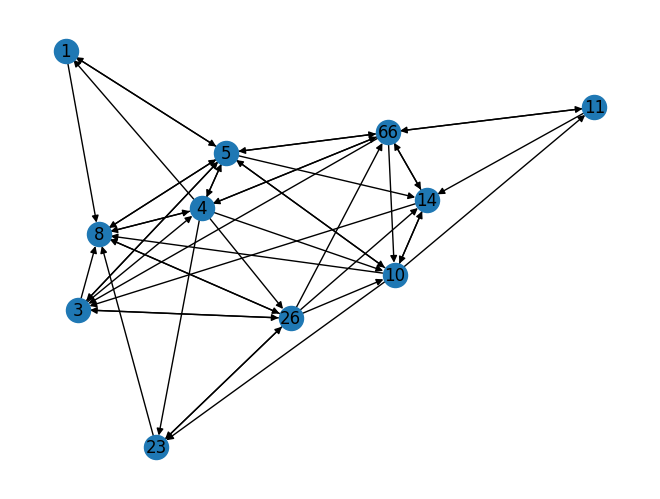

In [1891]:
# Liverpool 50-60 mins
print("The details of 50-60 mins are:")
details(generate_graph(80-2,91-2,2,5))

The details of 60-70 mins are:
Player:  11 | Closeness Centrality:  0.6666666666666666 | Degree:  8
Player:  8 | Closeness Centrality:  0.6666666666666666 | Degree:  10
Player:  10 | Closeness Centrality:  0.6666666666666666 | Degree:  8
Player:  14 | Closeness Centrality:  0.5263157894736842 | Degree:  7
Player:  5 | Closeness Centrality:  0.5263157894736842 | Degree:  7
Player:  23 | Closeness Centrality:  0.5 | Degree:  3
Player:  26 | Closeness Centrality:  0.47619047619047616 | Degree:  5
Player:  66 | Closeness Centrality:  0.47619047619047616 | Degree:  5
Player:  1 | Closeness Centrality:  0.43478260869565216 | Degree:  4
Player:  4 | Closeness Centrality:  0.4166666666666667 | Degree:  5
Player:  3 | Closeness Centrality:  0.3225806451612903 | Degree:  2

Player:  8 | Degree Centrality:  10
Player:  11 | Degree Centrality:  8
Player:  10 | Degree Centrality:  8
Player:  14 | Degree Centrality:  7
Player:  5 | Degree Centrality:  7
Player:  4 | Degree Centrality:  5
Player:  26

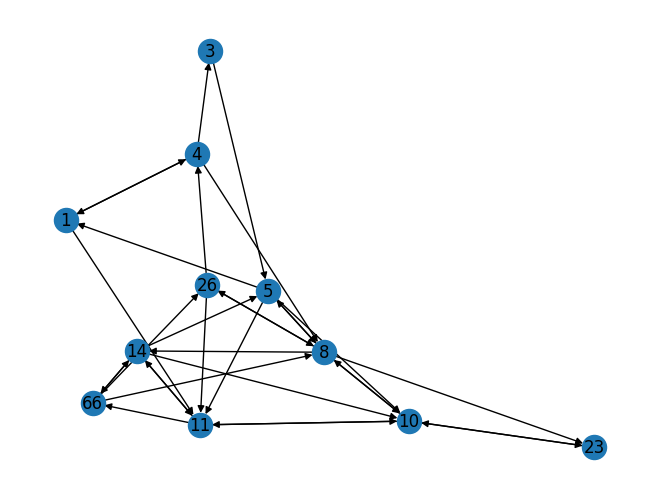

In [1892]:
# Liverpool 60-70 mins
print("The details of 60-70 mins are:")
details(generate_graph(95-2,106-2,2,5))

The details of 70-80 mins are:
Player:  8 | Closeness Centrality:  0.8333333333333334 | Degree:  16
Player:  66 | Closeness Centrality:  0.7142857142857143 | Degree:  11
Player:  14 | Closeness Centrality:  0.7142857142857143 | Degree:  10
Player:  4 | Closeness Centrality:  0.6666666666666666 | Degree:  13
Player:  23 | Closeness Centrality:  0.6666666666666666 | Degree:  10
Player:  26 | Closeness Centrality:  0.625 | Degree:  10
Player:  10 | Closeness Centrality:  0.5882352941176471 | Degree:  6
Player:  5 | Closeness Centrality:  0.5555555555555556 | Degree:  10
Player:  3 | Closeness Centrality:  0.5555555555555556 | Degree:  7
Player:  11 | Closeness Centrality:  0.5555555555555556 | Degree:  4
Player:  1 | Closeness Centrality:  0.47619047619047616 | Degree:  5

Player:  8 | Degree Centrality:  16
Player:  4 | Degree Centrality:  13
Player:  66 | Degree Centrality:  11
Player:  5 | Degree Centrality:  10
Player:  26 | Degree Centrality:  10
Player:  23 | Degree Centrality:  10


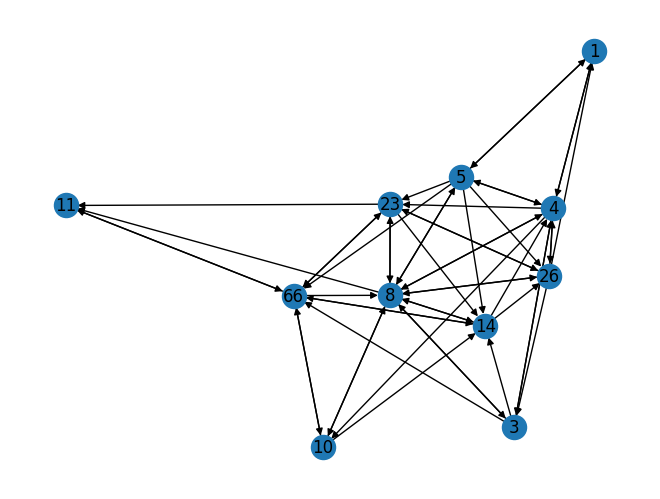

In [1893]:
# Liverpool 70-80 mins
print("The details of 70-80 mins are:")
details(generate_graph(110-2,122-2,2,5))

The details of 80-90 mins are:
Player:  14 | Closeness Centrality:  0.625 | Degree:  10
Player:  8 | Closeness Centrality:  0.5555555555555556 | Degree:  9
Player:  4 | Closeness Centrality:  0.5263157894736842 | Degree:  5
Player:  23 | Closeness Centrality:  0.5263157894736842 | Degree:  5
Player:  66 | Closeness Centrality:  0.5263157894736842 | Degree:  5
Player:  3 | Closeness Centrality:  0.47619047619047616 | Degree:  4
Player:  26 | Closeness Centrality:  0.45454545454545453 | Degree:  5
Player:  1 | Closeness Centrality:  0.43478260869565216 | Degree:  4
Player:  10 | Closeness Centrality:  0.4 | Degree:  2
Player:  5 | Closeness Centrality:  0.3448275862068966 | Degree:  2
Player:  20 | Closeness Centrality:  0.0 | Degree:  3

Player:  14 | Degree Centrality:  10
Player:  8 | Degree Centrality:  9
Player:  26 | Degree Centrality:  5
Player:  4 | Degree Centrality:  5
Player:  23 | Degree Centrality:  5
Player:  66 | Degree Centrality:  5
Player:  1 | Degree Centrality:  4
Pla

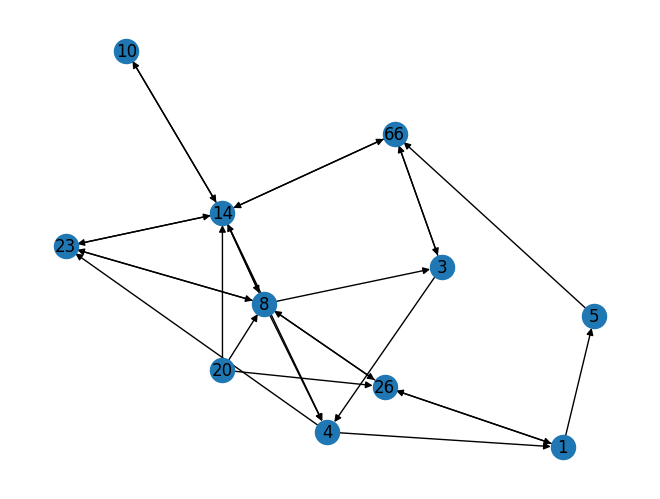

In [1894]:
# Liverpool 80-90 mins
print("The details of 80-90 mins are:")
details(generate_graph(124-2,137-2,2,5))

The details of Extra time are:
Player:  10 | Closeness Centrality:  0.7777777777777778 | Degree:  8
Player:  23 | Closeness Centrality:  0.6363636363636364 | Degree:  7
Player:  66 | Closeness Centrality:  0.6363636363636364 | Degree:  5
Player:  14 | Closeness Centrality:  0.5384615384615384 | Degree:  3
Player:  26 | Closeness Centrality:  0.5 | Degree:  4
Player:  3 | Closeness Centrality:  0.4117647058823529 | Degree:  3
Player:  1 | Closeness Centrality:  0.0 | Degree:  1
Player:  5 | Closeness Centrality:  0.0 | Degree:  1

Player:  10 | Degree Centrality:  8
Player:  23 | Degree Centrality:  7
Player:  66 | Degree Centrality:  5
Player:  26 | Degree Centrality:  4
Player:  3 | Degree Centrality:  3
Player:  14 | Degree Centrality:  3
Player:  1 | Degree Centrality:  1
Player:  5 | Degree Centrality:  1

Player:  23 | Page Rank Centrality:  0.2748772445636324 | Degree:  7
Player:  10 | Page Rank Centrality:  0.22714543861834025 | Degree:  8
Player:  14 | Page Rank Centrality:  0.

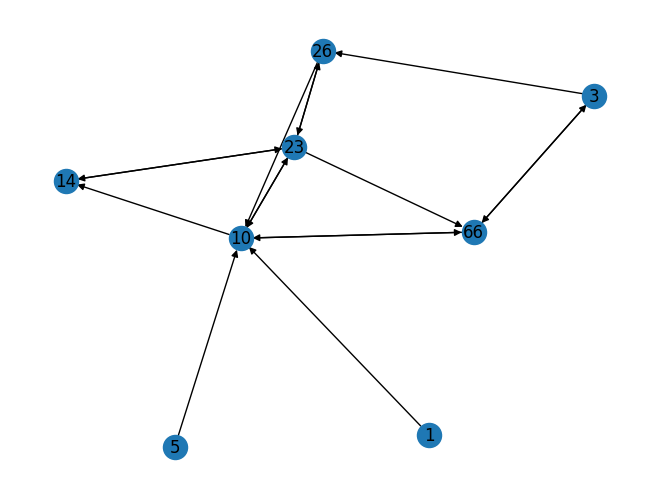

In [1895]:
# Liverpool Extra time
print("The details of Extra time are:")
details(generate_graph(139-2,153-2,2,5))

# Liverpool Interception Analysis

In [1896]:
dfs = pd.read_excel('Interceptions.xlsx', sheet_name='Match1')

Liverpool players Fabianski  Cresswell  Dawson  Zouma  Johnson  Lanzini   \
0            Allison          0          0       0      0        0        0   
1           Van Dijk          0          0       0      0        1        0   
2          Robertson          0          0       0      1        0        0   
3   Alexander Arnold          0          0       0      0        0        0   
4             Konate          0          0       0      0        1        0   
5            Fabinho          0          0       0      0        0        0   
6          Henderson          0          0       0      0        0        0   
7              Keita          0          0       0      0        0        0   
8               Mane          0          0       0      0        0        0   
9              Salah          1          1       1      0        1        0   
10              Diaz          0          0       0      0        0        0   

   Soucek  Vlasic  Fornals Antonio  Bowen   
0        0       0       0        0      0  
1        0       0       0        0      0  
2        0       0       0        1      0  
3        0       0       0        0      0  
4        1       0       0        0      0  
5        0       0       0        0      0  
6        0       0       0        0      0  
7        0       0       0        0      0  
8        0       0       0        0      0  
9        0       0       0        0      0  
10       0       0       0        0      0

Player:  Salah | Degree Centrality:  4
Player:  Johnson  | Degree Centrality:  3
Player:  Robertson | Degree Centrality:  2
Player:  Konate | Degree Centrality:  2
Player:  Fabianski  | Degree Centrality:  1
Player:  Cresswell  | Degree Centrality:  1
Player:  Dawson  | Degree Centrality:  1
Player:  Zouma  | Degree Centrality:  1
Player:  Soucek  | Degree Centrality:  1
Player:  Antonio  | Degree Centrality:  1
Player:  Van Dijk | Degree Centrality:  1

Player:  Salah | Closeness Centrality:  0.2 | Degree:  4
Player:  Robertson | Closeness Centrality:  0.1 | Degree:  2
Player:  Konate | Closeness Centrality:  0.1 | Degree:  2
Player:  Van Dijk | Closeness Centrality:  0.05 | Degree:  1
Player:  Fabianski  | Closeness Centrality:  0.0 | Degree:  1
Player:  Cresswell  | Closeness Centrality:  0.0 | Degree:  1
Player:  Dawson  | Closeness Centrality:  0.0 | Degree:  1
Player:  Zouma  | Closeness Centrality:  0.0 | Degree:  1
Player:  Johnson  | Closeness Centrality:  0.0 | Degree:  3
Pla

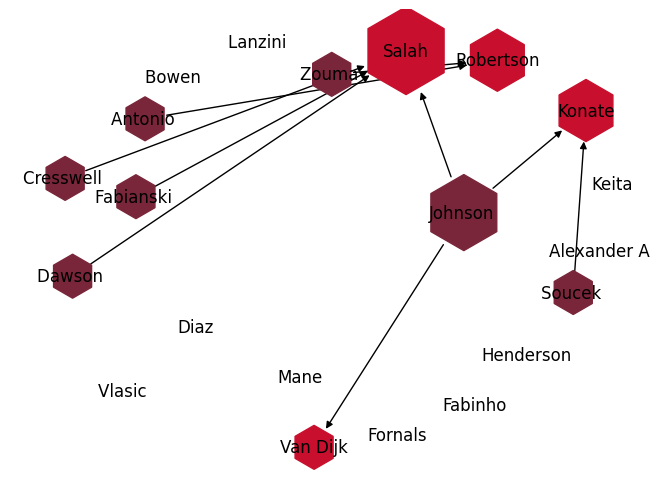

In [1897]:
# Westham Interceptions on Liverpool 0-10 mins
Interceptions(0, 11, 0, 12, '#7A263A','#C8102E','Liverpool players') 

Liverpool players Fabianski  Cresswell  Dawson  Zouma  Johnson  Lanzini   \
13           Allison          0          0       0      0        0        0   
14          Van Dijk          0          0       0      0        0        0   
15         Robertson          0          0       0      0        0        0   
16  Alexander Arnold          0          0       0      2        0        0   
17            Konate          0          0       0      0        0        0   
18           Fabinho          0          0       0      0        0        1   
19         Henderson          0          0       0      0        0        0   
20             Keita          0          0       0      0        0        0   
21              Mane          0          0       0      0        0        0   
22             Salah          0          0       1      1        0        1   
23              Diaz          0          1       1      0        0        0   

   Soucek  Vlasic  Fornals Antonio  Bowen   
13       0       0       0        0      0  
14       0       0       0        0      0  
15       0       0       0        0      0  
16       0       0       0        0      0  
17       2       0       0        0      0  
18       0       0       0        0      1  
19       0       0       1        0      0  
20       1       0       0        0      0  
21       1       0       0        0      0  
22       1       0       1        0      0  
23       1       0       0        0      0

Player:  Soucek  | Degree Centrality:  5
Player:  Salah | Degree Centrality:  5
Player:  Diaz | Degree Centrality:  3
Player:  Dawson  | Degree Centrality:  2
Player:  Zouma  | Degree Centrality:  2
Player:  Lanzini  | Degree Centrality:  2
Player:  Fornals | Degree Centrality:  2
Player:  Fabinho | Degree Centrality:  2
Player:  Cresswell  | Degree Centrality:  1
Player:  Bowen  | Degree Centrality:  1
Player:  Alexander Arnold | Degree Centrality:  1

Player:  Salah | Closeness Centrality:  0.25 | Degree:  5
Player:  Diaz | Closeness Centrality:  0.15 | Degree:  3
Player:  Fabinho | Closeness Centrality:  0.1 | Degree:  2
Player:  Alexander Arnold | Closeness Centrality:  0.05 | Degree:  1
Player:  Konate | Closeness Centrality:  0.05 | Degree:  1
Player:  Henderson | Closeness Centrality:  0.05 | Degree:  1
Player:  Keita | Closeness Centrality:  0.05 | Degree:  1
Player:  Mane | Closeness Centrality:  0.05 | Degree:  1
Player:  Fabianski  | Closeness Centrality:  0.0 | Degree:  0
P

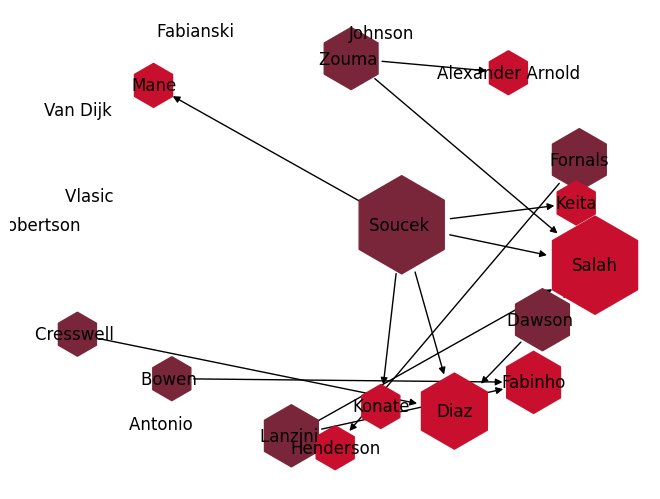

In [1898]:
# Westham Interceptions on Liverpool 10-20 mins
Interceptions(13, 24, 0, 12, '#7A263A','#C8102E','Liverpool players') 

Liverpool players Fabianski  Cresswell  Dawson  Zouma  Johnson  Lanzini   \
26           Allison          0          0       0      0        0        0   
27          Van Dijk          0          0       0      0        0        0   
28         Robertson          1          0       0      0        0        1   
29  Alexander Arnold          0          0       0      0        0        1   
30            Konate          0          0       0      0        0        0   
31           Fabinho          0          0       0      0        0        0   
32         Henderson          0          0       0      0        0        0   
33             Keita          0          1       0      0        0        0   
34              Mane          0          0       1      1        0        1   
35             Salah          0          0       0      0        0        1   
36              Diaz          0          0       0      0        0        0   

   Soucek  Vlasic  Fornals Antonio  Bowen   
26       0       0       0        0      0  
27       0       0       0        0      0  
28       0       0       0        0      0  
29       0       0       0        0      0  
30       0       0       0        0      0  
31       0       0       0        0      0  
32       0       0       0        0      0  
33       0       0       0        0      0  
34       0       1       0        0      0  
35       0       0       0        0      1  
36       1       0       0        0      0

Player:  Lanzini  | Degree Centrality:  4
Player:  Mane | Degree Centrality:  4
Player:  Robertson | Degree Centrality:  2
Player:  Salah | Degree Centrality:  2
Player:  Fabianski  | Degree Centrality:  1
Player:  Cresswell  | Degree Centrality:  1
Player:  Dawson  | Degree Centrality:  1
Player:  Zouma  | Degree Centrality:  1
Player:  Soucek  | Degree Centrality:  1
Player:  Vlasic  | Degree Centrality:  1
Player:  Bowen  | Degree Centrality:  1

Player:  Mane | Closeness Centrality:  0.2 | Degree:  4
Player:  Robertson | Closeness Centrality:  0.1 | Degree:  2
Player:  Salah | Closeness Centrality:  0.1 | Degree:  2
Player:  Alexander Arnold | Closeness Centrality:  0.05 | Degree:  1
Player:  Keita | Closeness Centrality:  0.05 | Degree:  1
Player:  Diaz | Closeness Centrality:  0.05 | Degree:  1
Player:  Fabianski  | Closeness Centrality:  0.0 | Degree:  1
Player:  Cresswell  | Closeness Centrality:  0.0 | Degree:  1
Player:  Dawson  | Closeness Centrality:  0.0 | Degree:  1
Playe

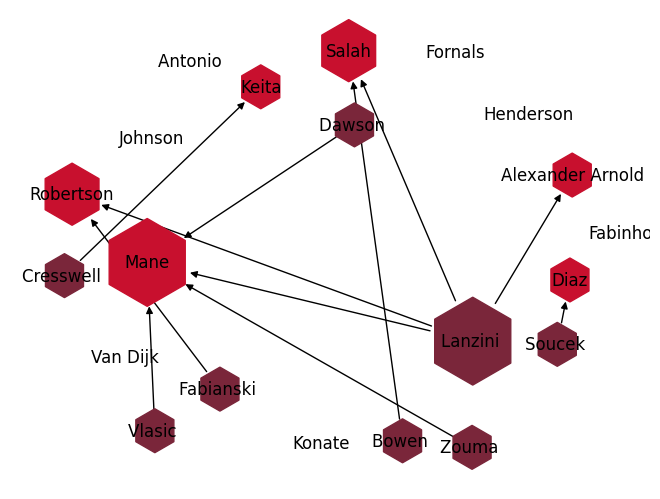

In [1899]:
# Westham Interceptions on Liverpool 20-30 mins
Interceptions(26, 37, 0, 12, '#7A263A','#C8102E','Liverpool players') 

Liverpool players Fabianski  Cresswell  Dawson  Zouma  Johnson  Lanzini   \
39           Allison          0          0       0      0        0        0   
40          Van Dijk          0          0       0      0        0        0   
41         Robertson          0          0       1      0        0        0   
42  Alexander Arnold          0          0       1      1        0        0   
43            Konate          0          0       0      0        0        0   
44           Fabinho          0          0       0      0        0        0   
45         Henderson          0          0       0      0        0        0   
46             Keita          0          0       0      0        0        0   
47              Mane          0          0       0      0        1        0   
48             Salah          0          0       0      0        1        0   
49              Diaz          0          0       1      0        0        0   

   Soucek  Vlasic  Fornals Antonio  Bowen   
39       0       0       0        0      0  
40       0       0       0        0      0  
41       0       0       0        0      0  
42       0       0       0        0      0  
43       0       0       0        0      0  
44       0       0       0        0      0  
45       0       0       0        0      0  
46       0       0       0        0      0  
47       0       0       0        0      0  
48       2       0       0        0      0  
49       1       0       0        0      0

Player:  Dawson  | Degree Centrality:  3
Player:  Johnson  | Degree Centrality:  2
Player:  Soucek  | Degree Centrality:  2
Player:  Alexander Arnold | Degree Centrality:  2
Player:  Salah | Degree Centrality:  2
Player:  Diaz | Degree Centrality:  2
Player:  Zouma  | Degree Centrality:  1
Player:  Robertson | Degree Centrality:  1
Player:  Mane | Degree Centrality:  1
Player:  Fabianski  | Degree Centrality:  0
Player:  Cresswell  | Degree Centrality:  0

Player:  Alexander Arnold | Closeness Centrality:  0.1 | Degree:  2
Player:  Salah | Closeness Centrality:  0.1 | Degree:  2
Player:  Diaz | Closeness Centrality:  0.1 | Degree:  2
Player:  Robertson | Closeness Centrality:  0.05 | Degree:  1
Player:  Mane | Closeness Centrality:  0.05 | Degree:  1
Player:  Fabianski  | Closeness Centrality:  0.0 | Degree:  0
Player:  Cresswell  | Closeness Centrality:  0.0 | Degree:  0
Player:  Dawson  | Closeness Centrality:  0.0 | Degree:  3
Player:  Zouma  | Closeness Centrality:  0.0 | Degree:  

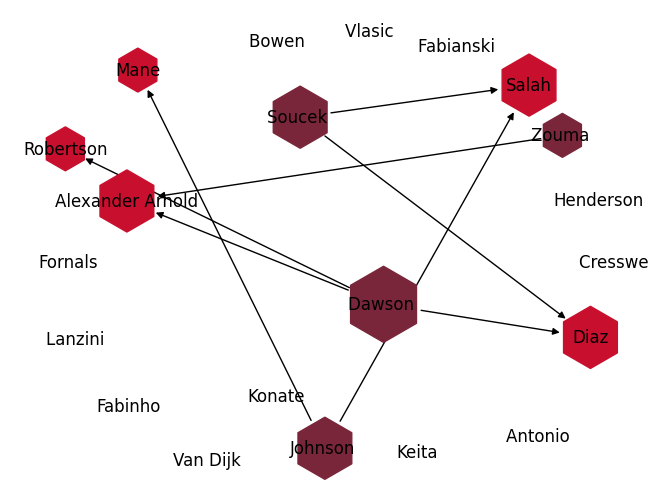

In [1900]:
# Westham Interceptions on Liverpool 30-40 mins
Interceptions(39, 50, 0, 12, '#7A263A','#C8102E','Liverpool players') 

Liverpool players Fabianski  Cresswell  Dawson  Zouma  Johnson  Lanzini   \
52           Allison          0          0       0      0        0        0   
53          Van Dijk          0          0       0      0        0        0   
54         Robertson          0          0       0      0        0        0   
55  Alexander Arnold          0          0       0      0        0        0   
56            Konate          0          0       0      0        0        0   
57           Fabinho          0          0       0      0        0        0   
58         Henderson          0          0       0      1        0        0   
59             Keita          0          0       0      1        0        0   
60              Mane          0          0       0      0        0        0   
61             Salah          0          0       0      0        0        1   
62              Diaz          0          0       0      0        0        0   

   Soucek  Vlasic  Fornals Antonio  Bowen   
52       0       0       0        0      0  
53       0       0       0        0      0  
54       0       0       0        0      0  
55       0       0       0        0      0  
56       0       0       0        0      0  
57       0       0       0        0      0  
58       0       0       0        0      0  
59       0       0       0        0      0  
60       1       0       0        0      0  
61       0       0       0        0      0  
62       0       0       0        0      0

Player:  Zouma  | Degree Centrality:  2
Player:  Lanzini  | Degree Centrality:  1
Player:  Soucek  | Degree Centrality:  1
Player:  Henderson | Degree Centrality:  1
Player:  Keita | Degree Centrality:  1
Player:  Mane | Degree Centrality:  1
Player:  Salah | Degree Centrality:  1
Player:  Fabianski  | Degree Centrality:  0
Player:  Cresswell  | Degree Centrality:  0
Player:  Dawson  | Degree Centrality:  0
Player:  Johnson  | Degree Centrality:  0

Player:  Henderson | Closeness Centrality:  0.05 | Degree:  1
Player:  Keita | Closeness Centrality:  0.05 | Degree:  1
Player:  Mane | Closeness Centrality:  0.05 | Degree:  1
Player:  Salah | Closeness Centrality:  0.05 | Degree:  1
Player:  Fabianski  | Closeness Centrality:  0.0 | Degree:  0
Player:  Cresswell  | Closeness Centrality:  0.0 | Degree:  0
Player:  Dawson  | Closeness Centrality:  0.0 | Degree:  0
Player:  Zouma  | Closeness Centrality:  0.0 | Degree:  2
Player:  Johnson  | Closeness Centrality:  0.0 | Degree:  0
Player:  L

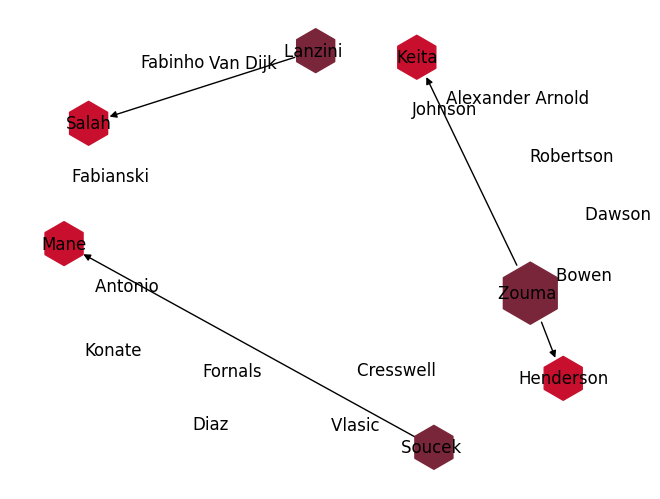

In [1901]:
# Westham Interceptions on Liverpool 40-50 mins
Interceptions(52, 63, 0, 12, '#7A263A','#C8102E','Liverpool players') 

In [1902]:
# Westham Interceptions on Liverpool 50-60 mins
Interceptions(65, 76, 0, 12, '#7A263A','#C8102E','Liverpool players') 

Liverpool players Fabianski  Cresswell  Dawson  Zouma  Johnson  Lanzini   \
65           Allison          0          0       0      0        0        0   
66          Van Dijk          0          0       0      0        0        0   
67         Robertson          0          0       0      0        0        0   
68  Alexander Arnold          0          1       0      0        1        0   
69            Konate          0          0       0      0        0        0   
70           Fabinho          0          0       0      0        0        0   
71         Henderson          0          1       0      0        1        0   
72             Keita          0          0       0      0        0        0   
73              Mane          0          0       0      0        0        1   
74             Salah          0          0       0      0        0        0   
75              Diaz          0          0       0      0        0        0   

   Soucek  Vlasic  Fornals Antonio  Bowen   
65       0       0       0        0      0  
66       0       0       0        0      0  
67       0       0       0        0      0  
68       0       0       0        0      0  
69       0       0       0        0      0  
70       0       0       0        0      0  
71       0       0       0        0      0  
72       0       0       0        0      0  
73       0       0       1        0      0  
74       0       0       0        0      0  
75       0       0       0        0      0

Player:  Cresswell  | Degree Centrality:  2
Player:  Johnson  | Degree Centrality:  2
Player:  Alexander Arnold | Degree Centrality:  2
Player:  Henderson | Degree Centrality:  2
Player:  Mane | Degree Centrality:  2
Player:  Lanzini  | Degree Centrality:  1
Player:  Fornals | Degree Centrality:  1
Player:  Fabianski  | Degree Centrality:  0
Player:  Dawson  | Degree Centrality:  0
Player:  Zouma  | Degree Centrality:  0
Player:  Soucek  | Degree Centrality:  0

Player:  Alexander Arnold | Closeness Centrality:  0.1 | Degree:  2
Player:  Henderson | Closeness Centrality:  0.1 | Degree:  2
Player:  Mane | Closeness Centrality:  0.1 | Degree:  2
Player:  Fabianski  | Closeness Centrality:  0.0 | Degree:  0
Player:  Cresswell  | Closeness Centrality:  0.0 | Degree:  2
Player:  Dawson  | Closeness Centrality:  0.0 | Degree:  0
Player:  Zouma  | Closeness Centrality:  0.0 | Degree:  0
Player:  Johnson  | Closeness Centrality:  0.0 | Degree:  2
Player:  Lanzini  | Closeness Centrality:  0.0 

Liverpool players Fabianski  Cresswell  Dawson  Zouma  Johnson  Lanzini   \
78           Allison          0          0       0      0        0        0   
79          Van Dijk          0          0       0      0        0        0   
80         Robertson          0          0       0      0        0        0   
81  Alexander Arnold          0          1       0      0        0        0   
82            Konate          0          0       0      0        0        0   
83           Fabinho          0          0       0      0        0        0   
84         Henderson          0          0       0      0        0        0   
85             Keita          0          0       0      0        0        0   
86              Mane          0          0       1      0        0        0   
87             Salah          0          0       0      0        0        0   
88              Diaz          0          0       0      0        1        0   

   Soucek  Vlasic  Fornals Antonio  Bowen   
78       0       0       0        0      0  
79       0       0       0        0      0  
80       0       0       0        0      0  
81       0       0       0        0      0  
82       0       0       0        0      0  
83       0       0       0        0      0  
84       0       0       0        0      0  
85       0       0       0        0      0  
86       0       0       0        0      0  
87       0       0       0        0      0  
88       0       0       0        0      0

Player:  Cresswell  | Degree Centrality:  1
Player:  Dawson  | Degree Centrality:  1
Player:  Johnson  | Degree Centrality:  1
Player:  Alexander Arnold | Degree Centrality:  1
Player:  Mane | Degree Centrality:  1
Player:  Diaz | Degree Centrality:  1
Player:  Fabianski  | Degree Centrality:  0
Player:  Zouma  | Degree Centrality:  0
Player:  Lanzini  | Degree Centrality:  0
Player:  Soucek  | Degree Centrality:  0
Player:  Vlasic  | Degree Centrality:  0

Player:  Alexander Arnold | Closeness Centrality:  0.05 | Degree:  1
Player:  Mane | Closeness Centrality:  0.05 | Degree:  1
Player:  Diaz | Closeness Centrality:  0.05 | Degree:  1
Player:  Fabianski  | Closeness Centrality:  0.0 | Degree:  0
Player:  Cresswell  | Closeness Centrality:  0.0 | Degree:  1
Player:  Dawson  | Closeness Centrality:  0.0 | Degree:  1
Player:  Zouma  | Closeness Centrality:  0.0 | Degree:  0
Player:  Johnson  | Closeness Centrality:  0.0 | Degree:  1
Player:  Lanzini  | Closeness Centrality:  0.0 | Degre

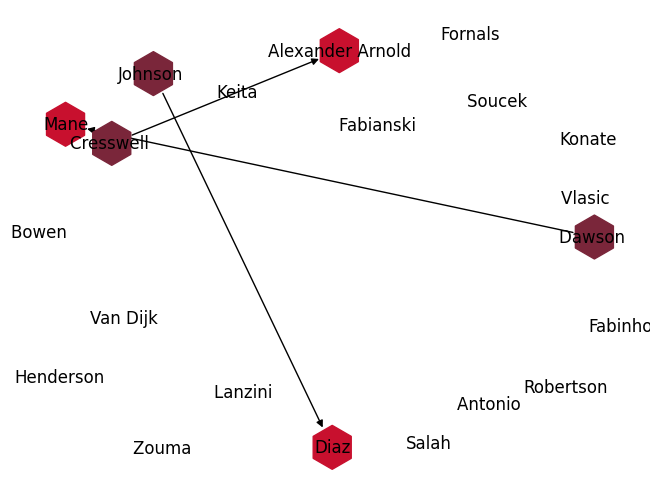

In [1903]:
# Westham Interceptions on Liverpool 60-70 mins
Interceptions(78, 89, 0, 12, '#7A263A','#C8102E','Liverpool players') 

Liverpool players Fabianski  Cresswell  Dawson  Zouma  Johnson  Lanzini   \
91            Allison          0          0       0      0        0        0   
92           Van Dijk          0          0       0      0        0        0   
93          Robertson          0          0       0      0        0        0   
94   Alexander Arnold          0          0       0      1        0        0   
95             Konate          0          0       0      0        0        0   
96            Fabinho          0          0       0      0        0        0   
97          Henderson          0          0       0      0        0        0   
98              Keita          0          0       0      0        0        0   
99               Mane          0          0       0      0        1        0   
100             Salah          0          0       0      0        0        0   
101              Diaz          0          1       1      0        0        0   

    Soucek  Vlasic  Fornals Antonio  Bowen   
91        0       0       0        0      0  
92        0       0       0        0      0  
93        0       0       0        0      0  
94        0       0       0        0      0  
95        0       0       0        0      0  
96        0       0       0        0      0  
97        0       0       0        0      0  
98        0       0       0        0      0  
99        0       0       0        0      0  
100       0       0       0        0      0  
101       0       0       0        0      0

Player:  Diaz | Degree Centrality:  2
Player:  Cresswell  | Degree Centrality:  1
Player:  Dawson  | Degree Centrality:  1
Player:  Zouma  | Degree Centrality:  1
Player:  Johnson  | Degree Centrality:  1
Player:  Alexander Arnold | Degree Centrality:  1
Player:  Mane | Degree Centrality:  1
Player:  Fabianski  | Degree Centrality:  0
Player:  Lanzini  | Degree Centrality:  0
Player:  Soucek  | Degree Centrality:  0
Player:  Vlasic  | Degree Centrality:  0

Player:  Diaz | Closeness Centrality:  0.1 | Degree:  2
Player:  Alexander Arnold | Closeness Centrality:  0.05 | Degree:  1
Player:  Mane | Closeness Centrality:  0.05 | Degree:  1
Player:  Fabianski  | Closeness Centrality:  0.0 | Degree:  0
Player:  Cresswell  | Closeness Centrality:  0.0 | Degree:  1
Player:  Dawson  | Closeness Centrality:  0.0 | Degree:  1
Player:  Zouma  | Closeness Centrality:  0.0 | Degree:  1
Player:  Johnson  | Closeness Centrality:  0.0 | Degree:  1
Player:  Lanzini  | Closeness Centrality:  0.0 | Degree

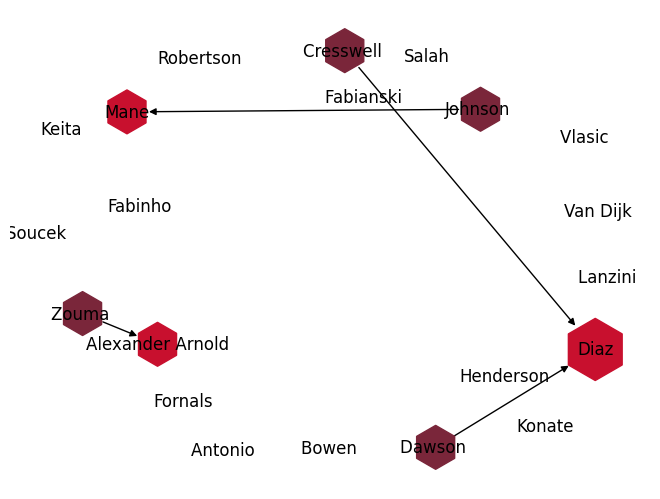

In [1904]:
# Westham Interceptions on Liverpool 70-80 mins
Interceptions(91, 102, 0, 12, '#7A263A','#C8102E','Liverpool players') 

Liverpool players Fabianski   Cresswell   Dawson  Zouma   Johnson   \
103  Liverpool players      Diop   Cresswell   Dawson   Zouma  Johnson    
104            Allison          0           0        0      0         0   
105           Van Dijk          0           0        0      0         0   
106          Robertson          0           0        0      0         0   
107   Alexander Arnold          0           0        0      0         0   
108             Konate          0           0        0      0         1   
109            Fabinho          0           0        0      0         0   
110          Henderson          0           0        0      0         0   
111              Keita          0           0        0      0         0   
112               Mane          0           0        0      0         0   
113              Salah          0           0        0      0         0   
114               Diaz          1           0        0      0         0   
115         Diogo Jota          0           0        0      0         0   

     Lanzini   Soucek   Vlasic    Fornals  Antonio   Bowen   
103  Lanzini   Soucek   Vlasic   Fornals   Antonio   Bowen   
104         0        0        0         0         0       0  
105         0        0        0         0         0       0  
106         0        0        0         0         0       0  
107         0        0        0         0         0       0  
108         0        0        0         0         0       0  
109         0        0        0         0         0       0  
110         0        0        0         0         0       0  
111         0        0        0         0         0       0  
112         0        0        0         0         0       0  
113         0        0        0         0         0       0  
114         0        0        0         0         0       0  
115         1        0        0         0         0       0

Player:  Fabianski  | Degree Centrality:  1
Player:  Johnson  | Degree Centrality:  1
Player:  Lanzini  | Degree Centrality:  1
Player:  Konate | Degree Centrality:  1
Player:  Diaz | Degree Centrality:  1
Player:  Diogo Jota | Degree Centrality:  1
Player:  Cresswell  | Degree Centrality:  0
Player:  Dawson  | Degree Centrality:  0
Player:  Zouma  | Degree Centrality:  0
Player:  Soucek  | Degree Centrality:  0
Player:  Vlasic  | Degree Centrality:  0

Player:  Konate | Closeness Centrality:  0.045454545454545456 | Degree:  1
Player:  Diaz | Closeness Centrality:  0.045454545454545456 | Degree:  1
Player:  Diogo Jota | Closeness Centrality:  0.045454545454545456 | Degree:  1
Player:  Fabianski  | Closeness Centrality:  0.0 | Degree:  1
Player:  Cresswell  | Closeness Centrality:  0.0 | Degree:  0
Player:  Dawson  | Closeness Centrality:  0.0 | Degree:  0
Player:  Zouma  | Closeness Centrality:  0.0 | Degree:  0
Player:  Johnson  | Closeness Centrality:  0.0 | Degree:  1
Player:  Lanzi

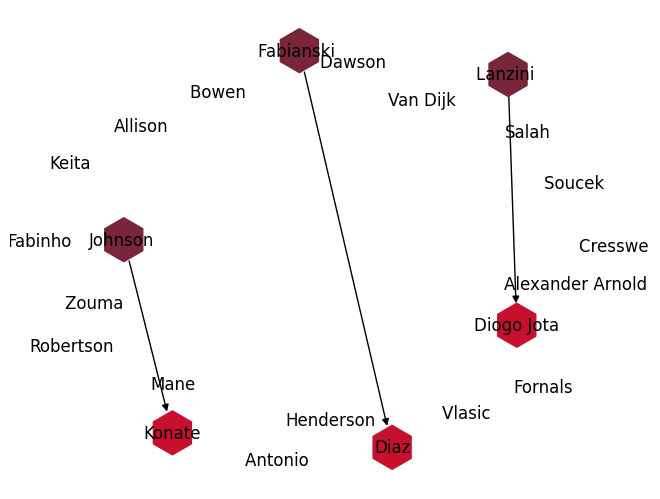

In [1905]:
# Westham Interceptions on Liverpool 80-90 mins
Interceptions(103, 116, 0, 12, '#7A263A','#C8102E','Liverpool players') 

# West Ham Passing Analysis

The details of 0-10 mins are:
Player:  3 | Closeness Centrality:  0.494949494949495 | Degree:  7
Player:  10 | Closeness Centrality:  0.4537037037037037 | Degree:  6
Player:  9 | Closeness Centrality:  0.4188034188034188 | Degree:  5
Player:  11 | Closeness Centrality:  0.3742690058479532 | Degree:  1
Player:  1 | Closeness Centrality:  0.35555555555555557 | Degree:  1
Player:  8 | Closeness Centrality:  0.3202614379084967 | Degree:  3
Player:  4 | Closeness Centrality:  0.30246913580246915 | Degree:  2
Player:  20 | Closeness Centrality:  0.1111111111111111 | Degree:  2
Player:  31 | Closeness Centrality:  0.0 | Degree:  1
Player:  28 | Closeness Centrality:  0.0 | Degree:  2

Player:  3 | Degree Centrality:  7
Player:  10 | Degree Centrality:  6
Player:  9 | Degree Centrality:  5
Player:  8 | Degree Centrality:  3
Player:  4 | Degree Centrality:  2
Player:  20 | Degree Centrality:  2
Player:  28 | Degree Centrality:  2
Player:  11 | Degree Centrality:  1
Player:  31 | Degree Centrali

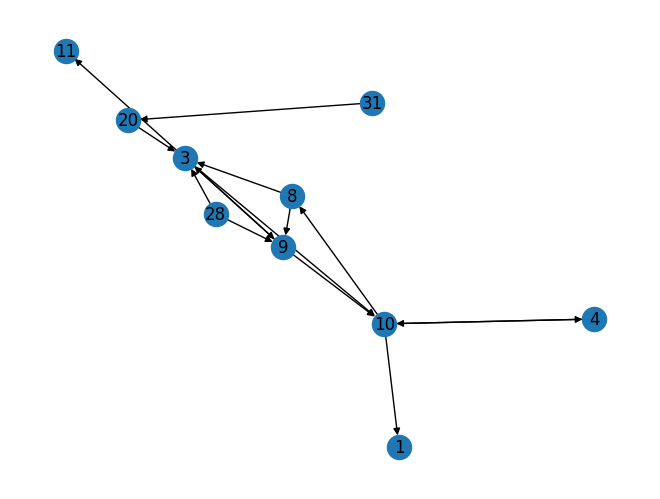

In [1906]:
# West Ham 0-10 mins
print("The details of 0-10 mins are:")
details(generate_graph(6,17,21,24))
make_table(generate_graph(6,17,21,24))

The details of 10-20 mins are:
Player:  3 | Closeness Centrality:  0.5568181818181818 | Degree:  7
Player:  11 | Closeness Centrality:  0.47115384615384615 | Degree:  4
Player:  8 | Closeness Centrality:  0.47115384615384615 | Degree:  6
Player:  9 | Closeness Centrality:  0.4375 | Degree:  3
Player:  31 | Closeness Centrality:  0.4083333333333333 | Degree:  2
Player:  10 | Closeness Centrality:  0.3828125 | Degree:  2
Player:  20 | Closeness Centrality:  0.38095238095238093 | Degree:  1
Player:  4 | Closeness Centrality:  0.0 | Degree:  1
Player:  28 | Closeness Centrality:  0.0 | Degree:  2

Player:  3 | Degree Centrality:  7
Player:  8 | Degree Centrality:  6
Player:  11 | Degree Centrality:  4
Player:  9 | Degree Centrality:  3
Player:  31 | Degree Centrality:  2
Player:  10 | Degree Centrality:  2
Player:  28 | Degree Centrality:  2
Player:  4 | Degree Centrality:  1
Player:  20 | Degree Centrality:  1

Player:  8 | Page Rank Centrality:  0.22896585499226527 | Degree:  6
Player:  

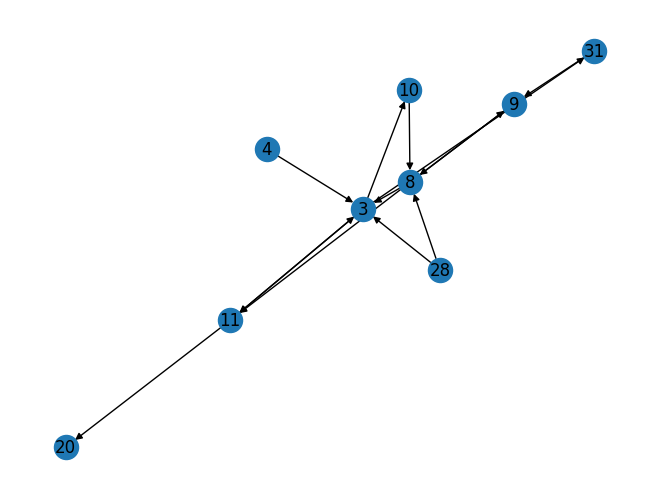

In [1907]:
# West Ham 10-20 mins
print("The details of 10-20 mins are:")
details(generate_graph(22-2,33-2,21,24))

The details of 20-30 mins are:
Player:  20 | Closeness Centrality:  0.43478260869565216 | Degree:  3
Player:  10 | Closeness Centrality:  0.4083333333333333 | Degree:  7
Player:  9 | Closeness Centrality:  0.37692307692307686 | Degree:  4
Player:  28 | Closeness Centrality:  0.37692307692307686 | Degree:  5
Player:  4 | Closeness Centrality:  0.35 | Degree:  5
Player:  1 | Closeness Centrality:  0.32666666666666666 | Degree:  3
Player:  11 | Closeness Centrality:  0.30624999999999997 | Degree:  5
Player:  3 | Closeness Centrality:  0.28823529411764703 | Degree:  2
Player:  15 | Closeness Centrality:  0.28823529411764703 | Degree:  3
Player:  31 | Closeness Centrality:  0.256 | Degree:  3
Player:  8 | Closeness Centrality:  0.23823529411764707 | Degree:  2

Player:  10 | Degree Centrality:  7
Player:  4 | Degree Centrality:  5
Player:  28 | Degree Centrality:  5
Player:  11 | Degree Centrality:  5
Player:  9 | Degree Centrality:  4
Player:  1 | Degree Centrality:  3
Player:  15 | Degree

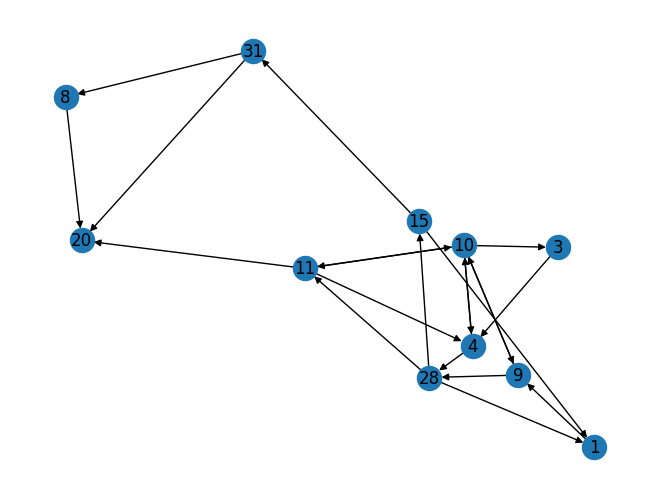

In [1908]:
# West Ham 20-30 mins
print("The details of 20-30 mins are:")
details(generate_graph(36-2,47-2,21,24))

In [1909]:
# West Ham 30-40 mins
print("The details of 30-40 mins are:")
details(generate_graph(51-2,62-2,21,24))

The details of 30-40 mins are:
Player:  8 | Closeness Centrality:  0.5 | Degree:  4
Player:  3 | Closeness Centrality:  0.4375 | Degree:  3
Player:  28 | Closeness Centrality:  0.40909090909090906 | Degree:  4
Player:  31 | Closeness Centrality:  0.375 | Degree:  5
Player:  1 | Closeness Centrality:  0.36363636363636365 | Degree:  1
Player:  20 | Closeness Centrality:  0.34615384615384615 | Degree:  5
Player:  11 | Closeness Centrality:  0.34615384615384615 | Degree:  3
Player:  10 | Closeness Centrality:  0.30000000000000004 | Degree:  4
Player:  15 | Closeness Centrality:  0.0 | Degree:  1

Player:  31 | Degree Centrality:  5
Player:  20 | Degree Centrality:  5
Player:  8 | Degree Centrality:  4
Player:  10 | Degree Centrality:  4
Player:  28 | Degree Centrality:  4
Player:  3 | Degree Centrality:  3
Player:  11 | Degree Centrality:  3
Player:  1 | Degree Centrality:  1
Player:  15 | Degree Centrality:  1

Player:  11 | Page Rank Centrality:  0.15643998190669123 | Degree:  3
Player: 

The details of 40-50 mins are:
Player:  3 | Closeness Centrality:  0.35555555555555557 | Degree:  6
Player:  9 | Closeness Centrality:  0.3202614379084967 | Degree:  2
Player:  4 | Closeness Centrality:  0.2962962962962963 | Degree:  5
Player:  28 | Closeness Centrality:  0.2962962962962963 | Degree:  4
Player:  10 | Closeness Centrality:  0.2777777777777778 | Degree:  2
Player:  15 | Closeness Centrality:  0.25252525252525254 | Degree:  2
Player:  11 | Closeness Centrality:  0.25 | Degree:  2
Player:  31 | Closeness Centrality:  0.23529411764705882 | Degree:  1
Player:  8 | Closeness Centrality:  0.2222222222222222 | Degree:  3
Player:  20 | Closeness Centrality:  0.19753086419753085 | Degree:  3

Player:  3 | Degree Centrality:  6
Player:  4 | Degree Centrality:  5
Player:  28 | Degree Centrality:  4
Player:  8 | Degree Centrality:  3
Player:  20 | Degree Centrality:  3
Player:  10 | Degree Centrality:  2
Player:  15 | Degree Centrality:  2
Player:  11 | Degree Centrality:  2
Player:

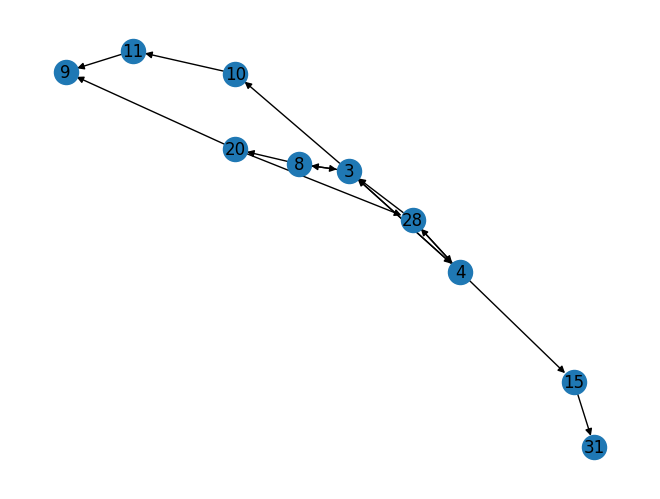

In [1910]:
# West Ham 40-50 mins
print("The details of 40-50 mins are:")
details(generate_graph(66-2,77-2,21,24))

In [1911]:
# West Ham 50-60 mins
print("The details of 50-60 mins are:")
details(generate_graph(81-2,93-2,21,24))

The details of 50-60 mins are:
Player:  31 | Closeness Centrality:  0.44999999999999996 | Degree:  4
Player:  10 | Closeness Centrality:  0.44999999999999996 | Degree:  4
Player:  8 | Closeness Centrality:  0.375 | Degree:  5
Player:  28 | Closeness Centrality:  0.3214285714285714 | Degree:  2
Player:  4 | Closeness Centrality:  0.25 | Degree:  3
Player:  15 | Closeness Centrality:  0.25 | Degree:  2
Player:  1 | Closeness Centrality:  0.16666666666666666 | Degree:  2
Player:  3 | Closeness Centrality:  0.0 | Degree:  2
Player:  22 | Closeness Centrality:  0.0 | Degree:  2

Player:  8 | Degree Centrality:  5
Player:  31 | Degree Centrality:  4
Player:  10 | Degree Centrality:  4
Player:  4 | Degree Centrality:  3
Player:  1 | Degree Centrality:  2
Player:  3 | Degree Centrality:  2
Player:  15 | Degree Centrality:  2
Player:  28 | Degree Centrality:  2
Player:  22 | Degree Centrality:  2

Player:  8 | Page Rank Centrality:  0.18068722747340013 | Degree:  5
Player:  10 | Page Rank Centr

In [1912]:
# Man city 60-70 mins
print("The details of 60-70 mins are:")
details(generate_graph(96-2,109-2,21,24))

The details of 60-70 mins are:
Player:  28 | Closeness Centrality:  0.5444444444444444 | Degree:  9
Player:  10 | Closeness Centrality:  0.45714285714285713 | Degree:  3
Player:  31 | Closeness Centrality:  0.4083333333333333 | Degree:  7
Player:  4 | Closeness Centrality:  0.4083333333333333 | Degree:  5
Player:  9 | Closeness Centrality:  0.35555555555555557 | Degree:  2
Player:  1 | Closeness Centrality:  0.35 | Degree:  2
Player:  15 | Closeness Centrality:  0.35 | Degree:  4
Player:  8 | Closeness Centrality:  0.32000000000000006 | Degree:  1
Player:  3 | Closeness Centrality:  0.30624999999999997 | Degree:  4
Player:  22 | Closeness Centrality:  0.0 | Degree:  2
Player:  16 | Closeness Centrality:  0.0 | Degree:  5

Player:  28 | Degree Centrality:  9
Player:  31 | Degree Centrality:  7
Player:  4 | Degree Centrality:  5
Player:  16 | Degree Centrality:  5
Player:  3 | Degree Centrality:  4
Player:  15 | Degree Centrality:  4
Player:  10 | Degree Centrality:  3
Player:  1 | Degre

The details of 70-80 mins are:
Player:  9 | Closeness Centrality:  0.3 | Degree:  3
Player:  8 | Closeness Centrality:  0.2777777777777778 | Degree:  4
Player:  3 | Closeness Centrality:  0.25789473684210523 | Degree:  1
Player:  10 | Closeness Centrality:  0.24 | Degree:  1
Player:  15 | Closeness Centrality:  0.13333333333333333 | Degree:  2
Player:  1 | Closeness Centrality:  0.1 | Degree:  3
Player:  4 | Closeness Centrality:  0.1 | Degree:  2
Player:  31 | Closeness Centrality:  0.1 | Degree:  2
Player:  28 | Closeness Centrality:  0.1 | Degree:  1
Player:  22 | Closeness Centrality:  0.0 | Degree:  1
Player:  16 | Closeness Centrality:  0.0 | Degree:  2

Player:  8 | Degree Centrality:  4
Player:  1 | Degree Centrality:  3
Player:  9 | Degree Centrality:  3
Player:  4 | Degree Centrality:  2
Player:  15 | Degree Centrality:  2
Player:  31 | Degree Centrality:  2
Player:  16 | Degree Centrality:  2
Player:  10 | Degree Centrality:  1
Player:  3 | Degree Centrality:  1
Player:  22 

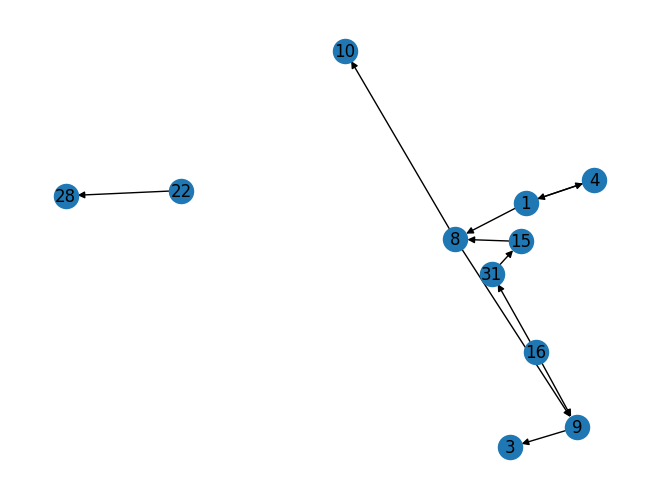

In [1913]:
# West Ham 70-80 mins
print("The details of 70-80 mins are:")
details(generate_graph(112-2,125-2,21,24))

The details of 80-95 mins are:
Player:  9 | Closeness Centrality:  0.625 | Degree:  5
Player:  4 | Closeness Centrality:  0.47619047619047616 | Degree:  5
Player:  10 | Closeness Centrality:  0.47619047619047616 | Degree:  5
Player:  8 | Closeness Centrality:  0.43478260869565216 | Degree:  4
Player:  1 | Closeness Centrality:  0.38461538461538464 | Degree:  6
Player:  28 | Closeness Centrality:  0.35714285714285715 | Degree:  4
Player:  3 | Closeness Centrality:  0.3333333333333333 | Degree:  3
Player:  20 | Closeness Centrality:  0.1 | Degree:  2
Player:  15 | Closeness Centrality:  0.0 | Degree:  2
Player:  22 | Closeness Centrality:  0.0 | Degree:  2
Player:  16 | Closeness Centrality:  0.0 | Degree:  4

Player:  1 | Degree Centrality:  6
Player:  4 | Degree Centrality:  5
Player:  9 | Degree Centrality:  5
Player:  10 | Degree Centrality:  5
Player:  8 | Degree Centrality:  4
Player:  28 | Degree Centrality:  4
Player:  16 | Degree Centrality:  4
Player:  3 | Degree Centrality:  3

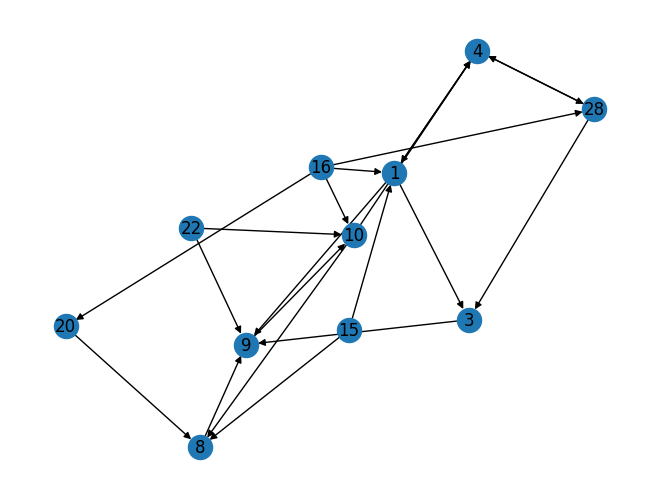

In [1914]:
# West Ham 80-95 mins
print("The details of 80-95 mins are:")
details(generate_graph(127-2,140-2,21,24))

The details of Extra mins are:
Player:  15 | Closeness Centrality:  0.4263157894736842 | Degree:  5
Player:  3 | Closeness Centrality:  0.4263157894736842 | Degree:  5
Player:  4 | Closeness Centrality:  0.3857142857142857 | Degree:  5
Player:  28 | Closeness Centrality:  0.3448275862068966 | Degree:  1
Player:  1 | Closeness Centrality:  0.3375 | Degree:  4
Player:  8 | Closeness Centrality:  0.324 | Degree:  5
Player:  10 | Closeness Centrality:  0.3 | Degree:  3
Player:  31 | Closeness Centrality:  0.3 | Degree:  3
Player:  9 | Closeness Centrality:  0.1 | Degree:  2
Player:  22 | Closeness Centrality:  0.0 | Degree:  1
Player:  16 | Closeness Centrality:  0.0 | Degree:  2

Player:  15 | Degree Centrality:  5
Player:  4 | Degree Centrality:  5
Player:  3 | Degree Centrality:  5
Player:  8 | Degree Centrality:  5
Player:  1 | Degree Centrality:  4
Player:  10 | Degree Centrality:  3
Player:  31 | Degree Centrality:  3
Player:  9 | Degree Centrality:  2
Player:  16 | Degree Centrality

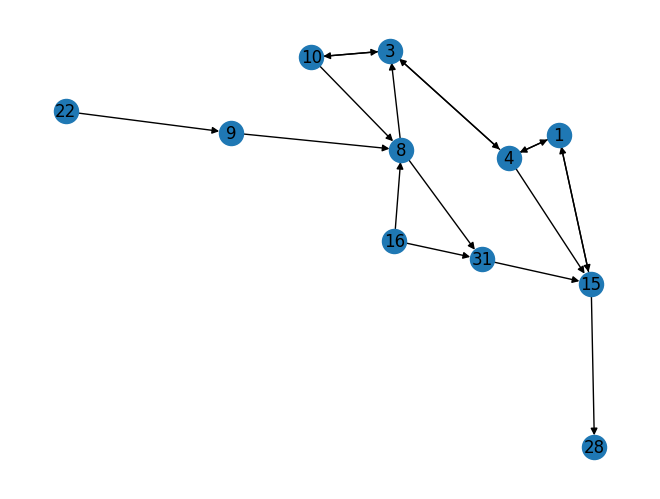

In [1915]:
# West Ham Extra mins
print("The details of Extra mins are:")
details(generate_graph(142-2,156-2,21,24))

# Westham Interception Analysis

Westham players Allison  Van Dijk  Robertson  Alexander Arnold  Konate   \
0        Fabianski        0         1          0                 0       0   
1        Cresswell        0         0          1                 0       1   
2           Dawson        0         0          0                 0       0   
3            zouma        0         0          0                 0       0   
4          Johnson        0         0          0                 0       0   
5          Lanzini        0         0          0                 0       0   
6           Soucek        0         0          0                 0       0   
7           Vlasic        0         1          0                 0       0   
8          Fornals        0         0          0                 0       0   
9          Antonio        0         0          0                 0       0   
10           Bowen        0         0          0                 0       0   

   Fabinhon  Henderson  Keita Mane  Salah  Diaz   
0          0          0     0     0      0     0  
1          1          1     0     0      0     0  
2          0          0     0     0      0     0  
3          0          0     0     0      0     0  
4          0          0     0     0      0     0  
5          0          0     0     0      0     0  
6          0          0     0     0      0     0  
7          0          0     0     0      0     0  
8          0          0     0     0      0     0  
9          0          0     0     0      0     0  
10         0          0     0     0      0     0

Player:  Cresswell | Degree Centrality:  4
Player:  Van Dijk  | Degree Centrality:  1
Player:  Robertson  | Degree Centrality:  1
Player:  Konate  | Degree Centrality:  1
Player:  Fabinhon  | Degree Centrality:  1
Player:  Henderson  | Degree Centrality:  1
Player:  Vlasic | Degree Centrality:  1
Player:  Allison  | Degree Centrality:  0
Player:  Alexander Arnold  | Degree Centrality:  0
Player:  Keita | Degree Centrality:  0
Player:  Mane  | Degree Centrality:  0

Player:  Cresswell | Closeness Centrality:  0.2 | Degree:  4
Player:  Vlasic | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree:  0
Player:  Van Dijk  | Closeness Centrality:  0.0 | Degree:  1
Player:  Robertson  | Closeness Centrality:  0.0 | Degree:  1
Player:  Alexander Arnold  | Closeness Centrality:  0.0 | Degree:  0
Player:  Konate  | Closeness Centrality:  0.0 | Degree:  1
Player:  Fabinhon  | Closeness Centrality:  0.0 | Degree:  1
Player:  Henderson  | Closeness Centra

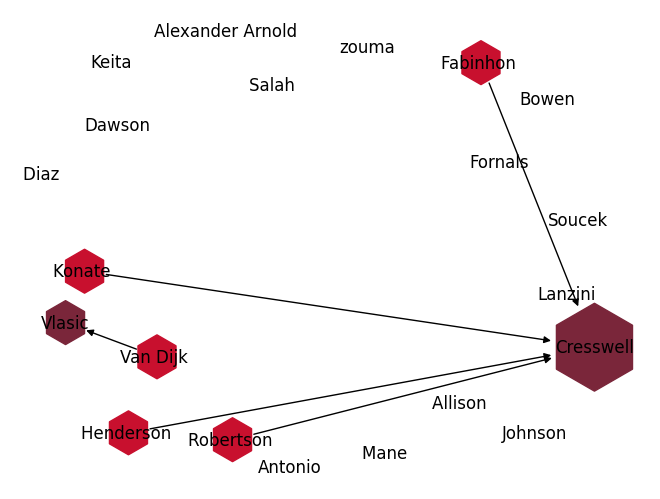

In [1916]:
# Liverpool Interceptions on Westham 0-10 mins
Interceptions(0,11,14, 26,'#C8102E','#7A263A','Westham players') 

In [1917]:
# Liverpool Interceptions on Westham 10-20 mins
Interceptions(13, 24, 14, 26, '#C8102E','#7A263A','Westham players') 

Westham players Allison  Van Dijk  Robertson  Alexander Arnold  Konate   \
13       Fabianski        0         0          0                 0       0   
14       Cresswell        0         0          0                 0       0   
15          Dawson        0         0          0                 0       0   
16           zouma        0         0          0                 0       0   
17         Johnson        0         0          0                 0       0   
18         Lanzini        0         0          0                 0       0   
19          Soucek        0         0          0                 1       0   
20          Vlasic        0         0          0                 2       0   
21         Fornals        0         0          1                 0       1   
22         Antonio        1         0          0                 0       0   
23           Bowen        0         0          0                 0       0   

   Fabinhon  Henderson  Keita Mane  Salah  Diaz   
13         0          0     0     0      0     0  
14         0          0     0     0      0     0  
15         0          0     0     0      0     0  
16         0          0     0     0      0     0  
17         0          0     0     0      0     1  
18         0          0     0     0      0     0  
19         0          0     0     0      0     0  
20         1          0     1     0      0     0  
21         0          0     0     0      0     0  
22         0          0     1     0      0     0  
23         0          0     0     0      0     1

Player:  Vlasic | Degree Centrality:  3
Player:  Alexander Arnold  | Degree Centrality:  2
Player:  Keita | Degree Centrality:  2
Player:  Diaz  | Degree Centrality:  2
Player:  Fornals | Degree Centrality:  2
Player:  Antonio | Degree Centrality:  2
Player:  Allison  | Degree Centrality:  1
Player:  Robertson  | Degree Centrality:  1
Player:  Konate  | Degree Centrality:  1
Player:  Fabinhon  | Degree Centrality:  1
Player:  Johnson | Degree Centrality:  1

Player:  Vlasic | Closeness Centrality:  0.15 | Degree:  3
Player:  Fornals | Closeness Centrality:  0.1 | Degree:  2
Player:  Antonio | Closeness Centrality:  0.1 | Degree:  2
Player:  Johnson | Closeness Centrality:  0.05 | Degree:  1
Player:  Soucek | Closeness Centrality:  0.05 | Degree:  1
Player:  Bowen | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree:  1
Player:  Van Dijk  | Closeness Centrality:  0.0 | Degree:  0
Player:  Robertson  | Closeness Centrality:  0.0 | Degree:  1


In [1918]:
# Liverpool Interceptions on Westham 20-30 mins
Interceptions(26, 37, 14, 26, '#C8102E','#7A263A','Westham players') 

Westham players Allison  Van Dijk  Robertson  Alexander Arnold  Konate   \
26       Fabianski        0         1          0                 0       0   
27       Cresswell        0         1          0                 0       0   
28          Dawson        0         0          0                 0       0   
29           zouma        0         0          0                 1       0   
30         Johnson        0         0          0                 0       0   
31         Lanzini        1         0          0                 0       0   
32          Soucek        0         0          0                 1       0   
33          Vlasic        0         0          0                 0       0   
34         Fornals        1         0          0                 0       0   
35         Antonio        1         0          1                 1       0   
36           Bowen        0         0          0                 0       0   

   Fabinhon  Henderson  Keita Mane  Salah  Diaz   
26         0          0     0     0      0     0  
27         0          1     0     0      0     0  
28         0          1     0     0      0     0  
29         0          0     0     0      0     0  
30         0          0     0     0      0     0  
31         0          0     0     0      0     0  
32         1          0     0     0      0     0  
33         0          0     0     0      0     0  
34         0          0     0     0      0     0  
35         0          1     0     0      0     0  
36         1          0     1     0      0     1

Player:  Antonio | Degree Centrality:  4
Player:  Allison  | Degree Centrality:  3
Player:  Alexander Arnold  | Degree Centrality:  3
Player:  Henderson  | Degree Centrality:  3
Player:  Bowen | Degree Centrality:  3
Player:  Fabinhon  | Degree Centrality:  2
Player:  Cresswell | Degree Centrality:  2
Player:  Soucek | Degree Centrality:  2
Player:  Van Dijk  | Degree Centrality:  1
Player:  Robertson  | Degree Centrality:  1
Player:  Keita | Degree Centrality:  1

Player:  Antonio | Closeness Centrality:  0.2 | Degree:  4
Player:  Bowen | Closeness Centrality:  0.15 | Degree:  3
Player:  Cresswell | Closeness Centrality:  0.1 | Degree:  2
Player:  Soucek | Closeness Centrality:  0.1 | Degree:  2
Player:  Dawson | Closeness Centrality:  0.05 | Degree:  1
Player:  zouma | Closeness Centrality:  0.05 | Degree:  1
Player:  Lanzini | Closeness Centrality:  0.05 | Degree:  1
Player:  Fornals | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree: 

Westham players Allison  Van Dijk  Robertson  Alexander Arnold  Konate   \
39       Fabianski        0         0          0                 0       1   
40       Cresswell        1         0          0                 1       0   
41          Dawson        0         0          0                 0       0   
42           zouma        0         0          0                 0       0   
43         Johnson        0         0          0                 0       0   
44         Lanzini        0         0          0                 0       0   
45          Soucek        0         0          0                 0       0   
46          Vlasic        0         0          0                 0       1   
47         Fornals        1         0          0                 1       1   
48         Antonio        0         0          0                 0       0   
49           Bowen        0         0          1                 0       0   

   Fabinhon  Henderson  Keita Mane  Salah  Diaz   
39         0          0     0     0      0     0  
40         0          0     0     0      0     0  
41         0          0     0     0      0     0  
42         0          0     0     0      0     0  
43         0          0     0     0      0     0  
44         0          0     0     0      0     0  
45         0          0     0     0      0     0  
46         0          0     0     0      0     0  
47         0          0     0     0      0     0  
48         0          0     0     0      0     0  
49         0          0     0     0      0     0

Player:  Fornals | Degree Centrality:  3
Player:  Allison  | Degree Centrality:  2
Player:  Alexander Arnold  | Degree Centrality:  2
Player:  Konate  | Degree Centrality:  2
Player:  Cresswell | Degree Centrality:  2
Player:  Robertson  | Degree Centrality:  1
Player:  Vlasic | Degree Centrality:  1
Player:  Bowen | Degree Centrality:  1
Player:  Van Dijk  | Degree Centrality:  0
Player:  Fabinhon  | Degree Centrality:  0
Player:  Henderson  | Degree Centrality:  0

Player:  Fornals | Closeness Centrality:  0.15 | Degree:  3
Player:  Cresswell | Closeness Centrality:  0.1 | Degree:  2
Player:  Vlasic | Closeness Centrality:  0.05 | Degree:  1
Player:  Bowen | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree:  2
Player:  Van Dijk  | Closeness Centrality:  0.0 | Degree:  0
Player:  Robertson  | Closeness Centrality:  0.0 | Degree:  1
Player:  Alexander Arnold  | Closeness Centrality:  0.0 | Degree:  2
Player:  Konate  | Closeness Centralit

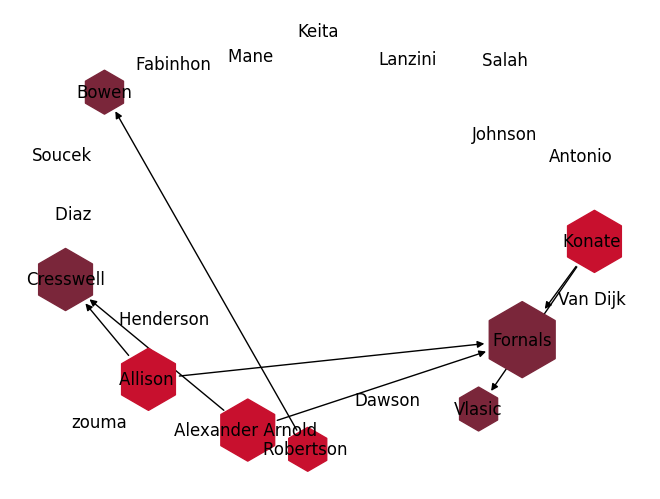

In [1919]:
# Liverpool Interceptions on Westham 30-40 mins
Interceptions(39, 50, 14, 26, '#C8102E','#7A263A','Westham players') 

Westham players Allison  Van Dijk  Robertson  Alexander Arnold  Konate   \
52       Fabianski        0         0          0                 0       0   
53       Cresswell        0         0          0                 0       0   
54          Dawson        0         0          0                 0       0   
55           zouma        0         0          0                 0       0   
56         Johnson        0         0          0                 0       0   
57         Lanzini        0         0          0                 0       0   
58          Soucek        0         0          0                 1       0   
59          Vlasic        0         0          0                 0       0   
60         Fornals        0         0          0                 0       0   
61         Antonio        0         0          1                 1       0   
62           Bowen        0         0          0                 0       0   

   Fabinhon  Henderson  Keita Mane  Salah  Diaz   
52         0          0     0     0      0     0  
53         0          1     0     0      0     0  
54         0          0     0     0      0     0  
55         0          0     0     0      0     0  
56         0          0     0     0      0     0  
57         0          0     0     0      0     0  
58         0          0     0     0      0     0  
59         0          0     0     0      0     0  
60         0          0     0     0      0     0  
61         0          0     0     0      0     0  
62         0          0     0     0      0     0

Player:  Alexander Arnold  | Degree Centrality:  2
Player:  Antonio | Degree Centrality:  2
Player:  Robertson  | Degree Centrality:  1
Player:  Henderson  | Degree Centrality:  1
Player:  Cresswell | Degree Centrality:  1
Player:  Soucek | Degree Centrality:  1
Player:  Allison  | Degree Centrality:  0
Player:  Van Dijk  | Degree Centrality:  0
Player:  Konate  | Degree Centrality:  0
Player:  Fabinhon  | Degree Centrality:  0
Player:  Keita | Degree Centrality:  0

Player:  Antonio | Closeness Centrality:  0.1 | Degree:  2
Player:  Cresswell | Closeness Centrality:  0.05 | Degree:  1
Player:  Soucek | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree:  0
Player:  Van Dijk  | Closeness Centrality:  0.0 | Degree:  0
Player:  Robertson  | Closeness Centrality:  0.0 | Degree:  1
Player:  Alexander Arnold  | Closeness Centrality:  0.0 | Degree:  2
Player:  Konate  | Closeness Centrality:  0.0 | Degree:  0
Player:  Fabinhon  | Closeness Centra

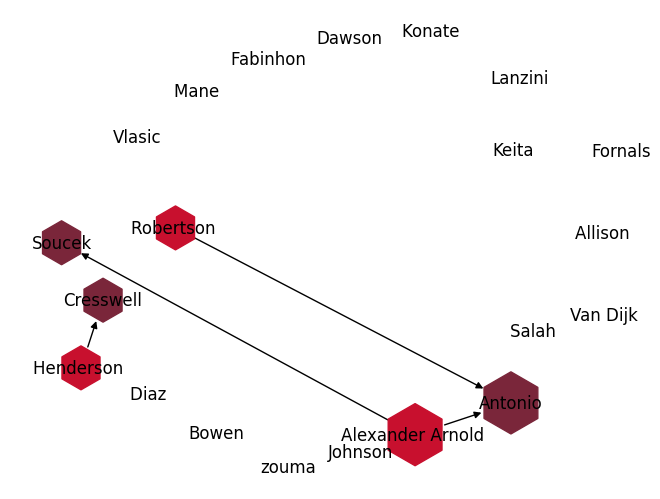

In [1920]:
# Liverpool Interceptions on Westham 40-50 mins
Interceptions(52, 63, 14, 26,'#C8102E','#7A263A','Westham players') 

In [1921]:
# Liverpool Interceptions on Westham 50-60 mins
Interceptions(65, 77, 14, 26,'#C8102E','#7A263A','Westham players') 

Westham players Allison  Van Dijk  Robertson  Alexander Arnold  Konate   \
65       Fabianski        0         0          0                 0       0   
66       Cresswell        0         0          0                 0       0   
67          Dawson        0         0          0                 0       0   
68           zouma        0         0          0                 0       0   
69         Johnson        0         1          0                 0       0   
70         Lanzini        0         0          0                 0       0   
71          Soucek        0         0          0                 0       0   
72          Vlasic        0         0          0                 0       0   
73         Fornals        0         1          0                 0       0   
74         Antonio        0         0          0                 0       0   
75           Bowen        0         0          0                 0       0   
76        Benrahma        0         0          0                 0       1   

   Fabinhon  Henderson  Keita Mane  Salah  Diaz   
65         0          0     0     0      0     0  
66         1          0     0     0      0     0  
67         0          0     0     0      0     0  
68         0          0     0     0      0     0  
69         0          0     0     0      0     0  
70         0          0     0     0      0     0  
71         0          0     0     0      0     0  
72         0          0     0     0      0     0  
73         0          0     0     0      0     0  
74         0          0     0     0      0     0  
75         0          0     0     0      0     0  
76         0          0     0     0      0     0

Player:  Van Dijk  | Degree Centrality:  2
Player:  Konate  | Degree Centrality:  1
Player:  Fabinhon  | Degree Centrality:  1
Player:  Cresswell | Degree Centrality:  1
Player:  Johnson | Degree Centrality:  1
Player:  Fornals | Degree Centrality:  1
Player:  Benrahma | Degree Centrality:  1
Player:  Allison  | Degree Centrality:  0
Player:  Robertson  | Degree Centrality:  0
Player:  Alexander Arnold  | Degree Centrality:  0
Player:  Henderson  | Degree Centrality:  0

Player:  Cresswell | Closeness Centrality:  0.047619047619047616 | Degree:  1
Player:  Johnson | Closeness Centrality:  0.047619047619047616 | Degree:  1
Player:  Fornals | Closeness Centrality:  0.047619047619047616 | Degree:  1
Player:  Benrahma | Closeness Centrality:  0.047619047619047616 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree:  0
Player:  Van Dijk  | Closeness Centrality:  0.0 | Degree:  2
Player:  Robertson  | Closeness Centrality:  0.0 | Degree:  0
Player:  Alexander Arnold  | Close

In [1922]:
# Liverpool Interceptions on Westham 60-70 mins
Interceptions(79, 91, 14, 26,'#C8102E','#7A263A','Westham players')  

Westham players Allison  Van Dijk  Robertson  Alexander Arnold  Konate   \
79       Fabianski        0         0          0                 0       0   
80       Cresswell        0         0          0                 0       0   
81          Dawson        0         0          0                 0       0   
82           zouma        0         0          0                 0       0   
83         Johnson        0         0          0                 0       0   
84         Lanzini        0         0          0                 1       0   
85          Soucek        0         0          0                 0       0   
86          Vlasic        0         0          0                 0       0   
87         Fornals        0         0          0                 0       0   
88         Antonio        0         0          0                 0       0   
89           Bowen        0         0          0                 0       0   
90        Benrahma        0         0          0                 0       0   

   Fabinhon  Henderson  Keita Mane  Salah  Diaz   
79         0          0     0     0      0     0  
80         0          0     0     0      0     0  
81         0          0     0     0      0     0  
82         0          0     0     0      0     0  
83         0          0     0     0      0     0  
84         0          0     0     0      0     0  
85         0          0     0     0      0     0  
86         0          0     0     0      0     0  
87         0          0     0     0      0     0  
88         0          0     0     0      0     0  
89         0          0     0     0      0     0  
90         0          0     0     0      0     0

Player:  Alexander Arnold  | Degree Centrality:  1
Player:  Lanzini | Degree Centrality:  1
Player:  Allison  | Degree Centrality:  0
Player:  Van Dijk  | Degree Centrality:  0
Player:  Robertson  | Degree Centrality:  0
Player:  Konate  | Degree Centrality:  0
Player:  Fabinhon  | Degree Centrality:  0
Player:  Henderson  | Degree Centrality:  0
Player:  Keita | Degree Centrality:  0
Player:  Mane  | Degree Centrality:  0
Player:  Salah  | Degree Centrality:  0

Player:  Lanzini | Closeness Centrality:  0.047619047619047616 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree:  0
Player:  Van Dijk  | Closeness Centrality:  0.0 | Degree:  0
Player:  Robertson  | Closeness Centrality:  0.0 | Degree:  0
Player:  Alexander Arnold  | Closeness Centrality:  0.0 | Degree:  1
Player:  Konate  | Closeness Centrality:  0.0 | Degree:  0
Player:  Fabinhon  | Closeness Centrality:  0.0 | Degree:  0
Player:  Henderson  | Closeness Centrality:  0.0 | Degree:  0
Player:  Keita | Close

Westham players Allison  Van Dijk  Robertson  Alexander Arnold  Konate   \
93        Fabianski        0         0          0                 0       0   
94        Cresswell        0         0          0                 0       0   
95           Dawson        0         0          0                 0       0   
96            zouma        0         0          0                 0       0   
97          Johnson        0         0          0                 0       0   
98          Lanzini        0         0          0                 0       0   
99           Soucek        0         0          0                 0       0   
100          Vlasic        0         0          0                 0       0   
101         Fornals        0         1          0                 0       0   
102         Antonio        0         0          0                 0       0   
103           Bowen        0         0          0                 0       0   
104        Benrahma        0         0          0                 0       1   

    Fabinhon  Henderson  Keita Mane  Salah  Diaz   
93          0          0     0     0      0     0  
94          0          0     0     0      0     0  
95          0          0     0     0      0     0  
96          0          0     0     0      0     0  
97          0          0     0     0      0     0  
98          0          0     0     0      0     0  
99          0          0     0     0      0     0  
100         0          0     0     0      0     0  
101         0          0     0     0      0     0  
102         0          0     0     0      0     0  
103         0          0     0     0      0     0  
104         0          0     0     0      0     0

Player:  Van Dijk  | Degree Centrality:  1
Player:  Konate  | Degree Centrality:  1
Player:  Fornals | Degree Centrality:  1
Player:  Benrahma | Degree Centrality:  1
Player:  Allison  | Degree Centrality:  0
Player:  Robertson  | Degree Centrality:  0
Player:  Alexander Arnold  | Degree Centrality:  0
Player:  Fabinhon  | Degree Centrality:  0
Player:  Henderson  | Degree Centrality:  0
Player:  Keita | Degree Centrality:  0
Player:  Mane  | Degree Centrality:  0

Player:  Fornals | Closeness Centrality:  0.047619047619047616 | Degree:  1
Player:  Benrahma | Closeness Centrality:  0.047619047619047616 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree:  0
Player:  Van Dijk  | Closeness Centrality:  0.0 | Degree:  1
Player:  Robertson  | Closeness Centrality:  0.0 | Degree:  0
Player:  Alexander Arnold  | Closeness Centrality:  0.0 | Degree:  0
Player:  Konate  | Closeness Centrality:  0.0 | Degree:  1
Player:  Fabinhon  | Closeness Centrality:  0.0 | Degree:  0
Playe

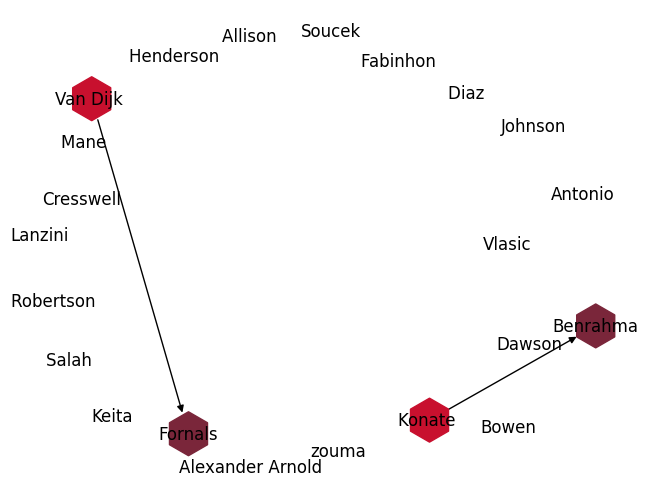

In [1923]:
# Liverpool Interceptions on Westham 70-80 mins
Interceptions(93, 105, 14, 26,'#C8102E','#7A263A','Westham players')

Westham players Allison  Van Dijk  Robertson  Alexander Arnold  Konate   \
107       Fabianski        0         0          0                 0       0   
108       Cresswell        0         0          0                 0       0   
109          Dawson        0         0          0                 0       0   
110           zouma        0         0          0                 0       0   
111         Johnson        0         0          0                 0       0   
112         Lanzini        0         0          0                 1       0   
113          Soucek        0         0          0                 0       0   
114          Vlasic        0         0          0                 0       0   
115         Fornals        0         0          0                 0       0   
116         Antonio        0         0          0                 0       0   
117           Bowen        0         0          0                 0       0   
118        Benrahma        0         0          0                 0       0   

    Fabinhon  Henderson  Keita Mane  Salah  Diaz   
107         0          0     0     0      0     0  
108         0          0     0     0      0     0  
109         0          0     0     0      0     0  
110         0          0     0     0      0     0  
111         0          0     0     0      0     0  
112         0          0     0     0      0     0  
113         0          0     0     0      0     0  
114         0          0     0     0      0     0  
115         0          0     0     0      0     0  
116         0          0     0     0      0     0  
117         0          0     0     0      0     0  
118         0          0     0     0      0     0

Player:  Alexander Arnold  | Degree Centrality:  1
Player:  Lanzini | Degree Centrality:  1
Player:  Allison  | Degree Centrality:  0
Player:  Van Dijk  | Degree Centrality:  0
Player:  Robertson  | Degree Centrality:  0
Player:  Konate  | Degree Centrality:  0
Player:  Fabinhon  | Degree Centrality:  0
Player:  Henderson  | Degree Centrality:  0
Player:  Keita | Degree Centrality:  0
Player:  Mane  | Degree Centrality:  0
Player:  Salah  | Degree Centrality:  0

Player:  Lanzini | Closeness Centrality:  0.047619047619047616 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree:  0
Player:  Van Dijk  | Closeness Centrality:  0.0 | Degree:  0
Player:  Robertson  | Closeness Centrality:  0.0 | Degree:  0
Player:  Alexander Arnold  | Closeness Centrality:  0.0 | Degree:  1
Player:  Konate  | Closeness Centrality:  0.0 | Degree:  0
Player:  Fabinhon  | Closeness Centrality:  0.0 | Degree:  0
Player:  Henderson  | Closeness Centrality:  0.0 | Degree:  0
Player:  Keita | Close

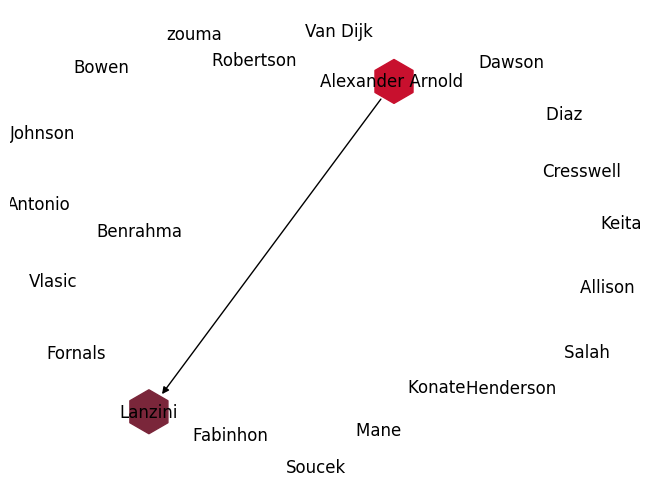

In [1924]:
# Liverpool Interceptions on Westham 80-90 mins
Interceptions(107, 119, 14, 26,'#C8102E','#7A263A','Westham players') 

# Match 2: Liverpool vs Everton

In [1925]:
arr=pd.read_excel("LIVMatches.xlsx", sheet_name='LIV vs EVE').to_numpy()

# Liverpool Passing Analysis

The details of 0-10 mins are:
Player:  2 | Closeness Centrality:  0.7363636363636364 | Degree:  11
Player:  4 | Closeness Centrality:  0.5785714285714286 | Degree:  9
Player:  21 | Closeness Centrality:  0.54 | Degree:  8
Player:  66 | Closeness Centrality:  0.54 | Degree:  12
Player:  11 | Closeness Centrality:  0.54 | Degree:  9
Player:  19 | Closeness Centrality:  0.50625 | Degree:  9
Player:  28 | Closeness Centrality:  0.47647058823529415 | Degree:  6
Player:  23 | Closeness Centrality:  0.4263157894736842 | Degree:  3
Player:  27 | Closeness Centrality:  0.4 | Degree:  1
Player:  3 | Closeness Centrality:  0.3857142857142857 | Degree:  7
Player:  1 | Closeness Centrality:  0.0 | Degree:  1

Player:  66 | Degree Centrality:  12
Player:  2 | Degree Centrality:  11
Player:  4 | Degree Centrality:  9
Player:  11 | Degree Centrality:  9
Player:  19 | Degree Centrality:  9
Player:  21 | Degree Centrality:  8
Player:  3 | Degree Centrality:  7
Player:  28 | Degree Centrality:  6
Player:

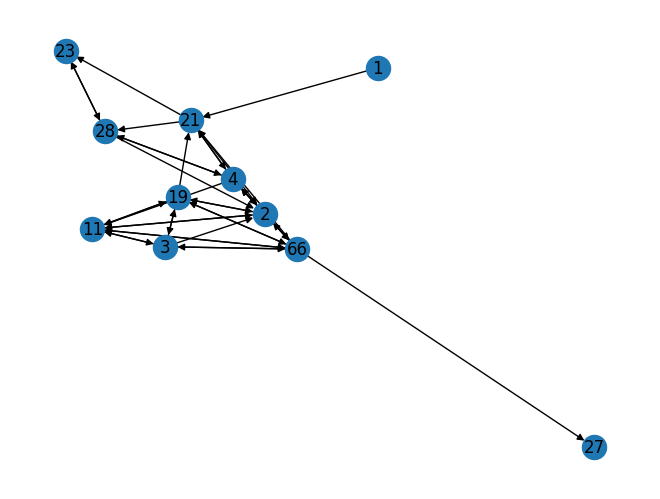

In [1926]:
# Liverpool 0-10 mins
print("The details of 0-10 mins are:")
details(generate_graph(8-2,19-2,2,5))
make_table(generate_graph(8-2,19-2,2,5))

The details of 10-20 mins are:
Player:  21 | Closeness Centrality:  0.625 | Degree:  8
Player:  3 | Closeness Centrality:  0.625 | Degree:  7
Player:  2 | Closeness Centrality:  0.5882352941176471 | Degree:  7
Player:  23 | Closeness Centrality:  0.5555555555555556 | Degree:  5
Player:  4 | Closeness Centrality:  0.5263157894736842 | Degree:  8
Player:  66 | Closeness Centrality:  0.5263157894736842 | Degree:  8
Player:  27 | Closeness Centrality:  0.5263157894736842 | Degree:  5
Player:  19 | Closeness Centrality:  0.5 | Degree:  6
Player:  11 | Closeness Centrality:  0.43478260869565216 | Degree:  4
Player:  1 | Closeness Centrality:  0.4 | Degree:  2
Player:  28 | Closeness Centrality:  0.37037037037037035 | Degree:  4

Player:  4 | Degree Centrality:  8
Player:  21 | Degree Centrality:  8
Player:  66 | Degree Centrality:  8
Player:  2 | Degree Centrality:  7
Player:  3 | Degree Centrality:  7
Player:  19 | Degree Centrality:  6
Player:  23 | Degree Centrality:  5
Player:  27 | Degr

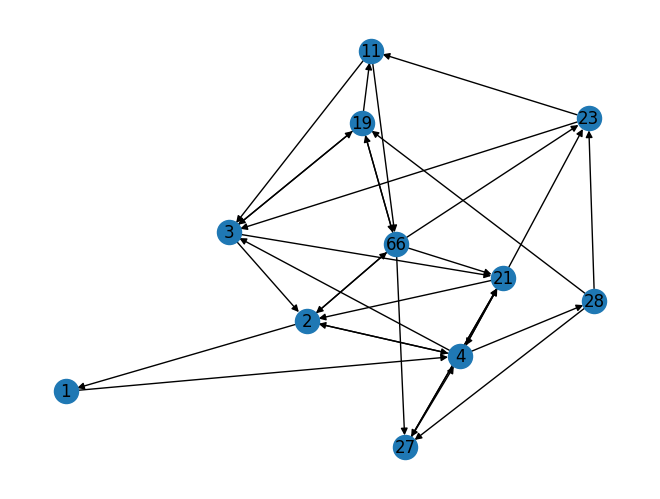

In [1927]:
# Liverpool 10-20 mins
print("The details of 10-20 mins are:")
details(generate_graph(23-2,34-2,2,5))

The details of 20-30 mins are:
Player:  3 | Closeness Centrality:  0.6124999999999999 | Degree:  7
Player:  4 | Closeness Centrality:  0.5568181818181818 | Degree:  8
Player:  19 | Closeness Centrality:  0.5104166666666667 | Degree:  3
Player:  1 | Closeness Centrality:  0.47115384615384615 | Degree:  5
Player:  66 | Closeness Centrality:  0.47115384615384615 | Degree:  6
Player:  27 | Closeness Centrality:  0.4375 | Degree:  3
Player:  2 | Closeness Centrality:  0.3602941176470588 | Degree:  4
Player:  21 | Closeness Centrality:  0.3602941176470588 | Degree:  3
Player:  23 | Closeness Centrality:  0.32 | Degree:  1

Player:  4 | Degree Centrality:  8
Player:  3 | Degree Centrality:  7
Player:  66 | Degree Centrality:  6
Player:  1 | Degree Centrality:  5
Player:  2 | Degree Centrality:  4
Player:  21 | Degree Centrality:  3
Player:  19 | Degree Centrality:  3
Player:  27 | Degree Centrality:  3
Player:  23 | Degree Centrality:  1

Player:  3 | Page Rank Centrality:  0.1968224806127163

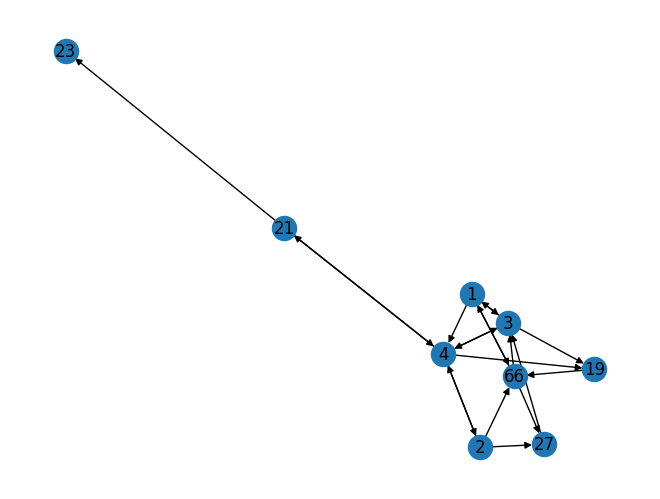

In [1928]:
# Liverpool 20-30 mins
print("The details of 20-30 mins are:")
details(generate_graph(38-2,49-2,2,5))

The details of 30-40 mins are:
Player:  3 | Closeness Centrality:  0.5785714285714286 | Degree:  8
Player:  2 | Closeness Centrality:  0.54 | Degree:  8
Player:  4 | Closeness Centrality:  0.54 | Degree:  8
Player:  66 | Closeness Centrality:  0.54 | Degree:  9
Player:  28 | Closeness Centrality:  0.50625 | Degree:  6
Player:  19 | Closeness Centrality:  0.50625 | Degree:  6
Player:  27 | Closeness Centrality:  0.43478260869565216 | Degree:  2
Player:  1 | Closeness Centrality:  0.4263157894736842 | Degree:  3
Player:  21 | Closeness Centrality:  0.405 | Degree:  5
Player:  11 | Closeness Centrality:  0.405 | Degree:  5
Player:  23 | Closeness Centrality:  0.31153846153846154 | Degree:  2

Player:  66 | Degree Centrality:  9
Player:  2 | Degree Centrality:  8
Player:  4 | Degree Centrality:  8
Player:  3 | Degree Centrality:  8
Player:  28 | Degree Centrality:  6
Player:  19 | Degree Centrality:  6
Player:  21 | Degree Centrality:  5
Player:  11 | Degree Centrality:  5
Player:  1 | Deg

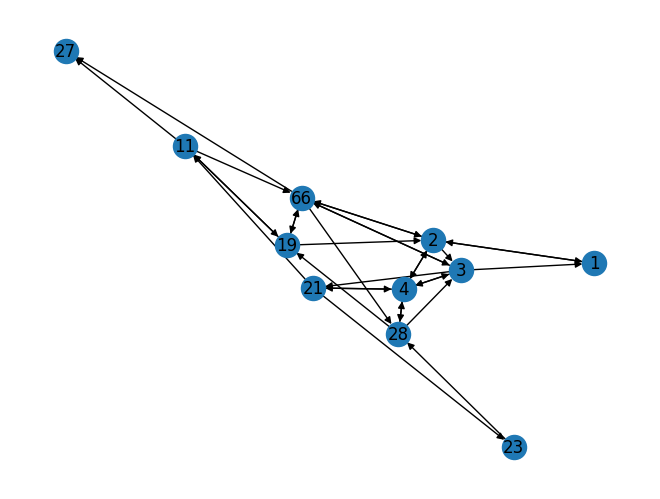

In [1929]:
# Liverpool 30-40 mins
print("The details of 30-40 mins are:")
details(generate_graph(53-2,64-2,2,5))

The details of 40-50 mins are:
Player:  4 | Closeness Centrality:  0.6111111111111112 | Degree:  9
Player:  27 | Closeness Centrality:  0.55 | Degree:  5
Player:  2 | Closeness Centrality:  0.5238095238095238 | Degree:  10
Player:  23 | Closeness Centrality:  0.5238095238095238 | Degree:  5
Player:  21 | Closeness Centrality:  0.5 | Degree:  8
Player:  28 | Closeness Centrality:  0.4782608695652174 | Degree:  5
Player:  3 | Closeness Centrality:  0.4583333333333333 | Degree:  6
Player:  66 | Closeness Centrality:  0.44 | Degree:  4
Player:  19 | Closeness Centrality:  0.44 | Degree:  6
Player:  11 | Closeness Centrality:  0.44 | Degree:  5
Player:  1 | Closeness Centrality:  0.4230769230769231 | Degree:  4

Player:  2 | Degree Centrality:  10
Player:  4 | Degree Centrality:  9
Player:  21 | Degree Centrality:  8
Player:  3 | Degree Centrality:  6
Player:  19 | Degree Centrality:  6
Player:  28 | Degree Centrality:  5
Player:  27 | Degree Centrality:  5
Player:  23 | Degree Centrality: 

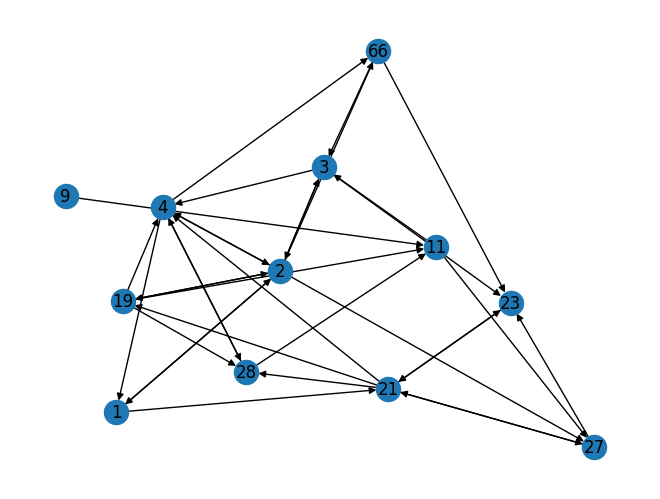

In [1930]:
# Liverpool 40-50 mins
print("The details of 40-50 mins are:")
details(generate_graph(68-2,80-2,2,5))

The details of 50-60 mins are:
Player:  23 | Closeness Centrality:  0.405 | Degree:  3
Player:  21 | Closeness Centrality:  0.3857142857142857 | Degree:  4
Player:  11 | Closeness Centrality:  0.3857142857142857 | Degree:  5
Player:  19 | Closeness Centrality:  0.3681818181818182 | Degree:  5
Player:  3 | Closeness Centrality:  0.31153846153846154 | Degree:  2
Player:  4 | Closeness Centrality:  0.3 | Degree:  2
Player:  66 | Closeness Centrality:  0.2793103448275862 | Degree:  3
Player:  27 | Closeness Centrality:  0.2564102564102564 | Degree:  1
Player:  1 | Closeness Centrality:  0.1 | Degree:  2
Player:  9 | Closeness Centrality:  0.0 | Degree:  2
Player:  7 | Closeness Centrality:  0.0 | Degree:  1

Player:  19 | Degree Centrality:  5
Player:  11 | Degree Centrality:  5
Player:  21 | Degree Centrality:  4
Player:  66 | Degree Centrality:  3
Player:  23 | Degree Centrality:  3
Player:  1 | Degree Centrality:  2
Player:  4 | Degree Centrality:  2
Player:  3 | Degree Centrality:  2
P

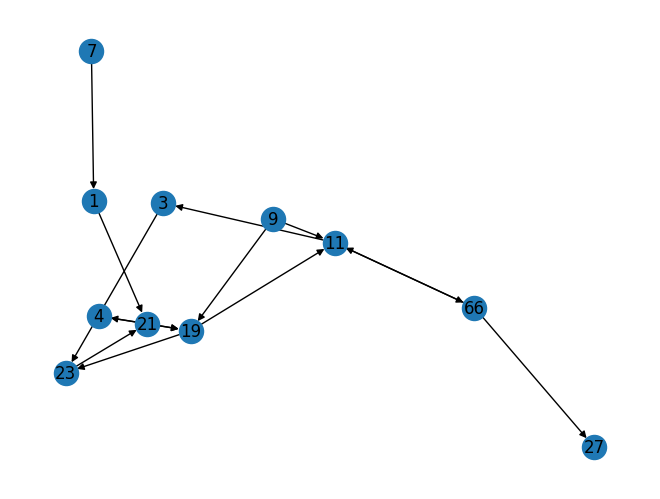

In [1931]:
# Liverpool 50-60 mins
print("The details of 50-60 mins are:")
details(generate_graph(84-2,97-2,2,5))

The details of 60-70 mins are:
Player:  4 | Closeness Centrality:  0.4 | Degree:  3
Player:  2 | Closeness Centrality:  0.26666666666666666 | Degree:  2
Player:  19 | Closeness Centrality:  0.2 | Degree:  1
Player:  23 | Closeness Centrality:  0.2 | Degree:  1
Player:  7 | Closeness Centrality:  0.0 | Degree:  2
Player:  26 | Closeness Centrality:  0.0 | Degree:  1

Player:  4 | Degree Centrality:  3
Player:  2 | Degree Centrality:  2
Player:  7 | Degree Centrality:  2
Player:  19 | Degree Centrality:  1
Player:  23 | Degree Centrality:  1
Player:  26 | Degree Centrality:  1

Player:  4 | Page Rank Centrality:  0.40795635016501053 | Degree:  3
Player:  2 | Page Rank Centrality:  0.3886893521410695 | Degree:  2
Player:  19 | Page Rank Centrality:  0.05974842767295598 | Degree:  1
Player:  23 | Page Rank Centrality:  0.05974842767295598 | Degree:  1
Player:  7 | Page Rank Centrality:  0.041928721174004195 | Degree:  2
Player:  26 | Page Rank Centrality:  0.041928721174004195 | Degree:  1

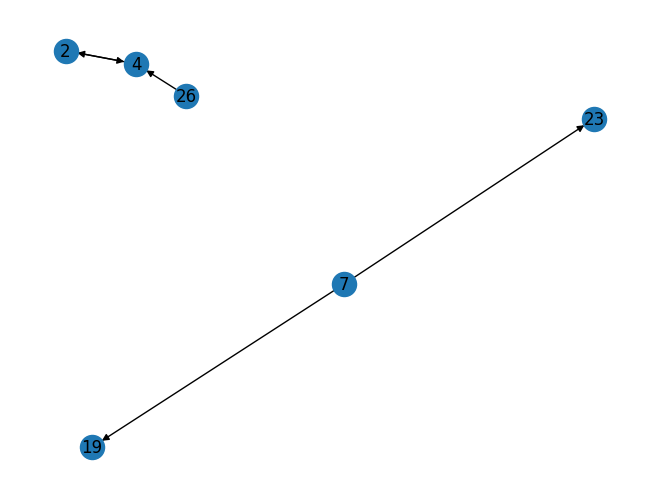

In [1932]:
# Liverpool 60-70 mins
print("The details of 60-70 mins are:")
details(generate_graph(101-2,115-2,2,5))

In [1933]:
# Liverpool 70-80 mins
print("The details of 70-80 mins are:")
details(generate_graph(119-2,135-2,2,5))

The details of 70-80 mins are:
Player:  11 | Closeness Centrality:  0.5 | Degree:  5
Player:  23 | Closeness Centrality:  0.362962962962963 | Degree:  1
Player:  2 | Closeness Centrality:  0.3333333333333333 | Degree:  4
Player:  4 | Closeness Centrality:  0.2222222222222222 | Degree:  2
Player:  27 | Closeness Centrality:  0.1111111111111111 | Degree:  2
Player:  1 | Closeness Centrality:  0.0 | Degree:  1
Player:  9 | Closeness Centrality:  0.0 | Degree:  2
Player:  7 | Closeness Centrality:  0.0 | Degree:  2
Player:  26 | Closeness Centrality:  0.0 | Degree:  1
Player:  32 | Closeness Centrality:  0.0 | Degree:  2

Player:  11 | Degree Centrality:  5
Player:  2 | Degree Centrality:  4
Player:  27 | Degree Centrality:  2
Player:  9 | Degree Centrality:  2
Player:  7 | Degree Centrality:  2
Player:  4 | Degree Centrality:  2
Player:  32 | Degree Centrality:  2
Player:  1 | Degree Centrality:  1
Player:  23 | Degree Centrality:  1
Player:  26 | Degree Centrality:  1

Player:  23 | Page

The details of 80-90 mins + Extra Time are:
Player:  11 | Closeness Centrality:  0.6666666666666666 | Degree:  7
Player:  4 | Closeness Centrality:  0.5882352941176471 | Degree:  8
Player:  2 | Closeness Centrality:  0.5882352941176471 | Degree:  6
Player:  23 | Closeness Centrality:  0.5 | Degree:  6
Player:  1 | Closeness Centrality:  0.45454545454545453 | Degree:  4
Player:  3 | Closeness Centrality:  0.45454545454545453 | Degree:  6
Player:  9 | Closeness Centrality:  0.0 | Degree:  2
Player:  7 | Closeness Centrality:  0.0 | Degree:  4
Player:  26 | Closeness Centrality:  0.0 | Degree:  2
Player:  20 | Closeness Centrality:  0.0 | Degree:  2
Player:  32 | Closeness Centrality:  0.0 | Degree:  3

Player:  4 | Degree Centrality:  8
Player:  11 | Degree Centrality:  7
Player:  2 | Degree Centrality:  6
Player:  3 | Degree Centrality:  6
Player:  23 | Degree Centrality:  6
Player:  1 | Degree Centrality:  4
Player:  7 | Degree Centrality:  4
Player:  32 | Degree Centrality:  3
Player:

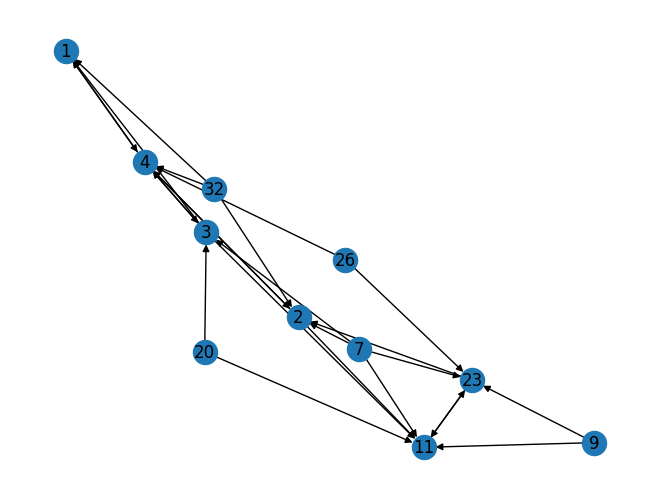

In [1934]:
# Liverpool 80-90 mins + Extra time
print("The details of 80-90 mins + Extra Time are:")
details(generate_graph(139-2,155-2,2,5))

# Liverpool Interception Analysis

In [1935]:
dfs = pd.read_excel('Interceptions.xlsx', sheet_name='Match2')

In [1936]:
# Everton Interceptions on Liverpool 0-10 mins
Interceptions(0, 11, 0, 12, '#003399','#C8102E','Liverpool players') 

Liverpool players Pickford Patterson Coady   Tarkowski Mykolenko Davies  \
0            Allison        0         0       0         0         0      0   
1           Van Dijk        0         0       0         0         0      0   
2              Gomez        0         0       0         0         0      0   
3   Alexander-Arnold        0         0       0         0         0      0   
4           Tsimikas        0         0       1         0         0      0   
5            Elliott        1         0       0         0         0      1   
6            Fabinho        0         0       0         0         0      0   
7           Carvalho        0         1       0         0         0      0   
8              Salah        0         0       0         2         0      0   
9             Nunez         0         0       0         0         0      0   
10             Diaz         0         0       1         0         0      1   

   Onana Iwobi Gray Maupay Gordon  
0      0     0    0      0      0  
1      0     0    0      0      0  
2      0     0    0      0      0  
3      1     1    0      0      1  
4      0     0    0      0      0  
5      0     0    0      0      1  
6      0     0    0      0      0  
7      0     0    0      0      0  
8      1     0    0      0      0  
9      0     0    0      0      0  
10     0     0    0      0      0

Player:  Alexander-Arnold | Degree Centrality:  3
Player:  Elliott | Degree Centrality:  3
Player:  Coady   | Degree Centrality:  2
Player:  Davies | Degree Centrality:  2
Player:  Onana | Degree Centrality:  2
Player:  Gordon | Degree Centrality:  2
Player:  Salah | Degree Centrality:  2
Player:  Diaz  | Degree Centrality:  2
Player:  Pickford | Degree Centrality:  1
Player:  Patterson | Degree Centrality:  1
Player:  Tarkowski | Degree Centrality:  1

Player:  Alexander-Arnold | Closeness Centrality:  0.15 | Degree:  3
Player:  Elliott | Closeness Centrality:  0.15 | Degree:  3
Player:  Salah | Closeness Centrality:  0.1 | Degree:  2
Player:  Diaz  | Closeness Centrality:  0.1 | Degree:  2
Player:  Tsimikas | Closeness Centrality:  0.05 | Degree:  1
Player:  Carvalho | Closeness Centrality:  0.05 | Degree:  1
Player:  Pickford | Closeness Centrality:  0.0 | Degree:  1
Player:  Patterson | Closeness Centrality:  0.0 | Degree:  1
Player:  Coady   | Closeness Centrality:  0.0 | Degree: 

In [1937]:
# Everton Interceptions on Liverpool 10-20 mins
Interceptions(13, 24, 0, 12, '#003399','#C8102E','Liverpool players') 

Liverpool players Pickford Patterson Coady   Tarkowski Mykolenko Davies  \
13           Allison        0         0       0         0         0      0   
14          Van Dijk        0         0       0         0         1      0   
15             Gomez        0         0       0         0         1      0   
16  Alexander-Arnold        0         0       0         1         0      0   
17          Tsimikas        0         0       0         0         0      0   
18           Elliott        0         0       2         0         0      0   
19           Fabinho        0         0       0         0         0      0   
20          Carvalho        0         0       0         0         0      0   
21             Salah        0         0       0         0         0      0   
22            Nunez         1         0       0         0         0      0   
23             Diaz         0         0       0         0         0      0   

   Onana Iwobi Gray Maupay Gordon  
13     0     0    0      0      0  
14     0     0    0      0      0  
15     0     0    0      0      0  
16     1     0    0      0      1  
17     0     0    0      0      0  
18     0     0    0      0      0  
19     0     0    0      0      0  
20     0     0    0      0      0  
21     0     0    0      0      0  
22     0     0    0      0      0  
23     0     0    0      0      0

Player:  Alexander-Arnold | Degree Centrality:  3
Player:  Mykolenko | Degree Centrality:  2
Player:  Pickford | Degree Centrality:  1
Player:  Coady   | Degree Centrality:  1
Player:  Tarkowski | Degree Centrality:  1
Player:  Onana | Degree Centrality:  1
Player:  Gordon | Degree Centrality:  1
Player:  Van Dijk | Degree Centrality:  1
Player:  Gomez | Degree Centrality:  1
Player:  Elliott | Degree Centrality:  1
Player:  Nunez  | Degree Centrality:  1

Player:  Alexander-Arnold | Closeness Centrality:  0.15 | Degree:  3
Player:  Van Dijk | Closeness Centrality:  0.05 | Degree:  1
Player:  Gomez | Closeness Centrality:  0.05 | Degree:  1
Player:  Elliott | Closeness Centrality:  0.05 | Degree:  1
Player:  Nunez  | Closeness Centrality:  0.05 | Degree:  1
Player:  Pickford | Closeness Centrality:  0.0 | Degree:  1
Player:  Patterson | Closeness Centrality:  0.0 | Degree:  0
Player:  Coady   | Closeness Centrality:  0.0 | Degree:  1
Player:  Tarkowski | Closeness Centrality:  0.0 | De

In [1938]:
# Everton Interceptions on Liverpool 20-30 mins
Interceptions(26, 37, 0, 12, '#003399','#C8102E','Liverpool players') 

Liverpool players Pickford Patterson Coady   Tarkowski Mykolenko Davies  \
26           Allison        0         0       0         0         0      0   
27          Van Dijk        0         0       0         0         0      1   
28             Gomez        0         0       0         0         0      0   
29  Alexander-Arnold        1         0       0         0         1      0   
30          Tsimikas        0         1       0         1         0      0   
31           Elliott        0         0       0         0         0      0   
32           Fabinho        0         0       0         0         0      0   
33          Carvalho        0         1       0         1         0      0   
34             Salah        0         0       0         0         0      0   
35            Nunez         0         0       0         0         0      0   
36             Diaz         1         0       0         0         0      0   

   Onana Iwobi Gray Maupay Gordon  
26     0     0    0      0      0  
27     0     0    0      0      0  
28     0     0    0      0      0  
29     0     0    0      0      0  
30     0     0    0      0      0  
31     0     0    0      0      0  
32     0     0    0      0      0  
33     0     0    0      0      0  
34     0     0    0      0      0  
35     0     0    0      0      0  
36     0     0    0      0      0

Player:  Pickford | Degree Centrality:  2
Player:  Patterson | Degree Centrality:  2
Player:  Tarkowski | Degree Centrality:  2
Player:  Alexander-Arnold | Degree Centrality:  2
Player:  Tsimikas | Degree Centrality:  2
Player:  Carvalho | Degree Centrality:  2
Player:  Mykolenko | Degree Centrality:  1
Player:  Davies | Degree Centrality:  1
Player:  Van Dijk | Degree Centrality:  1
Player:  Diaz  | Degree Centrality:  1
Player:  Coady   | Degree Centrality:  0

Player:  Alexander-Arnold | Closeness Centrality:  0.1 | Degree:  2
Player:  Tsimikas | Closeness Centrality:  0.1 | Degree:  2
Player:  Carvalho | Closeness Centrality:  0.1 | Degree:  2
Player:  Van Dijk | Closeness Centrality:  0.05 | Degree:  1
Player:  Diaz  | Closeness Centrality:  0.05 | Degree:  1
Player:  Pickford | Closeness Centrality:  0.0 | Degree:  2
Player:  Patterson | Closeness Centrality:  0.0 | Degree:  2
Player:  Coady   | Closeness Centrality:  0.0 | Degree:  0
Player:  Tarkowski | Closeness Centrality:  0

In [1939]:
# Everton Interceptions on Liverpool 30-40 mins
Interceptions(39, 50, 0, 12, '#003399','#C8102E','Liverpool players') 

Liverpool players Pickford Patterson Coady   Tarkowski Mykolenko Davies  \
39           Allison        0         0       0         0         1      0   
40          Van Dijk        0         0       0         0         0      0   
41             Gomez        0         0       0         0         0      1   
42  Alexander-Arnold        0         0       0         0         0      0   
43          Tsimikas        0         0       0         0         0      0   
44           Elliott        0         0       1         0         0      0   
45           Fabinho        0         0       0         0         0      0   
46          Carvalho        0         0       0         0         0      0   
47             Salah        0         0       0         0         1      0   
48            Nunez         0         0       0         0         0      0   
49             Diaz         0         0       0         0         0      0   

   Onana Iwobi Gray Maupay Gordon  
39     0     0    0      0      0  
40     0     0    0      0      0  
41     1     0    0      0      0  
42     0     0    0      0      0  
43     1     0    0      0      0  
44     0     0    0      0      0  
45     0     0    0      1      0  
46     0     0    0      0      0  
47     0     0    0      0      0  
48     0     0    0      0      0  
49     0     0    0      0      1

Player:  Onana | Degree Centrality:  2
Player:  Gomez | Degree Centrality:  2
Player:  Coady   | Degree Centrality:  1
Player:  Mykolenko | Degree Centrality:  1
Player:  Davies | Degree Centrality:  1
Player:  Maupay | Degree Centrality:  1
Player:  Gordon | Degree Centrality:  1
Player:  Tsimikas | Degree Centrality:  1
Player:  Elliott | Degree Centrality:  1
Player:  Fabinho | Degree Centrality:  1
Player:  Salah | Degree Centrality:  1

Player:  Gomez | Closeness Centrality:  0.1 | Degree:  2
Player:  Tsimikas | Closeness Centrality:  0.05 | Degree:  1
Player:  Elliott | Closeness Centrality:  0.05 | Degree:  1
Player:  Fabinho | Closeness Centrality:  0.05 | Degree:  1
Player:  Salah | Closeness Centrality:  0.05 | Degree:  1
Player:  Diaz  | Closeness Centrality:  0.05 | Degree:  1
Player:  Pickford | Closeness Centrality:  0.0 | Degree:  0
Player:  Patterson | Closeness Centrality:  0.0 | Degree:  0
Player:  Coady   | Closeness Centrality:  0.0 | Degree:  1
Player:  Tarkowski |

In [1940]:
# Everton Interceptions on Liverpool 40-50 mins
Interceptions(52, 64, 0, 12, '#003399','#C8102E','Liverpool players') 

Liverpool players Pickford Patterson Coady   Tarkowski Mykolenko Davies  \
52           Allison        0         0       0         0         0      0   
53          Van Dijk        0         0       0         0         0      0   
54             Gomez        0         0       0         1         0      0   
55  Alexander-Arnold        0         0       0         2         2      0   
56          Tsimikas        0         0       2         0         0      0   
57           Elliott        0         0       0         0         1      0   
58           Fabinho        0         0       0         0         0      0   
59          Carvalho        0         0       1         0         0      0   
60             Salah        0         0       0         0         2      1   
61            Nunez         0         1       1         0         0      0   
62             Diaz         0         0       0         0         1      0   
63           Firmino        0         0       0         0         0      0   

   Onana Iwobi Gray Maupay Gordon  
52     0     0    0      0      0  
53     0     0    2      0      0  
54     0     1    0      0      0  
55     0     0    0      0      0  
56     0     0    0      0      0  
57     1     0    0      0      0  
58     0     0    0      0      0  
59     1     0    0      0      0  
60     0     0    0      0      0  
61     0     0    0      0      0  
62     0     0    0      0      0  
63     0     0    0      0      0

Player:  Mykolenko | Degree Centrality:  4
Player:  Coady   | Degree Centrality:  3
Player:  Tarkowski | Degree Centrality:  2
Player:  Onana | Degree Centrality:  2
Player:  Gomez | Degree Centrality:  2
Player:  Alexander-Arnold | Degree Centrality:  2
Player:  Elliott | Degree Centrality:  2
Player:  Carvalho | Degree Centrality:  2
Player:  Salah | Degree Centrality:  2
Player:  Nunez  | Degree Centrality:  2
Player:  Patterson | Degree Centrality:  1

Player:  Gomez | Closeness Centrality:  0.09523809523809523 | Degree:  2
Player:  Alexander-Arnold | Closeness Centrality:  0.09523809523809523 | Degree:  2
Player:  Elliott | Closeness Centrality:  0.09523809523809523 | Degree:  2
Player:  Carvalho | Closeness Centrality:  0.09523809523809523 | Degree:  2
Player:  Salah | Closeness Centrality:  0.09523809523809523 | Degree:  2
Player:  Nunez  | Closeness Centrality:  0.09523809523809523 | Degree:  2
Player:  Van Dijk | Closeness Centrality:  0.047619047619047616 | Degree:  1
Player:

Liverpool players Pickford Patterson Coady   Tarkowski Mykolenko Davies  \
66           Allison        0         0       0         0         0      0   
67          Van Dijk        0         0       0         0         0      0   
68             Gomez        0         0       0         0         0      0   
69  Alexander-Arnold        1         0       0         1         0      0   
70          Tsimikas        0         0       1         0         0      0   
71           Elliott        0         0       0         0         0      0   
72           Fabinho        0         0       0         0         0      1   
73          Carvalho        0         0       0         0         0      0   
74             Salah        0         0       1         0         0      0   
75            Nunez         0         0       0         0         0      0   
76             Diaz         0         1       0         0         0      0   
77           Firmino        0         0       0         0         0      0   

   Onana Iwobi Gray Maupay Gordon  
66     0     0    0      0      0  
67     0     0    0      0      0  
68     0     0   1`      0      0  
69     1     0    0      0      0  
70     0     0    0      0      0  
71     0     0    0      0      1  
72     0     0    0      0      0  
73     0     0    0      0      0  
74     0     0    0      0      1  
75     0     0    0      0      0  
76     0     0    0      0      0  
77     1     1    0      0      0

Player:  Alexander-Arnold | Degree Centrality:  3
Player:  Coady   | Degree Centrality:  2
Player:  Onana | Degree Centrality:  2
Player:  Gordon | Degree Centrality:  2
Player:  Salah | Degree Centrality:  2
Player:  Firmino | Degree Centrality:  2
Player:  Pickford | Degree Centrality:  1
Player:  Patterson | Degree Centrality:  1
Player:  Tarkowski | Degree Centrality:  1
Player:  Davies | Degree Centrality:  1
Player:  Iwobi | Degree Centrality:  1

Player:  Alexander-Arnold | Closeness Centrality:  0.14285714285714285 | Degree:  3
Player:  Salah | Closeness Centrality:  0.09523809523809523 | Degree:  2
Player:  Firmino | Closeness Centrality:  0.09523809523809523 | Degree:  2
Player:  Gomez | Closeness Centrality:  0.047619047619047616 | Degree:  1
Player:  Tsimikas | Closeness Centrality:  0.047619047619047616 | Degree:  1
Player:  Elliott | Closeness Centrality:  0.047619047619047616 | Degree:  1
Player:  Fabinho | Closeness Centrality:  0.047619047619047616 | Degree:  1
Player:

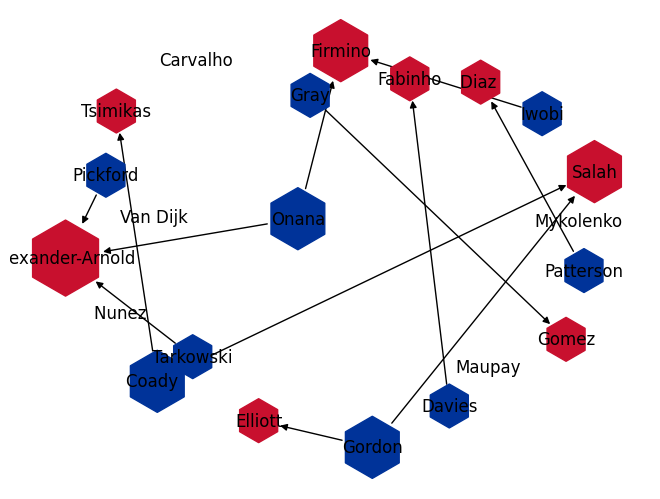

In [1941]:
# Everton Interceptions on Liverpool 50-60 mins
Interceptions(66, 78, 0, 12, '#003399','#C8102E','Liverpool players') 

No interceptions on Liverpool at 40-50 mins


Liverpool players Pickford Patterson Coady   Tarkowski Mykolenko Davies  \
80           Allison        0         0       0         0         0      0   
81          Van Dijk        0         0       0         0         0      0   
82             Gomez        0         0       0         0         0      0   
83  Alexander-Arnold        0         0       0         0         0      0   
84          Tsimikas        0         0       0         0         0      0   
85           Elliott        0         0       0         0         0      0   
86           Fabinho        0         0       0         0         0      0   
87          Carvalho        0         0       0         0         0      0   
88             Salah        0         0       0         0         0      0   
89            Nunez         0         0       0         0         0      0   
90             Diaz         0         0       0         0         0      0   
91           Firmino        0         0       0         0         0      0   

   Onana Iwobi Gray Maupay Gordon  
80     0     0    0      0      0  
81     0     0    0      0      0  
82     0     0    0      0      0  
83     0     0    0      0      0  
84     0     0    0      0      0  
85     0     0    0      0      0  
86     0     0    0      0      0  
87     0     0    0      0      0  
88     0     0    0      0      0  
89     0     0    0      0      0  
90     0     0    0      0      0  
91     0     0    0      0      0

Player:  Pickford | Degree Centrality:  0
Player:  Patterson | Degree Centrality:  0
Player:  Coady   | Degree Centrality:  0
Player:  Tarkowski | Degree Centrality:  0
Player:  Mykolenko | Degree Centrality:  0
Player:  Davies | Degree Centrality:  0
Player:  Onana | Degree Centrality:  0
Player:  Iwobi | Degree Centrality:  0
Player:  Gray | Degree Centrality:  0
Player:  Maupay | Degree Centrality:  0
Player:  Gordon | Degree Centrality:  0

Player:  Pickford | Closeness Centrality:  0.0 | Degree:  0
Player:  Patterson | Closeness Centrality:  0.0 | Degree:  0
Player:  Coady   | Closeness Centrality:  0.0 | Degree:  0
Player:  Tarkowski | Closeness Centrality:  0.0 | Degree:  0
Player:  Mykolenko | Closeness Centrality:  0.0 | Degree:  0
Player:  Davies | Closeness Centrality:  0.0 | Degree:  0
Player:  Onana | Closeness Centrality:  0.0 | Degree:  0
Player:  Iwobi | Closeness Centrality:  0.0 | Degree:  0
Player:  Gray | Closeness Centrality:  0.0 | Degree:  0
Player:  Maupay | Clo

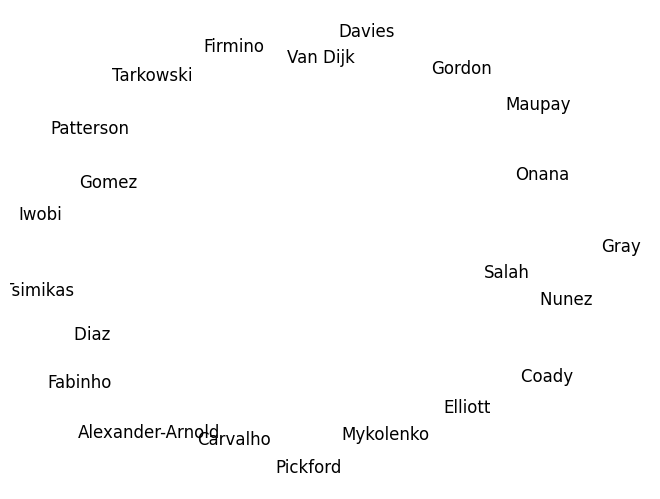

In [1942]:
# Everton Interceptions on Liverpool 60-70 mins
print("No interceptions on Liverpool at 40-50 mins")
Interceptions(80, 92, 0, 12, '#003399','#C8102E','Liverpool players') 

In [1943]:
# Everton Interceptions on Liverpool 70-80 mins
Interceptions(93, 109, 0, 13, '#003399','#C8102E','Liverpool players') 

Liverpool players  Pickford  Patterson  Coady    Tarkowski  Mykolenko  \
93   Liverpool  players  Pickford  Patterson  Coady    Tarkowski  Mykolenko   
94              Allison         0          0        0          0          0   
95             Van Dijk         0          1        0          0          0   
96                Gomez         0          0        0          0          0   
97     Alexander-Arnold         0          0        0          0          0   
98             Tsimikas         0          0        0          0          0   
99              Elliott         0          0        0          0          0   
100             Fabinho         0          0        1          0          1   
101            Carvalho         0          0        0          0          0   
102               Salah         0          0        0          0          1   
103              Nunez          0          0        0          0          0   
104               Diaz          0          0        0          0          0   
105             Firmino         1          1        0          0          0   
106          Robertson          0          0        0          0          0   
107              Milner         0          0        0          1          0   
108               Matip         0          0        0          0          0   

     Davies  Onana  Iwobi  Gray  Maupay  Gordon Unnamed: 12  
93   Davies  Onana  Iwobi  Gray  Maupay  Gordon      Gueye   
94        0      0      0     0       0       0           0  
95        0      0      0     0       0       0           1  
96        0      0      0     0       0       0           0  
97        0      0      0     0       0       0           0  
98        0      0      0     0       0       0           0  
99        0      0      0     0       0       0           0  
100       0      0      0     0       0       0           1  
101       0      0      0     0       0       0           0  
102       0      0      0     0       0       0           0  
103       0      0      0     0       0       0           0  
104       0      0      0     0       0       0           1  
105       0      0      0     0       0       0           0  
106       0      0      0     0       0       0           0  
107       0      0      1     0       0       0           0  
108       0      0      0     0       0       0           0

Player:  Unnamed: 12 | Degree Centrality:  3
Player:  Fabinho | Degree Centrality:  3
Player:  Patterson | Degree Centrality:  2
Player:  Mykolenko | Degree Centrality:  2
Player:  Van Dijk | Degree Centrality:  2
Player:  Firmino | Degree Centrality:  2
Player:  Milner | Degree Centrality:  2
Player:  Pickford | Degree Centrality:  1
Player:  Coady   | Degree Centrality:  1
Player:  Tarkowski | Degree Centrality:  1
Player:  Iwobi | Degree Centrality:  1

Player:  Fabinho | Closeness Centrality:  0.11538461538461539 | Degree:  3
Player:  Van Dijk | Closeness Centrality:  0.07692307692307693 | Degree:  2
Player:  Firmino | Closeness Centrality:  0.07692307692307693 | Degree:  2
Player:  Milner | Closeness Centrality:  0.07692307692307693 | Degree:  2
Player:  Salah | Closeness Centrality:  0.038461538461538464 | Degree:  1
Player:  Diaz  | Closeness Centrality:  0.038461538461538464 | Degree:  1
Player:  Pickford | Closeness Centrality:  0.0 | Degree:  1
Player:  Patterson | Closeness 

Liverpool players Pickford Patterson Coady   Tarkowski Mykolenko Davies  \
111           Allison        0         0       0         0         0      0   
112          Van Dijk        0         0       0         0         0      0   
113             Gomez        0         0       0         0         3      0   
114  Alexander-Arnold        0         0       0         0         0      0   
115          Tsimikas        0         0       0         0         0      0   
116           Elliott        0         0       0         0         0      0   
117           Fabinho        0         0       0         0         0      0   
118          Carvalho        0         0       0         0         0      0   
119             Salah        0         1       0         1         2      0   
120            Nunez         0         0       0         0         0      0   
121             Diaz         0         1       0         1         0      0   
122           Firmino        1         0       0         0         2      0   
123        Robertson         0         0       2         0         0      0   
124            Milner        0         0       0         0         0      0   
125             Matip        0         0       0         0         0      0   
126              Jota        0         3       0         2         0      0   

    Onana Iwobi Gray Maupay Gordon Unnamed: 12  
111     0     0    0      0      0           0  
112     0     0    0      0      0           0  
113     0     0    0      0      0           0  
114     0     0    0      0      0           0  
115     0     0    0      0      0           0  
116     0     0    0      1      0           0  
117     0     0    0      0      0           0  
118     0     0    0      0      0           0  
119     0     0    0      0      0           0  
120     0     0    0      0      0           0  
121     0     0    0      1      0           0  
122     0     0    0      0      0           0  
123     0     0    0      0      0           0  
124     1     0    1      0      0           1  
125     0     0    0      0      0           0  
126     0     0    0      0      0           0

Player:  Patterson | Degree Centrality:  3
Player:  Tarkowski | Degree Centrality:  3
Player:  Mykolenko | Degree Centrality:  3
Player:  Salah | Degree Centrality:  3
Player:  Diaz  | Degree Centrality:  3
Player:  Milner | Degree Centrality:  3
Player:  Maupay | Degree Centrality:  2
Player:  Firmino | Degree Centrality:  2
Player:  Jota | Degree Centrality:  2
Player:  Pickford | Degree Centrality:  1
Player:  Coady   | Degree Centrality:  1

Player:  Salah | Closeness Centrality:  0.11538461538461539 | Degree:  3
Player:  Diaz  | Closeness Centrality:  0.11538461538461539 | Degree:  3
Player:  Milner | Closeness Centrality:  0.11538461538461539 | Degree:  3
Player:  Firmino | Closeness Centrality:  0.07692307692307693 | Degree:  2
Player:  Jota | Closeness Centrality:  0.07692307692307693 | Degree:  2
Player:  Gomez | Closeness Centrality:  0.038461538461538464 | Degree:  1
Player:  Elliott | Closeness Centrality:  0.038461538461538464 | Degree:  1
Player:  Robertson  | Closeness C

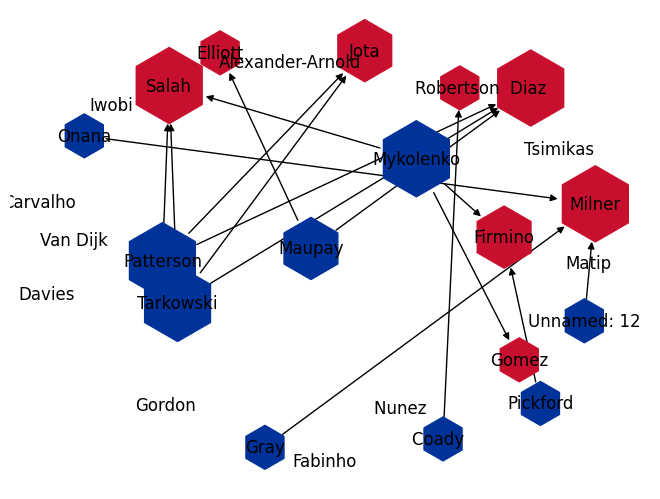

In [1944]:
# Everton Interceptions on Liverpool 80-90 mins
Interceptions(111, 127, 0, 13, '#003399','#C8102E','Liverpool players') 

# Everton Passing Analysis

The details of 0-10 mins are:
Player:  20 | Closeness Centrality:  0.5714285714285714 | Degree:  5
Player:  26 | Closeness Centrality:  0.5 | Degree:  5
Player:  11 | Closeness Centrality:  0.47058823529411764 | Degree:  5
Player:  8 | Closeness Centrality:  0.4444444444444444 | Degree:  4
Player:  17 | Closeness Centrality:  0.4444444444444444 | Degree:  4
Player:  3 | Closeness Centrality:  0.36363636363636365 | Degree:  3
Player:  10 | Closeness Centrality:  0.36363636363636365 | Degree:  4
Player:  30 | Closeness Centrality:  0.34782608695652173 | Degree:  3
Player:  2 | Closeness Centrality:  0.0 | Degree:  1

Player:  11 | Degree Centrality:  5
Player:  26 | Degree Centrality:  5
Player:  20 | Degree Centrality:  5
Player:  8 | Degree Centrality:  4
Player:  17 | Degree Centrality:  4
Player:  10 | Degree Centrality:  4
Player:  3 | Degree Centrality:  3
Player:  30 | Degree Centrality:  3
Player:  2 | Degree Centrality:  1

Player:  20 | Page Rank Centrality:  0.2135612074152235

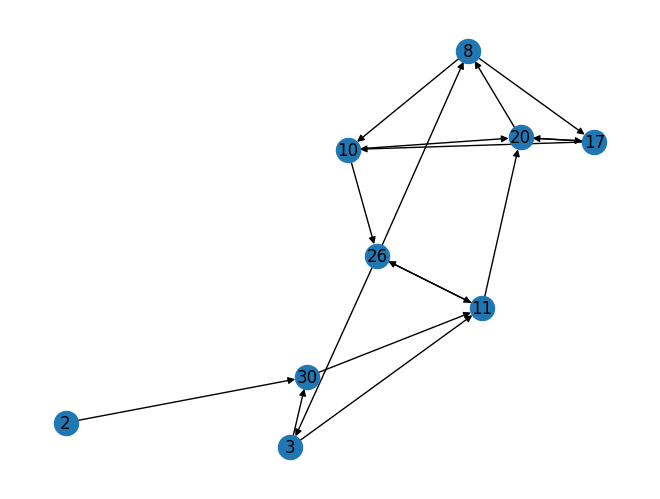

In [1945]:
# Everton 0-10 mins
print("The details of 0-10 mins are:")
details(generate_graph(8-2,19-2,23,26))
make_table(generate_graph(8-2,19-2,23,26))

The details of 10-20 mins are:
Player:  8 | Closeness Centrality:  0.625 | Degree:  10
Player:  26 | Closeness Centrality:  0.5882352941176471 | Degree:  6
Player:  17 | Closeness Centrality:  0.5882352941176471 | Degree:  8
Player:  20 | Closeness Centrality:  0.5882352941176471 | Degree:  5
Player:  10 | Closeness Centrality:  0.5882352941176471 | Degree:  6
Player:  30 | Closeness Centrality:  0.5263157894736842 | Degree:  9
Player:  3 | Closeness Centrality:  0.47619047619047616 | Degree:  5
Player:  11 | Closeness Centrality:  0.47619047619047616 | Degree:  7
Player:  19 | Closeness Centrality:  0.4166666666666667 | Degree:  5
Player:  1 | Closeness Centrality:  0.35714285714285715 | Degree:  4
Player:  2 | Closeness Centrality:  0.3225806451612903 | Degree:  5

Player:  8 | Degree Centrality:  10
Player:  30 | Degree Centrality:  9
Player:  17 | Degree Centrality:  8
Player:  11 | Degree Centrality:  7
Player:  26 | Degree Centrality:  6
Player:  10 | Degree Centrality:  6
Player

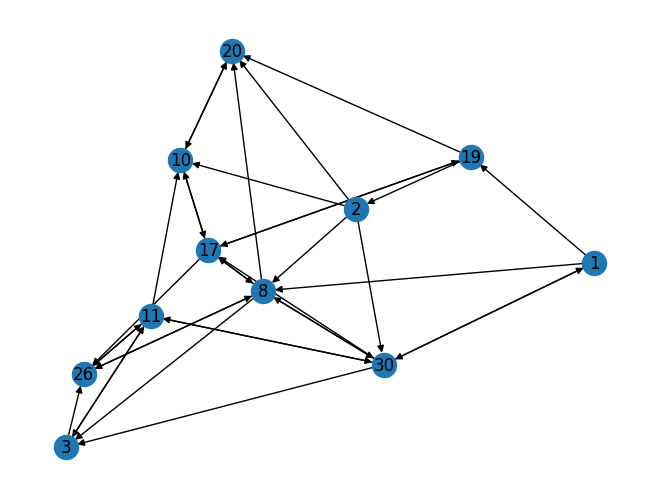

In [1946]:
# Everton 10-20 mins
print("The details of 10-20 mins are:")
details(generate_graph(23-2,34-2,23,26))

The details of 20-30 mins are:
Player:  19 | Closeness Centrality:  0.35555555555555557 | Degree:  5
Player:  10 | Closeness Centrality:  0.3375 | Degree:  2
Player:  17 | Closeness Centrality:  0.3047619047619048 | Degree:  5
Player:  11 | Closeness Centrality:  0.29090909090909095 | Degree:  3
Player:  8 | Closeness Centrality:  0.22499999999999998 | Degree:  3
Player:  2 | Closeness Centrality:  0.2 | Degree:  2
Player:  30 | Closeness Centrality:  0.1 | Degree:  2
Player:  20 | Closeness Centrality:  0.1 | Degree:  1
Player:  1 | Closeness Centrality:  0.0 | Degree:  1
Player:  3 | Closeness Centrality:  0.0 | Degree:  2
Player:  26 | Closeness Centrality:  0.0 | Degree:  2

Player:  17 | Degree Centrality:  5
Player:  19 | Degree Centrality:  5
Player:  8 | Degree Centrality:  3
Player:  11 | Degree Centrality:  3
Player:  30 | Degree Centrality:  2
Player:  3 | Degree Centrality:  2
Player:  2 | Degree Centrality:  2
Player:  10 | Degree Centrality:  2
Player:  26 | Degree Centra

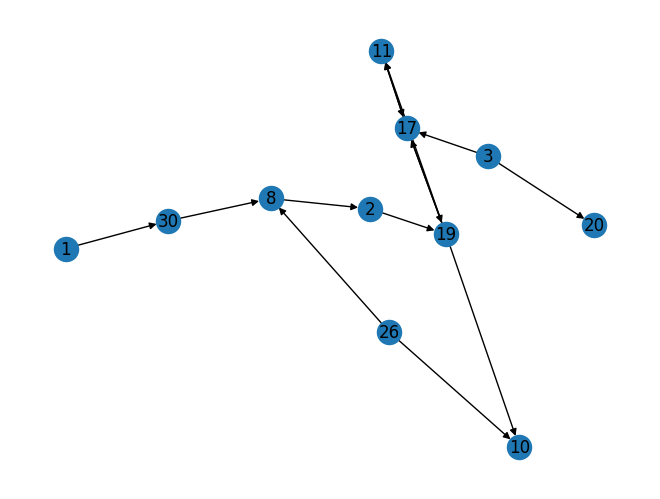

In [1947]:
# Everton 20-30 mins
print("The details of 20-30 mins are:")
details(generate_graph(38-2,49-2,23,26))

The details of 30-40 mins are:
Player:  19 | Closeness Centrality:  0.5882352941176471 | Degree:  8
Player:  26 | Closeness Centrality:  0.5 | Degree:  5
Player:  30 | Closeness Centrality:  0.45454545454545453 | Degree:  4
Player:  8 | Closeness Centrality:  0.45454545454545453 | Degree:  7
Player:  17 | Closeness Centrality:  0.45454545454545453 | Degree:  5
Player:  2 | Closeness Centrality:  0.43478260869565216 | Degree:  4
Player:  3 | Closeness Centrality:  0.4 | Degree:  5
Player:  10 | Closeness Centrality:  0.4 | Degree:  3
Player:  11 | Closeness Centrality:  0.35714285714285715 | Degree:  2
Player:  1 | Closeness Centrality:  0.3333333333333333 | Degree:  3
Player:  20 | Closeness Centrality:  0.3225806451612903 | Degree:  2

Player:  19 | Degree Centrality:  8
Player:  8 | Degree Centrality:  7
Player:  3 | Degree Centrality:  5
Player:  26 | Degree Centrality:  5
Player:  17 | Degree Centrality:  5
Player:  30 | Degree Centrality:  4
Player:  2 | Degree Centrality:  4
Play

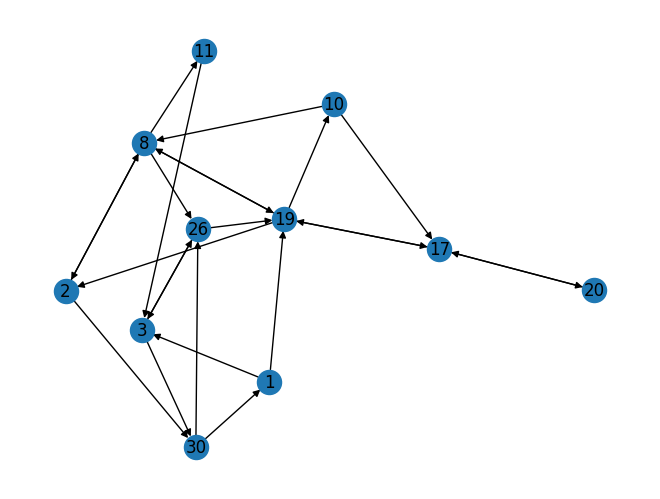

In [1948]:
# Everton 30-40 mins
print("The details of 30-40 mins are:")
details(generate_graph(53-2,64-2,23,26))

The details of 40-50 mins are:
Player:  30 | Closeness Centrality:  0.6666666666666666 | Degree:  9
Player:  26 | Closeness Centrality:  0.5882352941176471 | Degree:  7
Player:  2 | Closeness Centrality:  0.5555555555555556 | Degree:  6
Player:  10 | Closeness Centrality:  0.5555555555555556 | Degree:  6
Player:  8 | Closeness Centrality:  0.5263157894736842 | Degree:  5
Player:  3 | Closeness Centrality:  0.47619047619047616 | Degree:  5
Player:  19 | Closeness Centrality:  0.43478260869565216 | Degree:  6
Player:  11 | Closeness Centrality:  0.43478260869565216 | Degree:  7
Player:  1 | Closeness Centrality:  0.4166666666666667 | Degree:  3
Player:  17 | Closeness Centrality:  0.38461538461538464 | Degree:  6
Player:  20 | Closeness Centrality:  0.29411764705882354 | Degree:  2

Player:  30 | Degree Centrality:  9
Player:  26 | Degree Centrality:  7
Player:  11 | Degree Centrality:  7
Player:  2 | Degree Centrality:  6
Player:  19 | Degree Centrality:  6
Player:  10 | Degree Centrali

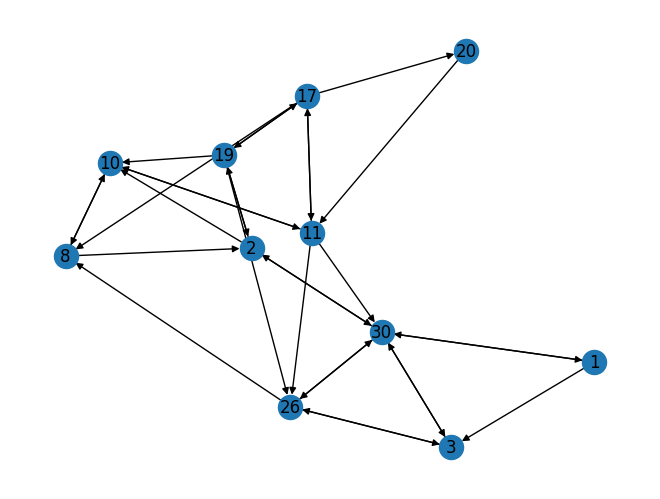

In [1949]:
# Everton 40-50 mins
print("The details of 40-50 mins are:")
details(generate_graph(68-2,79-2,23,26))

The details of 50-60 mins are:
Player:  10 | Closeness Centrality:  0.5444444444444444 | Degree:  9
Player:  19 | Closeness Centrality:  0.37692307692307686 | Degree:  4
Player:  17 | Closeness Centrality:  0.37692307692307686 | Degree:  5
Player:  20 | Closeness Centrality:  0.35 | Degree:  2
Player:  26 | Closeness Centrality:  0.32666666666666666 | Degree:  3
Player:  11 | Closeness Centrality:  0.32666666666666666 | Degree:  2
Player:  8 | Closeness Centrality:  0.3047619047619048 | Degree:  1
Player:  2 | Closeness Centrality:  0.28823529411764703 | Degree:  4
Player:  30 | Closeness Centrality:  0.256 | Degree:  2
Player:  3 | Closeness Centrality:  0.23823529411764707 | Degree:  1
Player:  1 | Closeness Centrality:  0.21304347826086956 | Degree:  5

Player:  10 | Degree Centrality:  9
Player:  1 | Degree Centrality:  5
Player:  17 | Degree Centrality:  5
Player:  2 | Degree Centrality:  4
Player:  19 | Degree Centrality:  4
Player:  26 | Degree Centrality:  3
Player:  30 | Degre

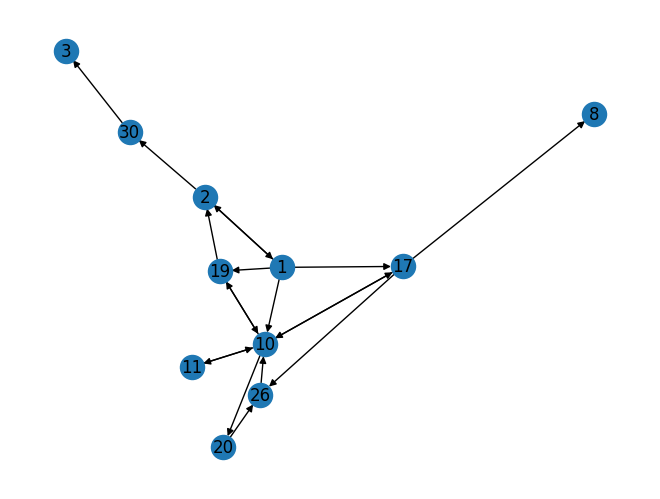

In [1950]:
# Everton 50-60 mins
print("The details of 50-60 mins are:")
details(generate_graph(84-2,95-2,23,26))

The details of 60-70 mins are:
Player:  3 | Closeness Centrality:  0.43478260869565216 | Degree:  2
Player:  10 | Closeness Centrality:  0.4083333333333333 | Degree:  5
Player:  20 | Closeness Centrality:  0.37692307692307686 | Degree:  4
Player:  30 | Closeness Centrality:  0.3681818181818182 | Degree:  4
Player:  11 | Closeness Centrality:  0.35714285714285715 | Degree:  5
Player:  17 | Closeness Centrality:  0.2777777777777778 | Degree:  4
Player:  1 | Closeness Centrality:  0.27 | Degree:  2
Player:  8 | Closeness Centrality:  0.25 | Degree:  3
Player:  2 | Closeness Centrality:  0.22727272727272727 | Degree:  3
Player:  19 | Closeness Centrality:  0.1 | Degree:  4
Player:  27 | Closeness Centrality:  0.0 | Degree:  2

Player:  10 | Degree Centrality:  5
Player:  11 | Degree Centrality:  5
Player:  30 | Degree Centrality:  4
Player:  19 | Degree Centrality:  4
Player:  17 | Degree Centrality:  4
Player:  20 | Degree Centrality:  4
Player:  2 | Degree Centrality:  3
Player:  8 | Deg

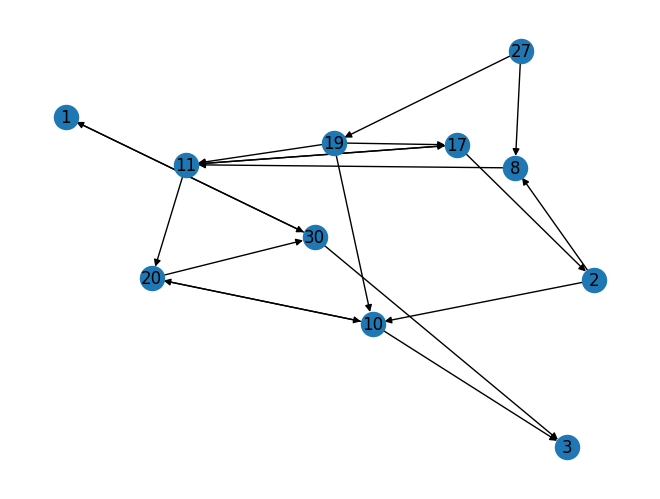

In [1951]:
# Everton 60-70 mins
print("The details of 60-70 mins are:")
details(generate_graph(101-2,113-2,23,26))

The details of 70-80 mins are:
Player:  3 | Closeness Centrality:  0.6666666666666666 | Degree:  7
Player:  11 | Closeness Centrality:  0.6153846153846154 | Degree:  5
Player:  2 | Closeness Centrality:  0.5333333333333333 | Degree:  4
Player:  8 | Closeness Centrality:  0.47058823529411764 | Degree:  3
Player:  30 | Closeness Centrality:  0.36363636363636365 | Degree:  4
Player:  17 | Closeness Centrality:  0.36363636363636365 | Degree:  6
Player:  10 | Closeness Centrality:  0.32 | Degree:  2
Player:  19 | Closeness Centrality:  0.0 | Degree:  2
Player:  27 | Closeness Centrality:  0.0 | Degree:  3

Player:  3 | Degree Centrality:  7
Player:  17 | Degree Centrality:  6
Player:  11 | Degree Centrality:  5
Player:  2 | Degree Centrality:  4
Player:  30 | Degree Centrality:  4
Player:  8 | Degree Centrality:  3
Player:  27 | Degree Centrality:  3
Player:  19 | Degree Centrality:  2
Player:  10 | Degree Centrality:  2

Player:  3 | Page Rank Centrality:  0.2729137903175645 | Degree:  7
P

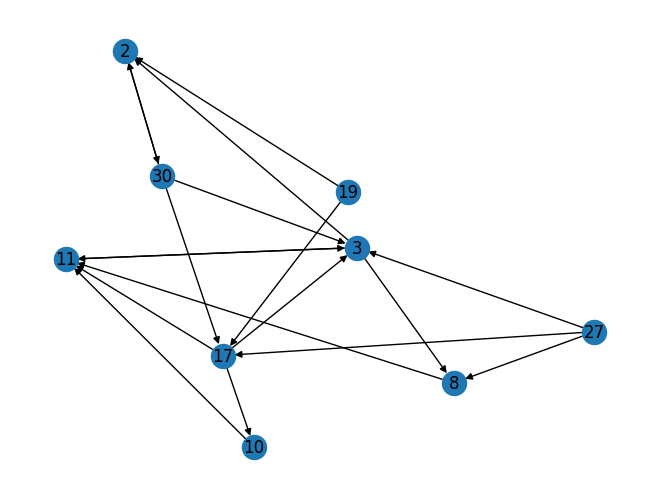

In [1952]:
# Everton 70-80 mins
print("The details of 70-80 mins are:")
details(generate_graph(119-2,131-2,23,26))

The details of 80-90 mins + Extra Time are:
Player:  3 | Closeness Centrality:  0.6666666666666666 | Degree:  7
Player:  11 | Closeness Centrality:  0.6153846153846154 | Degree:  5
Player:  2 | Closeness Centrality:  0.5333333333333333 | Degree:  4
Player:  8 | Closeness Centrality:  0.47058823529411764 | Degree:  3
Player:  30 | Closeness Centrality:  0.36363636363636365 | Degree:  4
Player:  17 | Closeness Centrality:  0.36363636363636365 | Degree:  6
Player:  10 | Closeness Centrality:  0.32 | Degree:  2
Player:  19 | Closeness Centrality:  0.0 | Degree:  2
Player:  27 | Closeness Centrality:  0.0 | Degree:  3

Player:  3 | Degree Centrality:  7
Player:  17 | Degree Centrality:  6
Player:  11 | Degree Centrality:  5
Player:  2 | Degree Centrality:  4
Player:  30 | Degree Centrality:  4
Player:  8 | Degree Centrality:  3
Player:  27 | Degree Centrality:  3
Player:  19 | Degree Centrality:  2
Player:  10 | Degree Centrality:  2

Player:  3 | Page Rank Centrality:  0.2729137903175645 |

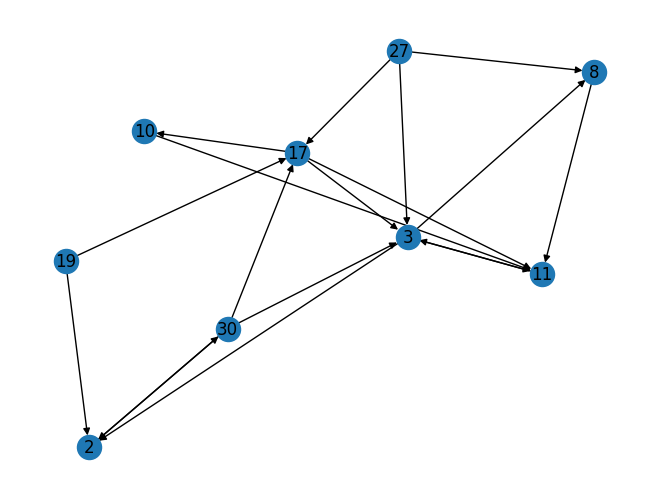

In [1953]:
# Everton 80-90 mins + Extra Time
print("The details of 80-90 mins + Extra Time are:")
details(generate_graph(119-2,131-2,23,26))

# Everton Interception Analysis

In [1954]:
# Liverpool Interceptions on Everton 0-10 mins
Interceptions(0, 11, 15, 27, '#C8102E','#003399','Everton players') 

Everton players Allison Van Dijk Gomez Alexander-Arnold Tsimiskas  Elliot  \
0         Pickford       0        0     0                0          0      0   
1        Patterson       0        0     1                0          0      0   
2           Coady        0        0     0                0          0      0   
3        Tarkowski       0        0     0                0          0      0   
4        Mykolenko       0        0     0                0          0      0   
5          Davies        0        0     1                0          0      0   
6            Onana       1        0     0                0          0      0   
7            Iwobi       0        0     0                0          0      0   
8             Gray       0        0     0                1          0      0   
9           Maupay       0        0     0                0          0      0   
10         Gordon        0        0     0                0          0      0   

   Fabinho Carvalho Salah Nunez Diaz  
0        0        0     0     0    0  
1        0        0     0     0    0  
2        0        0     0     0    0  
3        0        0     0     0    0  
4        0        0     0     0    0  
5        0        0     0     0    0  
6        0        0     0     0    0  
7        1        0     0     0    0  
8        0        1     0     0    0  
9        0        0     0     0    0  
10       0        0     0     0    0

Player:  Gomez | Degree Centrality:  2
Player:  Gray | Degree Centrality:  2
Player:  Allison | Degree Centrality:  1
Player:  Alexander-Arnold | Degree Centrality:  1
Player:  Fabinho | Degree Centrality:  1
Player:  Carvalho | Degree Centrality:  1
Player:  Patterson | Degree Centrality:  1
Player:  Davies  | Degree Centrality:  1
Player:  Onana | Degree Centrality:  1
Player:  Iwobi | Degree Centrality:  1
Player:  Van Dijk | Degree Centrality:  0

Player:  Gray | Closeness Centrality:  0.1 | Degree:  2
Player:  Patterson | Closeness Centrality:  0.05 | Degree:  1
Player:  Davies  | Closeness Centrality:  0.05 | Degree:  1
Player:  Onana | Closeness Centrality:  0.05 | Degree:  1
Player:  Iwobi | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison | Closeness Centrality:  0.0 | Degree:  1
Player:  Van Dijk | Closeness Centrality:  0.0 | Degree:  0
Player:  Gomez | Closeness Centrality:  0.0 | Degree:  2
Player:  Alexander-Arnold | Closeness Centrality:  0.0 | Degree:  1
Player

Everton players Allison Van Dijk Gomez Alexander-Arnold Tsimiskas  Elliot  \
13        Pickford       0        0     1                0          0      0   
14       Patterson       0        0     0                0          1      0   
15          Coady        0        0     1                0          0      0   
16       Tarkowski       0        0     0                0          0      0   
17       Mykolenko       0        0     0                0          0      0   
18         Davies        0        0     0                0          0      0   
19           Onana       0        0     0                0          0      0   
20           Iwobi       0        0     0                0          0      0   
21            Gray       0        0     0                0          0      0   
22          Maupay       0        0     0                0          0      0   
23         Gordon        0        0     0                0          0      1   

   Fabinho Carvalho Salah Nunez Diaz  
13       0        0     0     0    0  
14       0        0     0     0    0  
15       0        0     0     0    0  
16       0        0     0     0    0  
17       0        0     0     0    0  
18       0        0     0     0    0  
19       0        0     0     0    0  
20       0        0     0     0    0  
21       1        0     0     0    0  
22       1        1     0     0    0  
23       0        0     0     0    0

Player:  Fabinho | Degree Centrality:  2
Player:  Maupay | Degree Centrality:  2
Player:  Gomez | Degree Centrality:  1
Player:  Tsimiskas  | Degree Centrality:  1
Player:  Elliot | Degree Centrality:  1
Player:  Carvalho | Degree Centrality:  1
Player:  Patterson | Degree Centrality:  1
Player:  Coady  | Degree Centrality:  1
Player:  Gray | Degree Centrality:  1
Player:  Gordon  | Degree Centrality:  1
Player:  Allison | Degree Centrality:  0

Player:  Maupay | Closeness Centrality:  0.1 | Degree:  2
Player:  Patterson | Closeness Centrality:  0.05 | Degree:  1
Player:  Coady  | Closeness Centrality:  0.05 | Degree:  1
Player:  Gray | Closeness Centrality:  0.05 | Degree:  1
Player:  Gordon  | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison | Closeness Centrality:  0.0 | Degree:  0
Player:  Van Dijk | Closeness Centrality:  0.0 | Degree:  0
Player:  Gomez | Closeness Centrality:  0.0 | Degree:  1
Player:  Alexander-Arnold | Closeness Centrality:  0.0 | Degree:  0
Player:  T

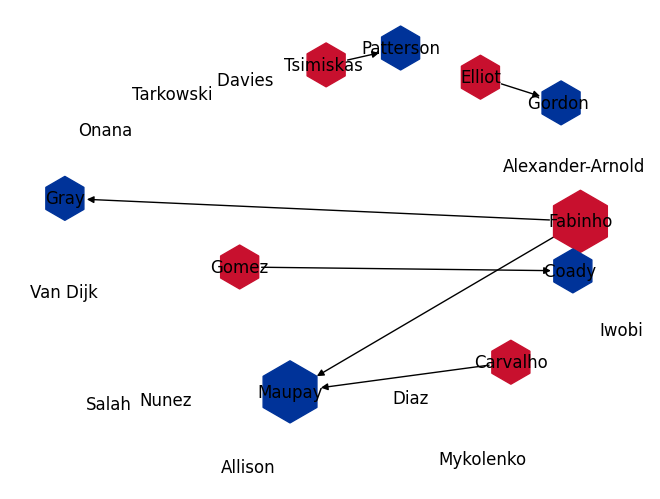

In [1955]:
# Liverpool Interceptions on Everton 10-20 mins
Interceptions(13, 24, 15, 27, '#C8102E','#003399','Everton players') 

In [1956]:
# Liverpool Interceptions on Everton 20-30 mins
Interceptions(26, 37, 15, 27, '#C8102E','#003399','Everton players') 

Everton players Allison Van Dijk Gomez Alexander-Arnold Tsimiskas  Elliot  \
26        Pickford       0        0     0                0          0      0   
27       Patterson       0        0     0                0          1      0   
28          Coady        0        1     0                0          1      0   
29       Tarkowski       0        1     0                0          0      0   
30       Mykolenko       0        0     0                0          0      0   
31         Davies        0        0     0                0          0      0   
32           Onana       0        0     0                0          0      0   
33           Iwobi       0        0     0                0          0      0   
34            Gray       0        0     0                0          0      0   
35          Maupay       0        0     0                0          0      0   
36         Gordon        0        0     0                0          0      0   

   Fabinho Carvalho Salah Nunez Diaz  
26       0        0     0     0    0  
27       0        1     0     0    0  
28       0        0     0     0    0  
29       0        0     0     0    0  
30       1        0     0     0    0  
31       0        0     0     0    0  
32       0        0     0     0    0  
33       0        0     0     0    0  
34       0        0     0     0    1  
35       0        0     0     0    0  
36       0        0     0     0    0

Player:  Van Dijk | Degree Centrality:  2
Player:  Tsimiskas  | Degree Centrality:  2
Player:  Patterson | Degree Centrality:  2
Player:  Coady  | Degree Centrality:  2
Player:  Fabinho | Degree Centrality:  1
Player:  Carvalho | Degree Centrality:  1
Player:  Diaz | Degree Centrality:  1
Player:  Tarkowski | Degree Centrality:  1
Player:  Mykolenko | Degree Centrality:  1
Player:  Gray | Degree Centrality:  1
Player:  Allison | Degree Centrality:  0

Player:  Patterson | Closeness Centrality:  0.1 | Degree:  2
Player:  Coady  | Closeness Centrality:  0.1 | Degree:  2
Player:  Tarkowski | Closeness Centrality:  0.05 | Degree:  1
Player:  Mykolenko | Closeness Centrality:  0.05 | Degree:  1
Player:  Gray | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison | Closeness Centrality:  0.0 | Degree:  0
Player:  Van Dijk | Closeness Centrality:  0.0 | Degree:  2
Player:  Gomez | Closeness Centrality:  0.0 | Degree:  0
Player:  Alexander-Arnold | Closeness Centrality:  0.0 | Degree:  0


In [1957]:
# Liverpool Interceptions on Everton 30-40 mins
Interceptions(39, 50, 15, 27, '#C8102E','#003399','Everton players') 

Everton players Allison Van Dijk Gomez Alexander-Arnold Tsimiskas  Elliot  \
39        Pickford       0        0     0                0          0      0   
40       Patterson       0        0     1                0          0      0   
41          Coady        0        0     0                0          0      0   
42       Tarkowski       0        0     0                0          0      0   
43       Mykolenko       0        0     2                0          0      0   
44         Davies        0        0     2                0          0      0   
45           Onana       0        0     0                0          0      0   
46           Iwobi       0        0     1                0          0      0   
47            Gray       0        0     0                0          1      0   
48          Maupay       0        0     0                0          0      0   
49         Gordon        0        0     0                0          0      0   

   Fabinho Carvalho Salah Nunez Diaz  
39       0        0     0     0    0  
40       1        0     0     0    0  
41       0        0     0     0    0  
42       0        0     0     0    0  
43       0        0     0     0    0  
44       0        0     0     0    0  
45       0        0     0     0    0  
46       0        0     0     0    0  
47       0        0     0     0    0  
48       0        0     0     0    0  
49       0        0     0     0    0

Player:  Gomez | Degree Centrality:  4
Player:  Patterson | Degree Centrality:  2
Player:  Tsimiskas  | Degree Centrality:  1
Player:  Fabinho | Degree Centrality:  1
Player:  Mykolenko | Degree Centrality:  1
Player:  Davies  | Degree Centrality:  1
Player:  Iwobi | Degree Centrality:  1
Player:  Gray | Degree Centrality:  1
Player:  Allison | Degree Centrality:  0
Player:  Van Dijk | Degree Centrality:  0
Player:  Alexander-Arnold | Degree Centrality:  0

Player:  Patterson | Closeness Centrality:  0.1 | Degree:  2
Player:  Mykolenko | Closeness Centrality:  0.05 | Degree:  1
Player:  Davies  | Closeness Centrality:  0.05 | Degree:  1
Player:  Iwobi | Closeness Centrality:  0.05 | Degree:  1
Player:  Gray | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison | Closeness Centrality:  0.0 | Degree:  0
Player:  Van Dijk | Closeness Centrality:  0.0 | Degree:  0
Player:  Gomez | Closeness Centrality:  0.0 | Degree:  4
Player:  Alexander-Arnold | Closeness Centrality:  0.0 | Degree:

In [1958]:
# Liverpool Interceptions on Everton 40-50 mins
Interceptions(51, 63, 15, 28, '#C8102E','#003399','Everton players') 

Everton players  Allison  Van Dijk  Gomez  Alexander-Arnold  Tsimiskas   \
51  Everton  players  Allison  Van Dijk  Gomez  Alexander-Arnold  Tsimiskas    
52          Pickford        0         0      2                 0           0   
53         Patterson        0         0      0                 0           0   
54            Coady         0         1      0                 0           0   
55         Tarkowski        0         1      0                 0           0   
56         Mykolenko        0         0      1                 0           0   
57           Davies         0         0      1                 1           1   
58             Onana        0         1      0                 0           0   
59             Iwobi        0         0      0                 0           0   
60              Gray        0         0      0                 0           1   
61            Maupay        1         0      0                 0           0   
62           Gordon         0         0      3                 0           0   

    Elliot  Fabinho  Carvalho  Salah  Nunez  Diaz Unnamed: 27  
51  Elliot  Fabinho  Carvalho  Salah  Nunez  Diaz     Firmino  
52       0        0         0      0      0     0           0  
53       0        0         0      0      0     0           0  
54       0        0         0      0      0     0           0  
55       0        0         0      0      0     0           0  
56       1        0         0      0      0     0           0  
57       0        2         0      0      0     0           0  
58       0        0         0      0      1     0           0  
59       0        0         0      0      0     0           0  
60       0        0         0      0      0     0           0  
61       0        0         0      0      0     0           0  
62       0        0         0      0      0     0           0

Player:  Gomez | Degree Centrality:  4
Player:  Davies  | Degree Centrality:  4
Player:  Van Dijk | Degree Centrality:  3
Player:  Tsimiskas  | Degree Centrality:  2
Player:  Mykolenko | Degree Centrality:  2
Player:  Onana | Degree Centrality:  2
Player:  Allison | Degree Centrality:  1
Player:  Alexander-Arnold | Degree Centrality:  1
Player:  Elliot | Degree Centrality:  1
Player:  Fabinho | Degree Centrality:  1
Player:  Nunez | Degree Centrality:  1

Player:  Davies  | Closeness Centrality:  0.18181818181818182 | Degree:  4
Player:  Mykolenko | Closeness Centrality:  0.09090909090909091 | Degree:  2
Player:  Onana | Closeness Centrality:  0.09090909090909091 | Degree:  2
Player:  Pickford | Closeness Centrality:  0.045454545454545456 | Degree:  1
Player:  Coady  | Closeness Centrality:  0.045454545454545456 | Degree:  1
Player:  Tarkowski | Closeness Centrality:  0.045454545454545456 | Degree:  1
Player:  Gray | Closeness Centrality:  0.045454545454545456 | Degree:  1
Player:  Mau

In [1959]:
# Liverpool Interceptions on Everton 50-60 mins
Interceptions(65, 77, 15, 29, '#C8102E','#003399','Everton players') 

Everton players  Allison  Van Dijk  Gomez  Alexander-Arnold  Tsimiskas   \
65  Everton  players  Allison  Van Dijk  Gomez  Alexander-Arnold  Tsimiskas    
66          Pickford        0         0      1                 0           0   
67         Patterson        0         0      0                 1           0   
68            Coady         0         0      0                 0           0   
69         Tarkowski        0         0      0                 0           0   
70         Mykolenko        0         0      1                 0           0   
71           Davies         0         0      1                 0           0   
72             Onana        0         0      0                 0           0   
73             Iwobi        0         0      0                 0           0   
74              Gray        0         0      1                 0           1   
75            Maupay        0         0      0                 0           0   
76           Gordon         0         0      0                 0           0   

    Elliot  Fabinho  Carvalho  Salah  Nunez  Diaz Unnamed: 27 Unnamed: 28  
65  Elliot  Fabinho  Carvalho  Salah  Nunez  Diaz     Firmino      Milner  
66       0        0         0      0      0     0           0           0  
67       0        0         0      0      0     0           0           0  
68       0        0         0      0      0     0           0           0  
69       0        0         0      0      0     0           0           0  
70       0        0         0      0      0     0           0           1  
71       0        0         0      0      0     0           1           0  
72       0        1         0      0      0     0           0           0  
73       0        0         0      0      0     0           1           0  
74       0        0         0      0      0     0           0           0  
75       0        0         0      0      0     0           0           0  
76       0        0         0      0      0     0           0           0

Player:  Gomez | Degree Centrality:  4
Player:  Unnamed: 27 | Degree Centrality:  2
Player:  Mykolenko | Degree Centrality:  2
Player:  Davies  | Degree Centrality:  2
Player:  Gray | Degree Centrality:  2
Player:  Alexander-Arnold | Degree Centrality:  1
Player:  Tsimiskas  | Degree Centrality:  1
Player:  Fabinho | Degree Centrality:  1
Player:  Unnamed: 28 | Degree Centrality:  1
Player:  Pickford | Degree Centrality:  1
Player:  Patterson | Degree Centrality:  1

Player:  Mykolenko | Closeness Centrality:  0.08695652173913043 | Degree:  2
Player:  Davies  | Closeness Centrality:  0.08695652173913043 | Degree:  2
Player:  Gray | Closeness Centrality:  0.08695652173913043 | Degree:  2
Player:  Pickford | Closeness Centrality:  0.043478260869565216 | Degree:  1
Player:  Patterson | Closeness Centrality:  0.043478260869565216 | Degree:  1
Player:  Onana | Closeness Centrality:  0.043478260869565216 | Degree:  1
Player:  Iwobi | Closeness Centrality:  0.043478260869565216 | Degree:  1
P

In [1960]:
# Liverpool Interceptions on Everton 60-70 mins
Interceptions(79, 91, 15, 30, '#C8102E','#003399','Everton players') 

Everton players  Allison  Van Dijk  Gomez  Alexander-Arnold  Tsimiskas   \
79  Everton  players  Allison  Van Dijk  Gomez  Alexander-Arnold  Tsimiskas    
80          Pickford        0         0      0                 0           0   
81         Patterson        0         1      0                 0           0   
82            Coady         0         0      0                 0           0   
83         Tarkowski        0         1      0                 0           0   
84         Mykolenko        0         0      0                 0           0   
85           Davies         0         0      0                 0           0   
86             Onana        1         0      0                 0           0   
87             Iwobi        0         0      0                 0           0   
88              Gray        1         1      0                 0           0   
89            Maupay        0         0      0                 0           0   
90           Gordon         1         1      1                 0           0   

    Elliot  Fabinho  Carvalho  Salah  Nunez  Diaz Unnamed: 27 Unnamed: 28  \
79  Elliot  Fabinho  Carvalho  Salah  Nunez  Diaz     Firmino      Milner   
80       0        0         0      0      0     0           0           0   
81       0        0         0      0      0     0           0           0   
82       0        0         0      0      0     0           0           0   
83       0        0         0      0      0     0           0           0   
84       0        0         0      0      0     0           0           2   
85       0        0         0      0      0     0           0           0   
86       0        0         0      0      0     0           0           0   
87       0        0         0      1      0     0           0           0   
88       0        1         0      0      0     0           0           0   
89       0        0         0      0      0     0           0           0   
90       0        0         0      0      0     0           0           0   

   Unnamed: 29  
79   Roberson   
80           1  
81           0  
82           0  
83           0  
84           0  
85           0  
86           0  
87           0  
88           0  
89           0  
90           0

Player:  Van Dijk | Degree Centrality:  4
Player:  Allison | Degree Centrality:  3
Player:  Gray | Degree Centrality:  3
Player:  Gordon  | Degree Centrality:  3
Player:  Gomez | Degree Centrality:  1
Player:  Fabinho | Degree Centrality:  1
Player:  Salah | Degree Centrality:  1
Player:  Unnamed: 28 | Degree Centrality:  1
Player:  Unnamed: 29 | Degree Centrality:  1
Player:  Pickford | Degree Centrality:  1
Player:  Patterson | Degree Centrality:  1

Player:  Gray | Closeness Centrality:  0.125 | Degree:  3
Player:  Gordon  | Closeness Centrality:  0.125 | Degree:  3
Player:  Pickford | Closeness Centrality:  0.041666666666666664 | Degree:  1
Player:  Patterson | Closeness Centrality:  0.041666666666666664 | Degree:  1
Player:  Tarkowski | Closeness Centrality:  0.041666666666666664 | Degree:  1
Player:  Mykolenko | Closeness Centrality:  0.041666666666666664 | Degree:  1
Player:  Onana | Closeness Centrality:  0.041666666666666664 | Degree:  1
Player:  Iwobi | Closeness Centrality: 

In [1961]:
# Liverpool Interceptions on Everton 70-80 mins
Interceptions(93, 106, 15, 32, '#C8102E','#003399','Everton players') 

Everton players  Allison  Van Dijk  Gomez  Alexander-Arnold  Tsimiskas   \
93   Everton  players  Allison  Van Dijk  Gomez  Alexander-Arnold  Tsimiskas    
94           Pickford        0         0      0                 0           0   
95          Patterson        0         1      0                 0           0   
96             Coady         0         0      0                 0           0   
97          Tarkowski        0         0      0                 0           0   
98          Mykolenko        0         0      0                 0           0   
99            Davies         0         0      0                 0           0   
100             Onana        0         0      0                 0           0   
101             Iwobi        0         0      1                 0           0   
102              Gray        0         0      0                 0           0   
103            Maupay        0         1      0                 0           0   
104           Gordon         0         0      0                 0           0   
105            Gueye         0         0      1                 0           0   

     Elliot  Fabinho  Carvalho  Salah  Nunez  Diaz Unnamed: 27 Unnamed: 28  \
93   Elliot  Fabinho  Carvalho  Salah  Nunez  Diaz     Firmino      Milner   
94        0        0         0      0      0     0           0           0   
95        0        0         0      1      0     0           0           0   
96        0        0         0      0      0     0           0           0   
97        0        0         0      0      0     0           0           0   
98        0        0         0      0      0     0           0           0   
99        0        0         0      0      0     0           0           0   
100       0        0         0      0      0     0           0           0   
101       0        0         0      0      0     0           1           1   
102       0        3         0      0      0     0           0           0   
103       0        0         0      0      0     0           0           0   
104       0        0         0      0      0     0           0           0   
105       0        0         0      0      0     0           0           0   

    Unnamed: 29 Unnamed: 30 Unnamed: 31  
93    Roberson        Matip      Jota    
94            0           0           0  
95            0           0           0  
96            0           0           0  
97            0           0           0  
98            0           0           0  
99            0           0           0  
100           0           0           0  
101           0           0           0  
102           0           0           0  
103           0           0           0  
104           0           0           0  
105           0           0           0

Player:  Iwobi | Degree Centrality:  3
Player:  Van Dijk | Degree Centrality:  2
Player:  Gomez | Degree Centrality:  2
Player:  Patterson | Degree Centrality:  2
Player:  Fabinho | Degree Centrality:  1
Player:  Salah | Degree Centrality:  1
Player:  Unnamed: 27 | Degree Centrality:  1
Player:  Unnamed: 28 | Degree Centrality:  1
Player:  Gray | Degree Centrality:  1
Player:  Maupay | Degree Centrality:  1
Player:  Gueye  | Degree Centrality:  1

Player:  Iwobi | Closeness Centrality:  0.1111111111111111 | Degree:  3
Player:  Patterson | Closeness Centrality:  0.07407407407407407 | Degree:  2
Player:  Gray | Closeness Centrality:  0.037037037037037035 | Degree:  1
Player:  Maupay | Closeness Centrality:  0.037037037037037035 | Degree:  1
Player:  Gueye  | Closeness Centrality:  0.037037037037037035 | Degree:  1
Player:  Allison | Closeness Centrality:  0.0 | Degree:  0
Player:  Van Dijk | Closeness Centrality:  0.0 | Degree:  2
Player:  Gomez | Closeness Centrality:  0.0 | Degree:  2


Everton players  Allison  Van Dijk  Gomez  Alexander-Arnold  Tsimiskas   \
110  Everton  players  Allison  Van Dijk  Gomez  Alexander-Arnold  Tsimiskas    
111          Pickford        0         0      2                 0           0   
112         Patterson        0         2      0                 0           0   
113            Coady         0         0      0                 0           0   
114         Tarkowski        0         0      0                 0           0   
115         Mykolenko        0         0      0                 0           0   
116           Davies         0         0      0                 0           0   
117             Onana        1         0      0                 0           0   
118             Iwobi        0         0      0                 0           0   
119              Gray        2         0      0                 0           0   
120            Maupay        0         0      0                 0           0   
121           Gordon         0         0      0                 0           0   
122            Gueye         0         0      0                 0           0   

     Elliot  Fabinho  Carvalho  Salah  Nunez  Diaz Unnamed: 27 Unnamed: 28  \
110  Elliot  Fabinho  Carvalho  Salah  Nunez  Diaz     Firmino      Milner   
111       0        0         0      0      0     0           0           0   
112       0        0         0      0      0     0           0           1   
113       0        0         0      0      0     0           0           0   
114       1        0         0      0      0     0           0           0   
115       0        1         0      0      0     1           0           1   
116       0        0         0      0      0     0           0           0   
117       0        0         0      0      0     1           0           0   
118       0        0         0      0      0     0           0           0   
119       0        0         0      0      0     0           0           0   
120       0        0         0      0      0     0           0           0   
121       0        0         0      0      0     0           0           0   
122       0        1         0      0      0     0           0           0   

    Unnamed: 29 Unnamed: 30 Unnamed: 31  
110   Roberson        Matip      Jota    
111           0           1           0  
112           0           0           1  
113           0           0           1  
114           0           0           0  
115           0           1           0  
116           0           0           0  
117           0           0           0  
118           0           0           0  
119           0           0           0  
120           1           0           0  
121           0           0           0  
122           0           0           0

Player:  Mykolenko | Degree Centrality:  4
Player:  Patterson | Degree Centrality:  3
Player:  Allison | Degree Centrality:  2
Player:  Fabinho | Degree Centrality:  2
Player:  Diaz | Degree Centrality:  2
Player:  Unnamed: 28 | Degree Centrality:  2
Player:  Unnamed: 30 | Degree Centrality:  2
Player:  Unnamed: 31 | Degree Centrality:  2
Player:  Pickford | Degree Centrality:  2
Player:  Onana | Degree Centrality:  2
Player:  Van Dijk | Degree Centrality:  1

Player:  Mykolenko | Closeness Centrality:  0.14814814814814814 | Degree:  4
Player:  Patterson | Closeness Centrality:  0.1111111111111111 | Degree:  3
Player:  Pickford | Closeness Centrality:  0.07407407407407407 | Degree:  2
Player:  Onana | Closeness Centrality:  0.07407407407407407 | Degree:  2
Player:  Coady  | Closeness Centrality:  0.037037037037037035 | Degree:  1
Player:  Tarkowski | Closeness Centrality:  0.037037037037037035 | Degree:  1
Player:  Gray | Closeness Centrality:  0.037037037037037035 | Degree:  1
Player:

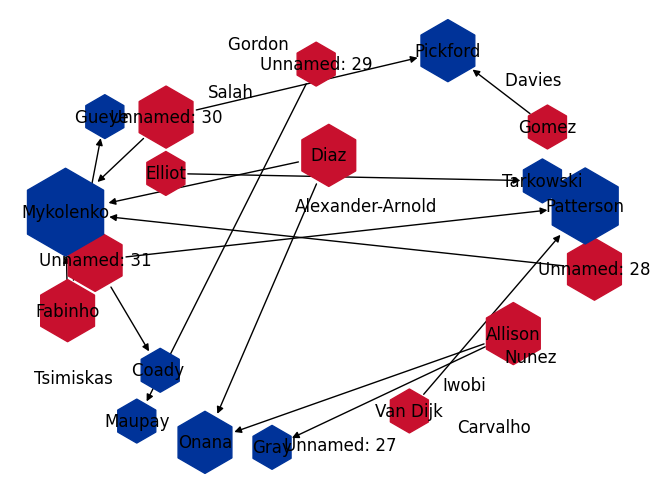

In [1962]:
# Liverpool Interceptions on Everton 80-90 mins
Interceptions(110, 123, 15, 32, '#C8102E','#003399','Everton players') 

# Match 3: Liverpool vs Tottenham

In [1963]:
arr=pd.read_excel("LIVMatches.xlsx", sheet_name='LIV vs TOT').to_numpy()

# Liverpool Passing Analysis

The details of 0-10 mins are:
Player:  4 | Closeness Centrality:  0.7692307692307693 | Degree:  12
Player:  5 | Closeness Centrality:  0.7692307692307693 | Degree:  14
Player:  26 | Closeness Centrality:  0.7142857142857143 | Degree:  11
Player:  3 | Closeness Centrality:  0.6666666666666666 | Degree:  9
Player:  27 | Closeness Centrality:  0.6666666666666666 | Degree:  8
Player:  19 | Closeness Centrality:  0.625 | Degree:  10
Player:  66 | Closeness Centrality:  0.625 | Degree:  10
Player:  6 | Closeness Centrality:  0.625 | Degree:  9
Player:  9 | Closeness Centrality:  0.47619047619047616 | Degree:  7
Player:  1 | Closeness Centrality:  0.45454545454545453 | Degree:  4
Player:  11 | Closeness Centrality:  0.45454545454545453 | Degree:  4

Player:  5 | Degree Centrality:  14
Player:  4 | Degree Centrality:  12
Player:  26 | Degree Centrality:  11
Player:  19 | Degree Centrality:  10
Player:  66 | Degree Centrality:  10
Player:  3 | Degree Centrality:  9
Player:  6 | Degree Centralit

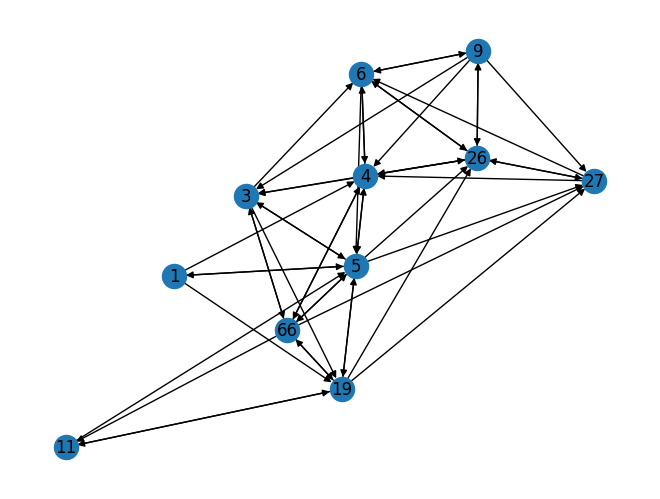

In [1964]:
# Liverpool 0-10 mins
print("The details of 0-10 mins are:")
details(generate_graph(8-2,19-2,2,5))
make_table(generate_graph(8-2,19-2,2,5))

The details of 10-20 mins are:
Player:  5 | Closeness Centrality:  0.6666666666666666 | Degree:  9
Player:  19 | Closeness Centrality:  0.625 | Degree:  10
Player:  26 | Closeness Centrality:  0.5882352941176471 | Degree:  8
Player:  3 | Closeness Centrality:  0.5882352941176471 | Degree:  8
Player:  27 | Closeness Centrality:  0.5882352941176471 | Degree:  9
Player:  66 | Closeness Centrality:  0.5882352941176471 | Degree:  7
Player:  11 | Closeness Centrality:  0.5882352941176471 | Degree:  8
Player:  4 | Closeness Centrality:  0.5555555555555556 | Degree:  7
Player:  6 | Closeness Centrality:  0.5263157894736842 | Degree:  6
Player:  9 | Closeness Centrality:  0.45454545454545453 | Degree:  4
Player:  1 | Closeness Centrality:  0.4 | Degree:  2

Player:  19 | Degree Centrality:  10
Player:  5 | Degree Centrality:  9
Player:  27 | Degree Centrality:  9
Player:  26 | Degree Centrality:  8
Player:  3 | Degree Centrality:  8
Player:  11 | Degree Centrality:  8
Player:  4 | Degree Centra

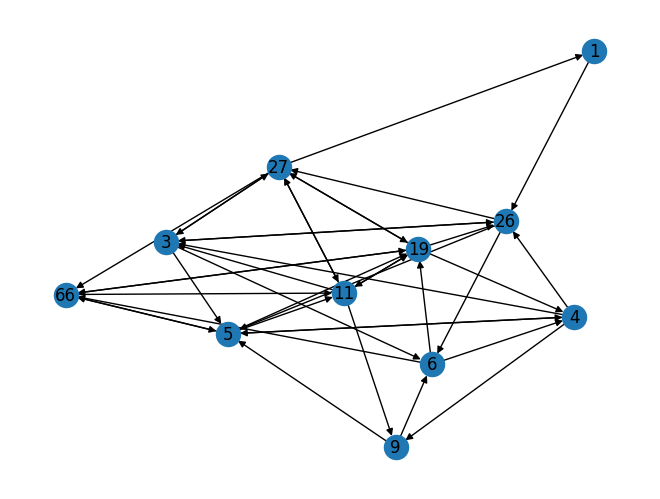

In [1965]:
# Liverpool 10-20 mins
print("The details of 10-20 mins are:")
details(generate_graph(23-2,34-2,2,5))

In [1966]:
# Liverpool 20-30 mins
print("The details of 20-30 mins are:")
details(generate_graph(38-2,49-2,2,5))

The details of 20-30 mins are:
Player:  4 | Closeness Centrality:  0.675 | Degree:  12
Player:  5 | Closeness Centrality:  0.6230769230769231 | Degree:  10
Player:  26 | Closeness Centrality:  0.5785714285714286 | Degree:  9
Player:  66 | Closeness Centrality:  0.5785714285714286 | Degree:  8
Player:  3 | Closeness Centrality:  0.5785714285714286 | Degree:  8
Player:  6 | Closeness Centrality:  0.5785714285714286 | Degree:  8
Player:  19 | Closeness Centrality:  0.50625 | Degree:  5
Player:  1 | Closeness Centrality:  0.45 | Degree:  6
Player:  9 | Closeness Centrality:  0.45 | Degree:  4
Player:  27 | Closeness Centrality:  0.4263157894736842 | Degree:  3
Player:  11 | Closeness Centrality:  0.4166666666666667 | Degree:  1

Player:  4 | Degree Centrality:  12
Player:  5 | Degree Centrality:  10
Player:  26 | Degree Centrality:  9
Player:  66 | Degree Centrality:  8
Player:  3 | Degree Centrality:  8
Player:  6 | Degree Centrality:  8
Player:  1 | Degree Centrality:  6
Player:  19 | De

The details of 30-40 mins are:
Player:  26 | Closeness Centrality:  0.7692307692307693 | Degree:  14
Player:  4 | Closeness Centrality:  0.7142857142857143 | Degree:  11
Player:  3 | Closeness Centrality:  0.7142857142857143 | Degree:  11
Player:  6 | Closeness Centrality:  0.7142857142857143 | Degree:  12
Player:  11 | Closeness Centrality:  0.7142857142857143 | Degree:  10
Player:  66 | Closeness Centrality:  0.5882352941176471 | Degree:  8
Player:  5 | Closeness Centrality:  0.5555555555555556 | Degree:  9
Player:  9 | Closeness Centrality:  0.5555555555555556 | Degree:  3
Player:  27 | Closeness Centrality:  0.5555555555555556 | Degree:  5
Player:  19 | Closeness Centrality:  0.5555555555555556 | Degree:  7
Player:  1 | Closeness Centrality:  0.47619047619047616 | Degree:  6

Player:  26 | Degree Centrality:  14
Player:  6 | Degree Centrality:  12
Player:  4 | Degree Centrality:  11
Player:  3 | Degree Centrality:  11
Player:  11 | Degree Centrality:  10
Player:  5 | Degree Central

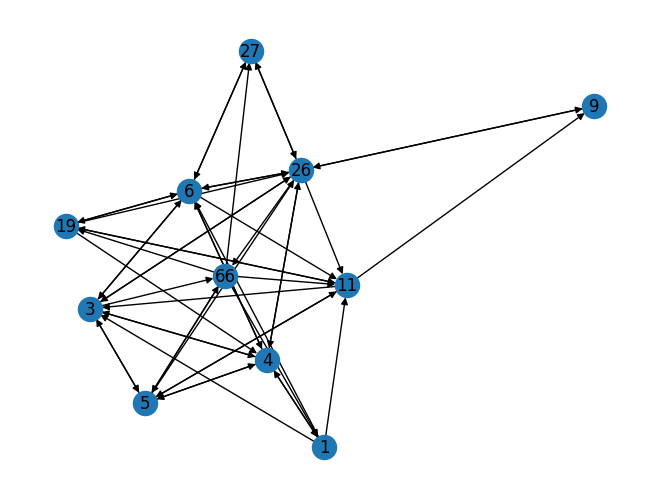

In [1967]:
# Liverpool 30-40 mins
print("The details of 30-40 mins are:")
details(generate_graph(53-2,64-2,2,5))

In [1968]:
# Liverpool 40-50 mins
print("The details of 40-50 mins are:")
details(generate_graph(68-2,79-2,2,5))

The details of 40-50 mins are:
Player:  26 | Closeness Centrality:  0.5263157894736842 | Degree:  6
Player:  19 | Closeness Centrality:  0.5263157894736842 | Degree:  7
Player:  4 | Closeness Centrality:  0.5 | Degree:  7
Player:  6 | Closeness Centrality:  0.5 | Degree:  6
Player:  1 | Closeness Centrality:  0.45454545454545453 | Degree:  4
Player:  3 | Closeness Centrality:  0.43478260869565216 | Degree:  5
Player:  66 | Closeness Centrality:  0.4 | Degree:  4
Player:  9 | Closeness Centrality:  0.37037037037037035 | Degree:  5
Player:  27 | Closeness Centrality:  0.3448275862068966 | Degree:  2
Player:  11 | Closeness Centrality:  0.29411764705882354 | Degree:  3
Player:  5 | Closeness Centrality:  0.0 | Degree:  1

Player:  4 | Degree Centrality:  7
Player:  19 | Degree Centrality:  7
Player:  26 | Degree Centrality:  6
Player:  6 | Degree Centrality:  6
Player:  3 | Degree Centrality:  5
Player:  9 | Degree Centrality:  5
Player:  1 | Degree Centrality:  4
Player:  66 | Degree Cen

The details of 50-60 mins are:
Player:  6 | Closeness Centrality:  0.625 | Degree:  10
Player:  26 | Closeness Centrality:  0.625 | Degree:  8
Player:  66 | Closeness Centrality:  0.625 | Degree:  9
Player:  11 | Closeness Centrality:  0.5882352941176471 | Degree:  5
Player:  27 | Closeness Centrality:  0.5882352941176471 | Degree:  7
Player:  19 | Closeness Centrality:  0.5555555555555556 | Degree:  6
Player:  3 | Closeness Centrality:  0.5 | Degree:  5
Player:  4 | Closeness Centrality:  0.47619047619047616 | Degree:  6
Player:  5 | Closeness Centrality:  0.43478260869565216 | Degree:  5
Player:  9 | Closeness Centrality:  0.4 | Degree:  2
Player:  1 | Closeness Centrality:  0.38461538461538464 | Degree:  5

Player:  6 | Degree Centrality:  10
Player:  66 | Degree Centrality:  9
Player:  26 | Degree Centrality:  8
Player:  27 | Degree Centrality:  7
Player:  4 | Degree Centrality:  6
Player:  19 | Degree Centrality:  6
Player:  1 | Degree Centrality:  5
Player:  5 | Degree Centrality

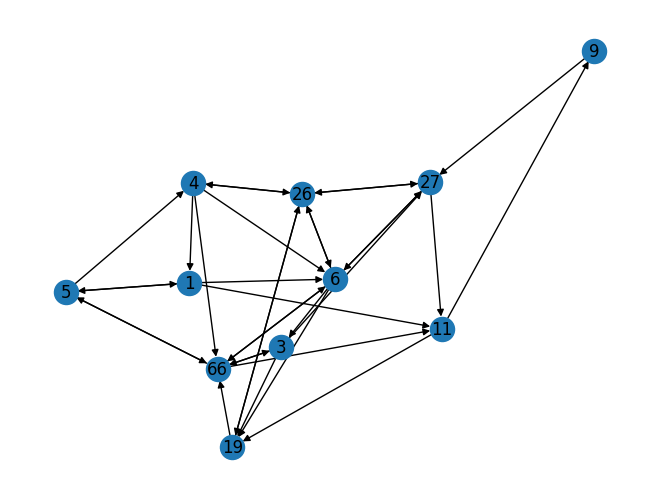

In [1969]:
# Liverpool 50-60 mins
print("The details of 50-60 mins are:")
details(generate_graph(83-2,94-2,2,5))

The details of 60-70 mins are:
Player:  11 | Closeness Centrality:  0.8181818181818182 | Degree:  11
Player:  9 | Closeness Centrality:  0.6 | Degree:  5
Player:  27 | Closeness Centrality:  0.6 | Degree:  7
Player:  26 | Closeness Centrality:  0.5625 | Degree:  7
Player:  3 | Closeness Centrality:  0.5294117647058824 | Degree:  5
Player:  6 | Closeness Centrality:  0.45 | Degree:  5
Player:  66 | Closeness Centrality:  0.4090909090909091 | Degree:  2
Player:  1 | Closeness Centrality:  0.0 | Degree:  1
Player:  4 | Closeness Centrality:  0.0 | Degree:  2
Player:  19 | Closeness Centrality:  0.0 | Degree:  1

Player:  11 | Degree Centrality:  11
Player:  27 | Degree Centrality:  7
Player:  26 | Degree Centrality:  7
Player:  9 | Degree Centrality:  5
Player:  3 | Degree Centrality:  5
Player:  6 | Degree Centrality:  5
Player:  4 | Degree Centrality:  2
Player:  66 | Degree Centrality:  2
Player:  1 | Degree Centrality:  1
Player:  19 | Degree Centrality:  1

Player:  11 | Page Rank Ce

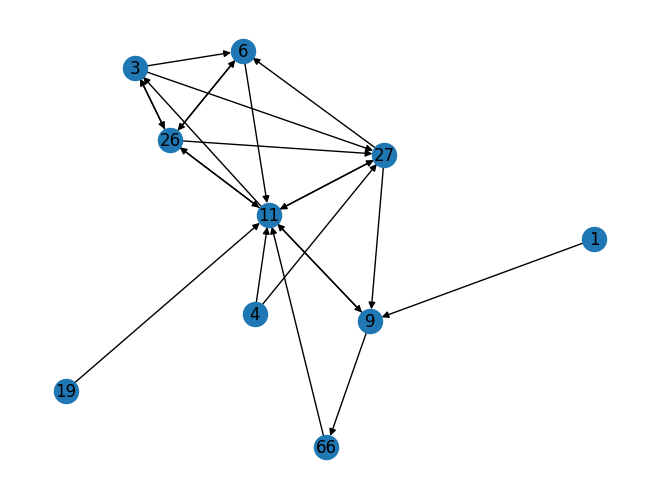

In [1970]:
# Liverpool 60-70 mins
print("The details of 60-70 mins are:")
details(generate_graph(98-2,109-2,2,5))

The details of 60-70 mins are:
Player:  19 | Closeness Centrality:  0.47846889952153104 | Degree:  6
Player:  11 | Closeness Centrality:  0.45454545454545453 | Degree:  6
Player:  66 | Closeness Centrality:  0.4132231404958677 | Degree:  7
Player:  1 | Closeness Centrality:  0.33670033670033667 | Degree:  2
Player:  3 | Closeness Centrality:  0.29325513196480935 | Degree:  4
Player:  4 | Closeness Centrality:  0.28409090909090906 | Degree:  3
Player:  9 | Closeness Centrality:  0.2558139534883721 | Degree:  1
Player:  27 | Closeness Centrality:  0.2457002457002457 | Degree:  3
Player:  26 | Closeness Centrality:  0.2457002457002457 | Degree:  3
Player:  6 | Closeness Centrality:  0.21645021645021642 | Degree:  3
Player:  5 | Closeness Centrality:  0.0 | Degree:  1

Player:  66 | Degree Centrality:  7
Player:  19 | Degree Centrality:  6
Player:  11 | Degree Centrality:  6
Player:  3 | Degree Centrality:  4
Player:  4 | Degree Centrality:  3
Player:  27 | Degree Centrality:  3
Player:  2

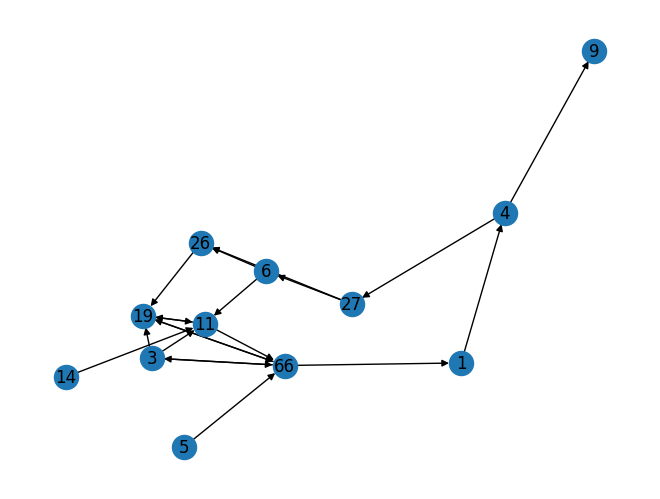

In [1971]:
# Liverpool 70-80 mins
print("The details of 60-70 mins are:")
details(generate_graph(113-2,125-2,2,5))

The details of 80-90 mins + Extra Time are:
Player:  66 | Closeness Centrality:  0.5263157894736842 | Degree:  7
Player:  11 | Closeness Centrality:  0.47619047619047616 | Degree:  4
Player:  3 | Closeness Centrality:  0.47619047619047616 | Degree:  5
Player:  27 | Closeness Centrality:  0.47619047619047616 | Degree:  4
Player:  6 | Closeness Centrality:  0.43478260869565216 | Degree:  5
Player:  5 | Closeness Centrality:  0.38461538461538464 | Degree:  3
Player:  4 | Closeness Centrality:  0.3225806451612903 | Degree:  3
Player:  26 | Closeness Centrality:  0.1 | Degree:  2
Player:  1 | Closeness Centrality:  0.0 | Degree:  1
Player:  14 | Closeness Centrality:  0.0 | Degree:  6
Player:  17 | Closeness Centrality:  0.0 | Degree:  2

Player:  66 | Degree Centrality:  7
Player:  14 | Degree Centrality:  6
Player:  6 | Degree Centrality:  5
Player:  3 | Degree Centrality:  5
Player:  11 | Degree Centrality:  4
Player:  27 | Degree Centrality:  4
Player:  4 | Degree Centrality:  3
Player:

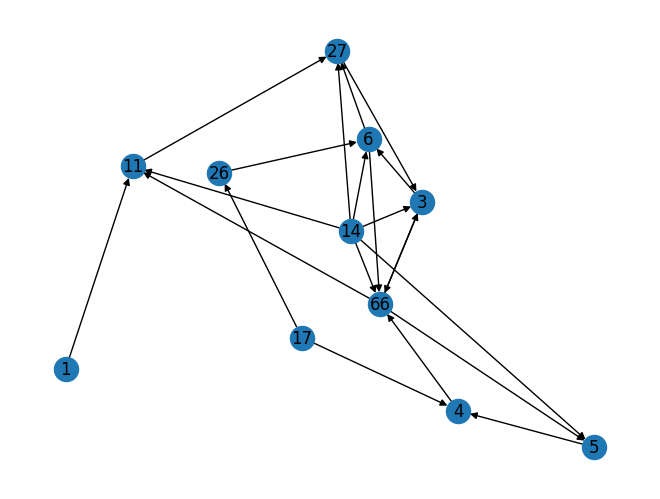

In [1972]:
# Liverpool 80-90 mins + Extra Time
print("The details of 80-90 mins + Extra Time are:")
details(generate_graph(129-2,143-2,2,5))

# Liverpool Interception Analysis

In [1973]:
dfs = pd.read_excel('Interceptions.xlsx', sheet_name='Match3')

Liverpool players Lloris  Lenglet  Davies Dier Emerson Hojbjerg  Bissouma   \
0            Allison       0        0      0    0       0         0         1   
1           Van Dijk       0        1      0    1       0         0         0   
2          Robertson       0        0      0    0       1         0         0   
3   Alexander-Arnold       0        0      0    0       0         0         0   
4             Konate       0        1      1    0       1         0         0   
5            Fabinho       0        0      0    0       0         0         0   
6            Elliott       0        1      0    0       0         0         0   
7             Thiago       0        0      0    0       0         1         0   
8            Firmino       0        0      0    0       0         0         0   
9              Salah       0        0      2    0       0         0         0   
10             Nunez       0        0      0    0       1         0         0   

   Bentacur  Sessegnin  Perisic  Kane   
0          0          0        0     0  
1          0          0        0     0  
2          0          0        0     0  
3          0          0        0     0  
4          0          0        0     0  
5          0          0        0     0  
6          0          0        0     0  
7          0          0        0     0  
8          0          0        0     0  
9          0          1        0     0  
10         0          0        0     0

Player:  Lenglet  | Degree Centrality:  3
Player:  Emerson | Degree Centrality:  3
Player:  Konate | Degree Centrality:  3
Player:  Davies | Degree Centrality:  2
Player:  Van Dijk | Degree Centrality:  2
Player:  Salah | Degree Centrality:  2
Player:  Dier | Degree Centrality:  1
Player:  Hojbjerg  | Degree Centrality:  1
Player:  Sessegnin  | Degree Centrality:  1
Player:  Robertson | Degree Centrality:  1
Player:  Elliott | Degree Centrality:  1

Player:  Konate | Closeness Centrality:  0.15 | Degree:  3
Player:  Van Dijk | Closeness Centrality:  0.1 | Degree:  2
Player:  Salah | Closeness Centrality:  0.1 | Degree:  2
Player:  Robertson | Closeness Centrality:  0.05 | Degree:  1
Player:  Elliott | Closeness Centrality:  0.05 | Degree:  1
Player:  Thiago | Closeness Centrality:  0.05 | Degree:  1
Player:  Nunez | Closeness Centrality:  0.05 | Degree:  1
Player:  Lloris  | Closeness Centrality:  0.0 | Degree:  0
Player:  Lenglet  | Closeness Centrality:  0.0 | Degree:  3
Player:  Dav

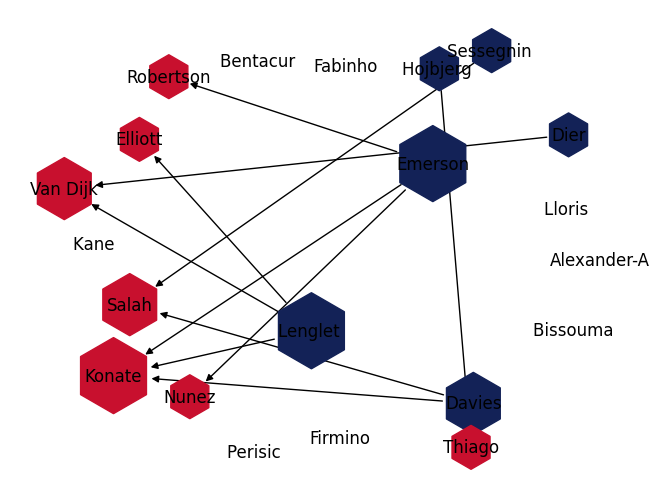

In [1974]:
# Tottenham Interceptions on Liverpool 0-10 mins
Interceptions(0, 11, 0, 12, '#132257','#C8102E','Liverpool players') 

Liverpool players Lloris  Lenglet  Davies Dier Emerson Hojbjerg  Bissouma   \
13           Allison       0        1      0    0       1         0         0   
14          Van Dijk       0        0      0    0       1         0         0   
15         Robertson       0        0      0    0       0         0         0   
16  Alexander-Arnold       0        1      0    0       0         1         0   
17            Konate       0        0      1    0       0         0         0   
18           Fabinho       0        0      0    0       0         0         0   
19           Elliott       0        0      0    0       0         0         0   
20            Thiago       0        0      0    0       0         0         0   
21           Firmino       0        1      0    0       0         0         0   
22             Salah       0        0      0    0       0         0         0   
23             Nunez       0        0      1    0       0         0         1   

   Bentacur  Sessegnin  Perisic  Kane   
13         0          0        0     0  
14         0          0        0     0  
15         0          0        0     0  
16         0          0        1     0  
17         0          0        0     0  
18         0          0        0     0  
19         0          0        0     0  
20         0          0        0     0  
21         0          0        0     0  
22         1          1        0     0  
23         0          0        0     0

Player:  Alexander-Arnold | Degree Centrality:  3
Player:  Lenglet  | Degree Centrality:  2
Player:  Davies | Degree Centrality:  2
Player:  Salah | Degree Centrality:  2
Player:  Nunez | Degree Centrality:  2
Player:  Emerson | Degree Centrality:  1
Player:  Hojbjerg  | Degree Centrality:  1
Player:  Bissouma  | Degree Centrality:  1
Player:  Bentacur  | Degree Centrality:  1
Player:  Sessegnin  | Degree Centrality:  1
Player:  Perisic  | Degree Centrality:  1

Player:  Alexander-Arnold | Closeness Centrality:  0.15 | Degree:  3
Player:  Salah | Closeness Centrality:  0.1 | Degree:  2
Player:  Nunez | Closeness Centrality:  0.1 | Degree:  2
Player:  Van Dijk | Closeness Centrality:  0.05 | Degree:  1
Player:  Konate | Closeness Centrality:  0.05 | Degree:  1
Player:  Firmino | Closeness Centrality:  0.05 | Degree:  1
Player:  Lloris  | Closeness Centrality:  0.0 | Degree:  0
Player:  Lenglet  | Closeness Centrality:  0.0 | Degree:  2
Player:  Davies | Closeness Centrality:  0.0 | Degr

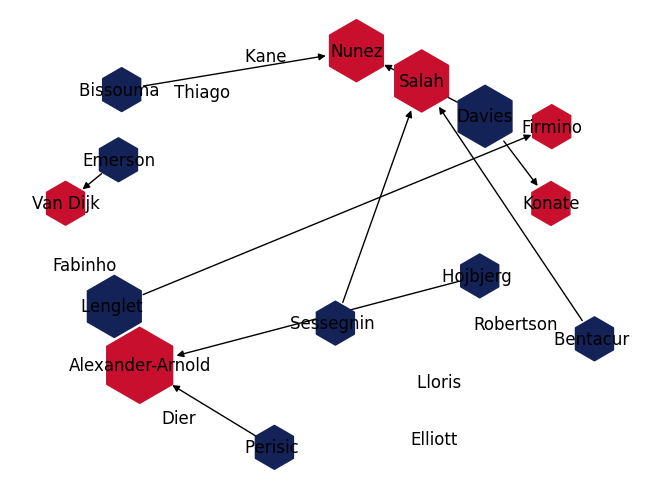

In [1975]:
# Tottenham Interceptions on Liverpool 10-20 mins
Interceptions(13, 24, 0, 12, '#132257','#C8102E','Liverpool players') 

Liverpool players Lloris  Lenglet  Davies Dier Emerson Hojbjerg  Bissouma   \
26           Allison       0        0      0    0       0         0         0   
27          Van Dijk       0        0      0    0       0         0         0   
28         Robertson       0        0      0    1       0         0         0   
29  Alexander-Arnold       0        0      0    1       0         0         0   
30            Konate       0        0      0    0       1         1         0   
31           Fabinho       0        0      0    1       0         0         0   
32           Elliott       0        0      0    0       0         0         0   
33            Thiago       0        0      0    0       0         0         0   
34           Firmino       0        0      0    0       0         0         0   
35             Salah       0        0      0    0       1         0         0   
36             Nunez       0        0      0    0       0         0         0   

   Bentacur  Sessegnin  Perisic  Kane   
26         0          1        0     0  
27         0          0        0     0  
28         0          0        0     0  
29         0          0        0     0  
30         0          0        0     0  
31         0          0        0     0  
32         0          0        0     0  
33         0          0        0     0  
34         0          0        0     0  
35         0          0        0     0  
36         0          0        0     0

Player:  Dier | Degree Centrality:  3
Player:  Emerson | Degree Centrality:  2
Player:  Konate | Degree Centrality:  2
Player:  Hojbjerg  | Degree Centrality:  1
Player:  Robertson | Degree Centrality:  1
Player:  Alexander-Arnold | Degree Centrality:  1
Player:  Fabinho | Degree Centrality:  1
Player:  Salah | Degree Centrality:  1
Player:  Lloris  | Degree Centrality:  0
Player:  Lenglet  | Degree Centrality:  0
Player:  Davies | Degree Centrality:  0

Player:  Konate | Closeness Centrality:  0.1 | Degree:  2
Player:  Robertson | Closeness Centrality:  0.05 | Degree:  1
Player:  Alexander-Arnold | Closeness Centrality:  0.05 | Degree:  1
Player:  Fabinho | Closeness Centrality:  0.05 | Degree:  1
Player:  Salah | Closeness Centrality:  0.05 | Degree:  1
Player:  Lloris  | Closeness Centrality:  0.0 | Degree:  0
Player:  Lenglet  | Closeness Centrality:  0.0 | Degree:  0
Player:  Davies | Closeness Centrality:  0.0 | Degree:  0
Player:  Dier | Closeness Centrality:  0.0 | Degree:  3
P

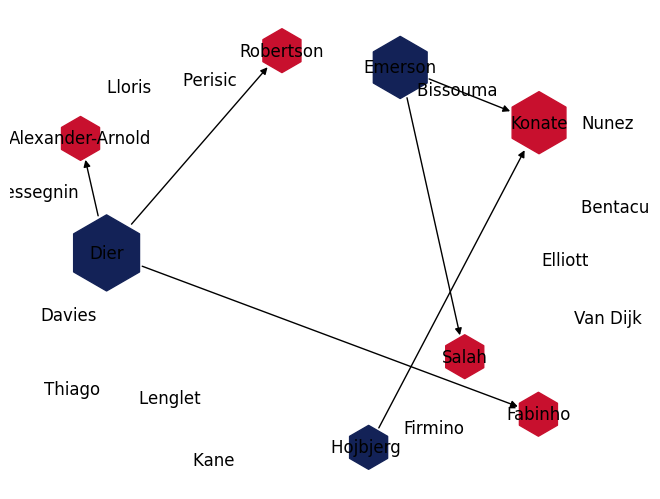

In [1976]:
# Tottenham Interceptions on Liverpool 20-30 mins
Interceptions(26, 37, 0, 12, '#132257','#C8102E','Liverpool players') 

Liverpool players Lloris  Lenglet  Davies Dier Emerson Hojbjerg  Bissouma   \
39           Allison       0        0      1    1       0         0         0   
40          Van Dijk       0        0      0    0       0         0         0   
41         Robertson       0        1      0    0       0         0         0   
42  Alexander-Arnold       0        0      0    0       0         1         0   
43            Konate       0        0      0    0       0         0         1   
44           Fabinho       0        0      0    0       0         0         0   
45           Elliott       0        0      0    0       1         0         0   
46            Thiago       0        0      0    1       0         0         0   
47           Firmino       0        0      0    1       1         0         0   
48             Salah       0        0      1    0       0         0         0   
49             Nunez       0        1      0    1       1         0         0   

   Bentacur  Sessegnin  Perisic  Kane   
39         0          0        0     0  
40         0          0        0     0  
41         1          0        0     0  
42         0          1        0     0  
43         0          1        0     0  
44         1          0        0     1  
45         0          0        0     0  
46         0          0        1     0  
47         0          0        0     0  
48         0          0        0     0  
49         0          0        0     0

Player:  Dier | Degree Centrality:  3
Player:  Emerson | Degree Centrality:  3
Player:  Nunez | Degree Centrality:  3
Player:  Lenglet  | Degree Centrality:  2
Player:  Bentacur  | Degree Centrality:  2
Player:  Sessegnin  | Degree Centrality:  2
Player:  Robertson | Degree Centrality:  2
Player:  Alexander-Arnold | Degree Centrality:  2
Player:  Konate | Degree Centrality:  2
Player:  Fabinho | Degree Centrality:  2
Player:  Thiago | Degree Centrality:  2

Player:  Nunez | Closeness Centrality:  0.15 | Degree:  3
Player:  Robertson | Closeness Centrality:  0.1 | Degree:  2
Player:  Alexander-Arnold | Closeness Centrality:  0.1 | Degree:  2
Player:  Konate | Closeness Centrality:  0.1 | Degree:  2
Player:  Fabinho | Closeness Centrality:  0.1 | Degree:  2
Player:  Thiago | Closeness Centrality:  0.1 | Degree:  2
Player:  Firmino | Closeness Centrality:  0.1 | Degree:  2
Player:  Elliott | Closeness Centrality:  0.05 | Degree:  1
Player:  Salah | Closeness Centrality:  0.05 | Degree:  1

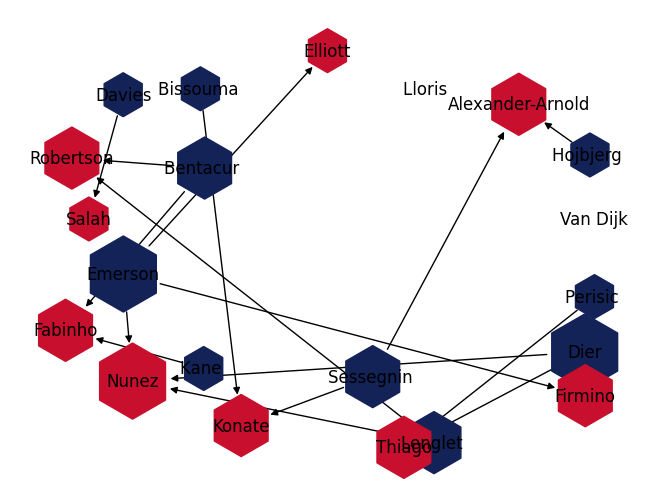

In [1977]:
# Tottenham Interceptions on Liverpool 30-40 mins
Interceptions(39, 50, 0, 12, '#132257','#C8102E','Liverpool players') 

Liverpool players Lloris  Lenglet  Davies Dier Emerson Hojbjerg  Bissouma   \
52           Allison       0        0      0    2       0         0         0   
53          Van Dijk       0        0      0    0       0         0         0   
54         Robertson       0        1      1    0       1         0         0   
55  Alexander-Arnold       0        0      0    0       0         1         0   
56            Konate       0        0      0    0       0         0         0   
57           Fabinho       0        0      0    0       1         0         0   
58           Elliott       0        1      1    0       0         0         1   
59            Thiago       0        0      0    0       0         0         0   
60           Firmino       0        0      0    1       0         0         0   
61             Salah       0        0      0    0       0         0         0   
62             Nunez       0        0      0    0       0         0         0   

   Bentacur  Sessegnin  Perisic  Kane   
52         0          0        0     0  
53         0          0        0     0  
54         0          1        0     0  
55         0          0        0     0  
56         0          2        0     0  
57         0          0        0     0  
58         0          0        0     0  
59         1          0        1     1  
60         0          0        0     0  
61         0          0        0     0  
62         0          0        0     0

Player:  Robertson | Degree Centrality:  4
Player:  Elliott | Degree Centrality:  3
Player:  Thiago | Degree Centrality:  3
Player:  Lenglet  | Degree Centrality:  2
Player:  Davies | Degree Centrality:  2
Player:  Emerson | Degree Centrality:  2
Player:  Sessegnin  | Degree Centrality:  2
Player:  Dier | Degree Centrality:  1
Player:  Hojbjerg  | Degree Centrality:  1
Player:  Bissouma  | Degree Centrality:  1
Player:  Bentacur  | Degree Centrality:  1

Player:  Robertson | Closeness Centrality:  0.2 | Degree:  4
Player:  Elliott | Closeness Centrality:  0.15 | Degree:  3
Player:  Thiago | Closeness Centrality:  0.15 | Degree:  3
Player:  Alexander-Arnold | Closeness Centrality:  0.05 | Degree:  1
Player:  Konate | Closeness Centrality:  0.05 | Degree:  1
Player:  Fabinho | Closeness Centrality:  0.05 | Degree:  1
Player:  Firmino | Closeness Centrality:  0.05 | Degree:  1
Player:  Lloris  | Closeness Centrality:  0.0 | Degree:  0
Player:  Lenglet  | Closeness Centrality:  0.0 | Degre

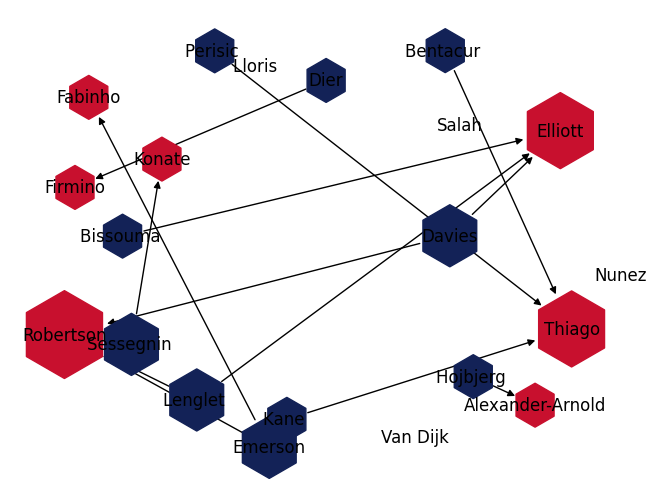

In [1978]:
# Tottenham Interceptions on Liverpool 40-50 mins
Interceptions(52, 63, 0, 12, '#132257','#C8102E','Liverpool players') 

Liverpool players Lloris  Lenglet  Davies Dier Emerson Hojbjerg  Bissouma   \
65           Allison       0        0      0    0       0         0         0   
66          Van Dijk       0        0      0    0       1         0         0   
67         Robertson       0        0      1    0       0         0         0   
68  Alexander-Arnold       0        0      2    1       0         1         0   
69            Konate       0        0      0    0       0         0         0   
70           Fabinho       0        0      0    0       0         0         0   
71           Elliott       0        1      0    1       1         0         0   
72            Thiago       0        0      0    0       0         0         2   
73           Firmino       0        0      0    0       0         0         1   
74             Salah       0        0      0    0       0         0         0   
75             Nunez       0        1      0    0       0         0         0   

   Bentacur  Sessegnin  Perisic  Kane   
65         0          0        0     0  
66         0          0        0     0  
67         0          0        0     0  
68         0          0        0     0  
69         0          0        0     0  
70         0          0        0     0  
71         0          0        0     0  
72         0          0        0     0  
73         0          0        0     0  
74         0          0        0     0  
75         0          0        0     0

Player:  Alexander-Arnold | Degree Centrality:  3
Player:  Elliott | Degree Centrality:  3
Player:  Lenglet  | Degree Centrality:  2
Player:  Davies | Degree Centrality:  2
Player:  Dier | Degree Centrality:  2
Player:  Emerson | Degree Centrality:  2
Player:  Bissouma  | Degree Centrality:  2
Player:  Hojbjerg  | Degree Centrality:  1
Player:  Van Dijk | Degree Centrality:  1
Player:  Robertson | Degree Centrality:  1
Player:  Thiago | Degree Centrality:  1

Player:  Alexander-Arnold | Closeness Centrality:  0.15 | Degree:  3
Player:  Elliott | Closeness Centrality:  0.15 | Degree:  3
Player:  Van Dijk | Closeness Centrality:  0.05 | Degree:  1
Player:  Robertson | Closeness Centrality:  0.05 | Degree:  1
Player:  Thiago | Closeness Centrality:  0.05 | Degree:  1
Player:  Firmino | Closeness Centrality:  0.05 | Degree:  1
Player:  Nunez | Closeness Centrality:  0.05 | Degree:  1
Player:  Lloris  | Closeness Centrality:  0.0 | Degree:  0
Player:  Lenglet  | Closeness Centrality:  0.0 |

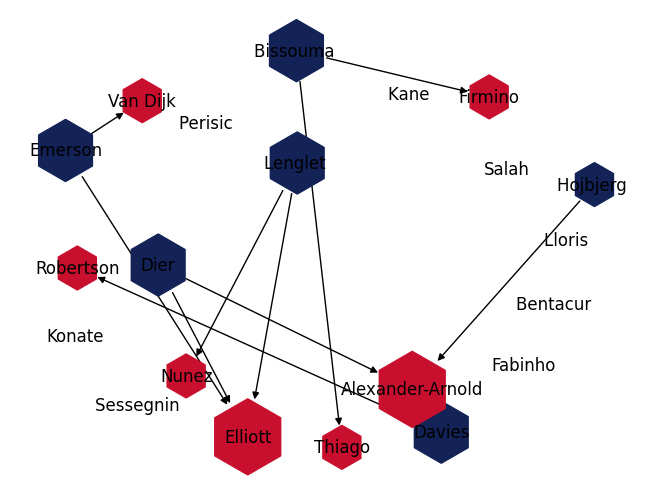

In [1979]:
# Tottenham Interceptions on Liverpool 50-60 mins
Interceptions(65, 76, 0, 12, '#132257','#C8102E','Liverpool players') 

Liverpool players Lloris  Lenglet  Davies Dier Emerson Hojbjerg  Bissouma   \
78           Allison       0        0      0    0       0         0         0   
79          Van Dijk       0        0      0    0       0         0         0   
80         Robertson       0        0      1    1       0         0         0   
81  Alexander-Arnold       0        0      0    0       0         0         0   
82            Konate       0        0      0    0       0         0         0   
83           Fabinho       0        0      0    0       0         0         0   
84           Elliott       0        0      0    0       0         0         1   
85            Thiago       0        0      0    0       0         0         0   
86           Firmino       0        1      0    1       1         0         0   
87             Salah       0        1      0    0       0         0         0   
88             Nunez       0        0      0    0       0         0         1   

   Bentacur  Sessegnin  Perisic  Kane   
78         1          0        0     0  
79         0          0        0     0  
80         0          0        0     0  
81         0          0        0     0  
82         0          0        0     0  
83         0          0        0     0  
84         0          0        0     0  
85         0          0        0     0  
86         0          0        0     0  
87         0          0        0     0  
88         0          0        0     0

Player:  Firmino | Degree Centrality:  3
Player:  Lenglet  | Degree Centrality:  2
Player:  Dier | Degree Centrality:  2
Player:  Bissouma  | Degree Centrality:  2
Player:  Robertson | Degree Centrality:  2
Player:  Davies | Degree Centrality:  1
Player:  Emerson | Degree Centrality:  1
Player:  Elliott | Degree Centrality:  1
Player:  Salah | Degree Centrality:  1
Player:  Nunez | Degree Centrality:  1
Player:  Lloris  | Degree Centrality:  0

Player:  Firmino | Closeness Centrality:  0.15 | Degree:  3
Player:  Robertson | Closeness Centrality:  0.1 | Degree:  2
Player:  Elliott | Closeness Centrality:  0.05 | Degree:  1
Player:  Salah | Closeness Centrality:  0.05 | Degree:  1
Player:  Nunez | Closeness Centrality:  0.05 | Degree:  1
Player:  Lloris  | Closeness Centrality:  0.0 | Degree:  0
Player:  Lenglet  | Closeness Centrality:  0.0 | Degree:  2
Player:  Davies | Closeness Centrality:  0.0 | Degree:  1
Player:  Dier | Closeness Centrality:  0.0 | Degree:  2
Player:  Emerson | Cl

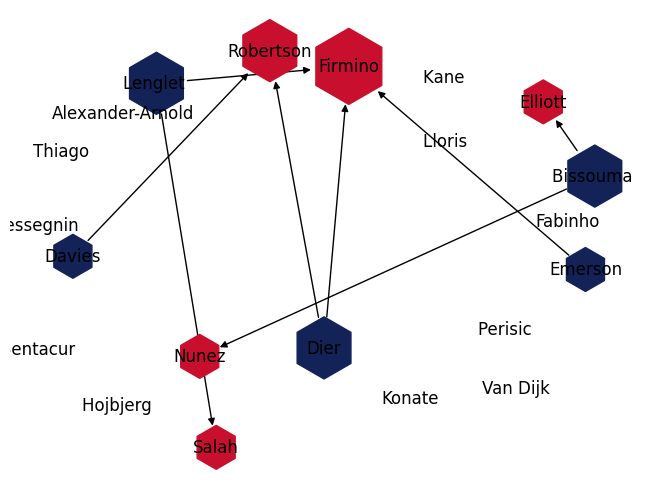

In [1980]:
# Tottenham Interceptions on Liverpool 60-70 mins
Interceptions(78, 89, 0, 12, '#132257','#C8102E','Liverpool players') 

Liverpool players  Lloris   Lenglet   Davies  Dier  Emerson  Hojbjerg   \
90    Liverpool players  Lloris   Lenglet   Davies  Dier  Emerson  Hojbjerg    
91              Allison        0         1       0     1        0          0   
92             Van Dijk        0         0       0     0        0          0   
93            Robertson        0         0       1    11        0          0   
94     Alexander-Arnold        0         0       0     0        0          0   
95               Konate        0         0       0     0        0          0   
96              Fabinho        0         0       0     0        0          0   
97              Elliott        0         0       0     0        0          0   
98               Thiago        0         0       0     1        0          0   
99              Firmino        0         0       0     0        0          0   
100               Salah        0         0       0     0        0          0   
101               Nunez        0         0       0     0        0          0   
102           Henderson        0         0       0     0        0          0   
103               Jones        0         0       0     0        0          0   
104  Oxlade-Chamberlain        0         0       0     0        0          0   

     Bissouma   Bentacur   Sessegnin   Perisic   Kane  Unnamed: 12  \
90   Bissouma   Bentacur   Sessegnin   Perisic   Kane     Doherty    
91           0          1           0         0      0           0   
92           0          0           0         0      0           0   
93           0          0           0         0      0           0   
94           1          0           0         0      0           0   
95           0          0           0         0      0           0   
96           0          0           0         1      0           0   
97           0          0           0         0      0           0   
98           0          0           0         0      0           0   
99           0          1           0         0      0           0   
100          0          0           0         0      0           0   
101          0          0           0         0      0           0   
102          0          0           0         0      0           0   
103          0          0           0         0      0           0   
104          0          0           0         0      0           0   

     Unnamed: 13  
90   Kulusevski   
91             0  
92             0  
93             0  
94             0  
95             0  
96             0  
97             0  
98             0  
99             0  
100            1  
101            0  
102            0  
103            0  
104            0

Player:  Dier | Degree Centrality:  3
Player:  Allison | Degree Centrality:  3
Player:  Bentacur  | Degree Centrality:  2
Player:  Robertson | Degree Centrality:  2
Player:  Lenglet  | Degree Centrality:  1
Player:  Davies | Degree Centrality:  1
Player:  Bissouma  | Degree Centrality:  1
Player:  Perisic  | Degree Centrality:  1
Player:  Unnamed: 13 | Degree Centrality:  1
Player:  Alexander-Arnold | Degree Centrality:  1
Player:  Fabinho | Degree Centrality:  1

Player:  Allison | Closeness Centrality:  0.11538461538461539 | Degree:  3
Player:  Robertson | Closeness Centrality:  0.07692307692307693 | Degree:  2
Player:  Alexander-Arnold | Closeness Centrality:  0.038461538461538464 | Degree:  1
Player:  Fabinho | Closeness Centrality:  0.038461538461538464 | Degree:  1
Player:  Thiago | Closeness Centrality:  0.038461538461538464 | Degree:  1
Player:  Firmino | Closeness Centrality:  0.038461538461538464 | Degree:  1
Player:  Salah | Closeness Centrality:  0.038461538461538464 | Degr

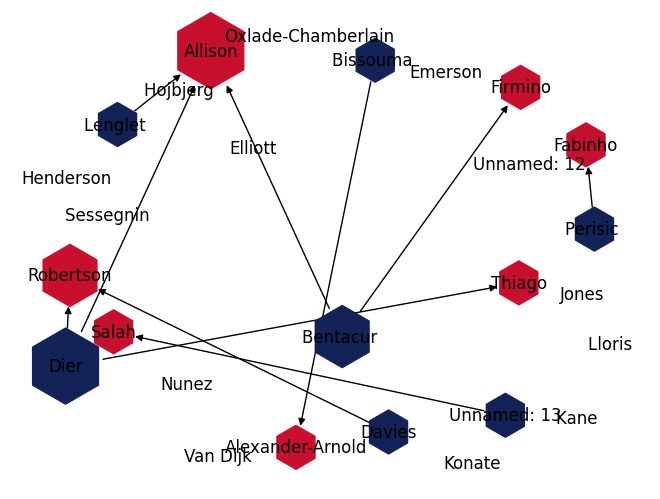

In [1981]:
# Tottenham Interceptions on Liverpool 70-80 mins
Interceptions(90, 105, 0, 14, '#132257','#C8102E','Liverpool players') 

Liverpool players  Lloris   Lenglet   Davies  Dier  Emerson  Hojbjerg   \
106   Liverpool players  Lloris   Lenglet   Davies  Dier  Emerson  Hojbjerg    
107             Allison        0         0       0     0        0          0   
108            Van Dijk        0         0       0     0        0          0   
109           Robertson        0         0       0     0        0          0   
110    Alexander-Arnold        0         0       0     0        0          1   
111              Konate        0         1       0     0        0          1   
112             Fabinho        0         1       0     0        0          0   
113             Elliott        0         0       0     0        0          0   
114              Thiago        0         0       0     0        0          0   
115             Firmino        0         0       0     0        0          0   
116               Salah        0         0       0     0        0          0   
117               Nunez        0         0       0     0        0          0   
118           Henderson        0         1       0     0        0          0   
119               Jones        0         0       0     0        0          0   
120  Oxlade-Chamberlain        0         1       0     0        0          0   

     Bissouma   Bentacur   Sessegnin   Perisic   Kane  Unnamed: 12  \
106  Bissouma   Bentacur   Sessegnin   Perisic   Kane     Doherty    
107          0          0           0         1      0           0   
108          0          0           0         0      0           0   
109          0          0           0         0      0           0   
110          0          0           0         0      0           0   
111          1          0           0         0      0           1   
112          0          0           0         0      0           0   
113          0          0           0         0      0           0   
114          0          0           0         0      0           0   
115          0          0           0         0      0           0   
116          0          0           0         0      0           0   
117          0          0           0         0      0           0   
118          0          0           0         0      0           0   
119          0          0           0         0      0           0   
120          0          0           0         0      0           0   

     Unnamed: 13 Unnamed: 14  
106  Kulusevski        Moura  
107            0           0  
108            0           0  
109            0           1  
110            0           0  
111            0           1  
112            0           0  
113            0           0  
114            0           0  
115            0           0  
116            0           0  
117            0           0  
118            0           0  
119            0           0  
120            0           0

Player:  Konate | Degree Centrality:  5
Player:  Lenglet  | Degree Centrality:  4
Player:  Hojbjerg  | Degree Centrality:  2
Player:  Unnamed: 14 | Degree Centrality:  2
Player:  Bissouma  | Degree Centrality:  1
Player:  Perisic  | Degree Centrality:  1
Player:  Unnamed: 12 | Degree Centrality:  1
Player:  Allison | Degree Centrality:  1
Player:  Robertson | Degree Centrality:  1
Player:  Alexander-Arnold | Degree Centrality:  1
Player:  Fabinho | Degree Centrality:  1

Player:  Konate | Closeness Centrality:  0.18518518518518517 | Degree:  5
Player:  Allison | Closeness Centrality:  0.037037037037037035 | Degree:  1
Player:  Robertson | Closeness Centrality:  0.037037037037037035 | Degree:  1
Player:  Alexander-Arnold | Closeness Centrality:  0.037037037037037035 | Degree:  1
Player:  Fabinho | Closeness Centrality:  0.037037037037037035 | Degree:  1
Player:  Henderson | Closeness Centrality:  0.037037037037037035 | Degree:  1
Player:  Oxlade-Chamberlain | Closeness Centrality:  0.03

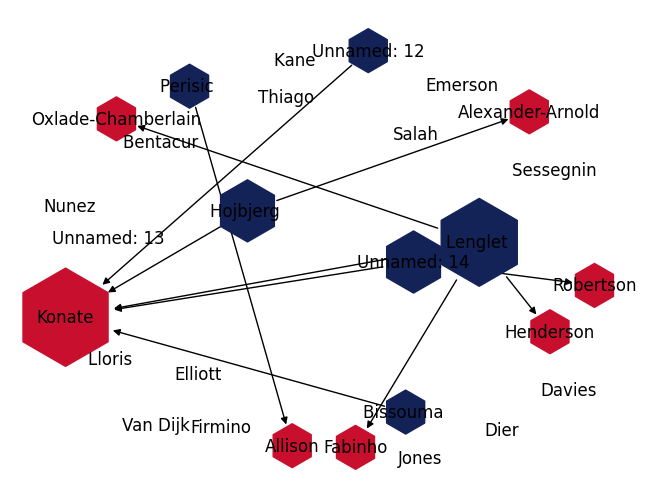

In [1982]:
# Tottenham Interceptions on Liverpool 80-90 mins
Interceptions(106, 121, 0, 15, '#132257','#C8102E','Liverpool players') 

# Tottenham Passing Analysis

The details of 0-10 mins are:
Player:  10 | Closeness Centrality:  0.6230769230769231 | Degree:  8
Player:  5 | Closeness Centrality:  0.54 | Degree:  8
Player:  12 | Closeness Centrality:  0.47647058823529415 | Degree:  4
Player:  14 | Closeness Centrality:  0.47619047619047616 | Degree:  2
Player:  34 | Closeness Centrality:  0.405 | Degree:  8
Player:  33 | Closeness Centrality:  0.405 | Degree:  6
Player:  19 | Closeness Centrality:  0.405 | Degree:  9
Player:  30 | Closeness Centrality:  0.3857142857142857 | Degree:  2
Player:  15 | Closeness Centrality:  0.3521739130434783 | Degree:  3
Player:  1 | Closeness Centrality:  0.31153846153846154 | Degree:  2
Player:  38 | Closeness Centrality:  0.31153846153846154 | Degree:  4

Player:  19 | Degree Centrality:  9
Player:  10 | Degree Centrality:  8
Player:  34 | Degree Centrality:  8
Player:  5 | Degree Centrality:  8
Player:  33 | Degree Centrality:  6
Player:  38 | Degree Centrality:  4
Player:  12 | Degree Centrality:  4
Player:  1

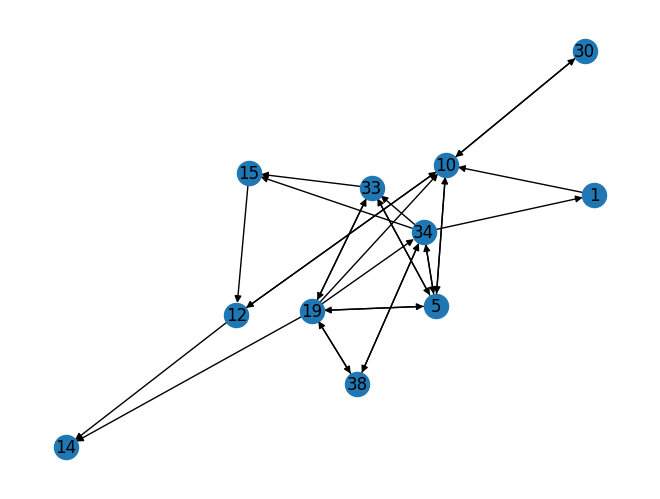

In [1983]:
# Tottenham 0-10 mins
print("The details of 0-10 mins are:")
details(generate_graph(8-2,19-2,21,24))
make_table(generate_graph(8-2,19-2,21,24))

The details of 10-20 mins are:
Player:  34 | Closeness Centrality:  0.5882352941176471 | Degree:  9
Player:  14 | Closeness Centrality:  0.5555555555555556 | Degree:  4
Player:  12 | Closeness Centrality:  0.5 | Degree:  6
Player:  15 | Closeness Centrality:  0.47619047619047616 | Degree:  7
Player:  5 | Closeness Centrality:  0.45454545454545453 | Degree:  4
Player:  30 | Closeness Centrality:  0.43478260869565216 | Degree:  4
Player:  38 | Closeness Centrality:  0.4166666666666667 | Degree:  5
Player:  33 | Closeness Centrality:  0.4 | Degree:  6
Player:  19 | Closeness Centrality:  0.4 | Degree:  2
Player:  10 | Closeness Centrality:  0.38461538461538464 | Degree:  2
Player:  1 | Closeness Centrality:  0.3448275862068966 | Degree:  3

Player:  34 | Degree Centrality:  9
Player:  15 | Degree Centrality:  7
Player:  33 | Degree Centrality:  6
Player:  12 | Degree Centrality:  6
Player:  38 | Degree Centrality:  5
Player:  5 | Degree Centrality:  4
Player:  30 | Degree Centrality:  4
P

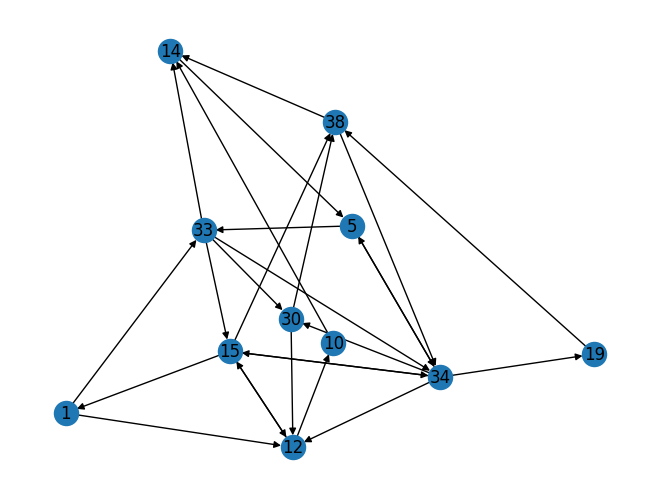

In [1984]:
# Tottenham 10-20 mins
print("The details of 10-20 mins are:")
details(generate_graph(23-2,34-2,21,24))

The details of 20-30 mins are:
Player:  34 | Closeness Centrality:  0.7272727272727273 | Degree:  11
Player:  15 | Closeness Centrality:  0.7272727272727273 | Degree:  12
Player:  10 | Closeness Centrality:  0.7272727272727273 | Degree:  8
Player:  12 | Closeness Centrality:  0.6666666666666666 | Degree:  7
Player:  5 | Closeness Centrality:  0.6666666666666666 | Degree:  9
Player:  30 | Closeness Centrality:  0.6666666666666666 | Degree:  7
Player:  19 | Closeness Centrality:  0.6153846153846154 | Degree:  5
Player:  38 | Closeness Centrality:  0.5714285714285714 | Degree:  6
Player:  33 | Closeness Centrality:  0.5 | Degree:  5

Player:  15 | Degree Centrality:  12
Player:  34 | Degree Centrality:  11
Player:  5 | Degree Centrality:  9
Player:  10 | Degree Centrality:  8
Player:  12 | Degree Centrality:  7
Player:  30 | Degree Centrality:  7
Player:  38 | Degree Centrality:  6
Player:  33 | Degree Centrality:  5
Player:  19 | Degree Centrality:  5

Player:  34 | Page Rank Centrality:

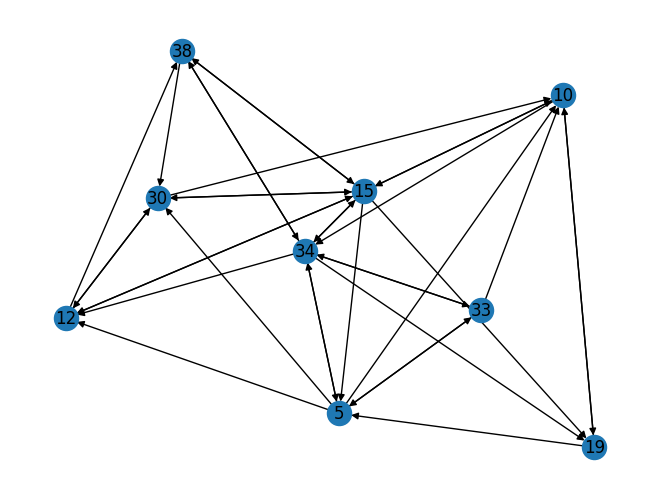

In [1985]:
# Tottenham 20-30 mins
print("The details of 20-30 mins are:")
details(generate_graph(38-2,49-2,21,24))

In [1986]:
# Tottenham 30-40 mins
print("The details of 30-40 mins are:")
details(generate_graph(53-2,64-2,21,24))

The details of 30-40 mins are:
Player:  38 | Closeness Centrality:  0.5714285714285714 | Degree:  7
Player:  34 | Closeness Centrality:  0.5714285714285714 | Degree:  7
Player:  14 | Closeness Centrality:  0.5142857142857142 | Degree:  3
Player:  33 | Closeness Centrality:  0.42857142857142855 | Degree:  4
Player:  1 | Closeness Centrality:  0.3956043956043956 | Degree:  2
Player:  5 | Closeness Centrality:  0.3684210526315789 | Degree:  1
Player:  15 | Closeness Centrality:  0.36734693877551017 | Degree:  4
Player:  30 | Closeness Centrality:  0.2857142857142857 | Degree:  2

Player:  38 | Degree Centrality:  7
Player:  34 | Degree Centrality:  7
Player:  33 | Degree Centrality:  4
Player:  15 | Degree Centrality:  4
Player:  14 | Degree Centrality:  3
Player:  1 | Degree Centrality:  2
Player:  30 | Degree Centrality:  2
Player:  5 | Degree Centrality:  1

Player:  34 | Page Rank Centrality:  0.19039509138691163 | Degree:  7
Player:  38 | Page Rank Centrality:  0.19024572817066532 | 

The details of 40-50 mins are:
Player:  15 | Closeness Centrality:  0.6666666666666666 | Degree:  12
Player:  30 | Closeness Centrality:  0.5882352941176471 | Degree:  6
Player:  34 | Closeness Centrality:  0.5555555555555556 | Degree:  5
Player:  14 | Closeness Centrality:  0.5263157894736842 | Degree:  6
Player:  1 | Closeness Centrality:  0.5 | Degree:  3
Player:  12 | Closeness Centrality:  0.47619047619047616 | Degree:  6
Player:  38 | Closeness Centrality:  0.45454545454545453 | Degree:  6
Player:  10 | Closeness Centrality:  0.43478260869565216 | Degree:  3
Player:  33 | Closeness Centrality:  0.38461538461538464 | Degree:  3
Player:  5 | Closeness Centrality:  0.38461538461538464 | Degree:  4
Player:  19 | Closeness Centrality:  0.0 | Degree:  2

Player:  15 | Degree Centrality:  12
Player:  38 | Degree Centrality:  6
Player:  12 | Degree Centrality:  6
Player:  30 | Degree Centrality:  6
Player:  14 | Degree Centrality:  6
Player:  34 | Degree Centrality:  5
Player:  5 | Degre

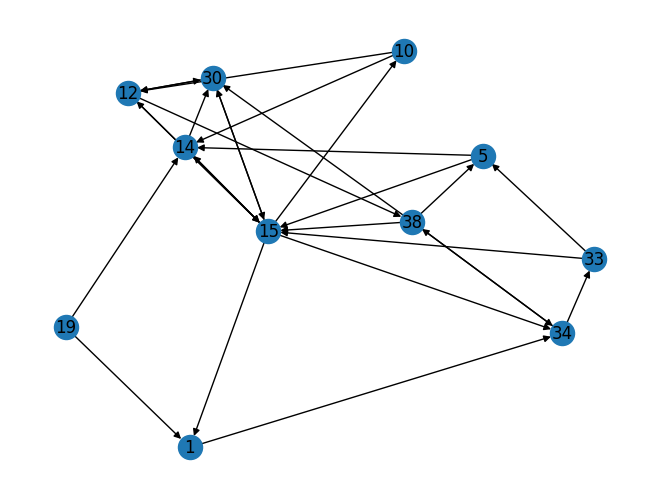

In [1987]:
# Tottenham 40-50 mins
print("The details of 40-50 mins are:")
details(generate_graph(68-2,79-2,21,24))

The details of 50-60 mins are:
Player:  33 | Closeness Centrality:  0.5785714285714286 | Degree:  12
Player:  12 | Closeness Centrality:  0.5785714285714286 | Degree:  8
Player:  30 | Closeness Centrality:  0.5785714285714286 | Degree:  9
Player:  15 | Closeness Centrality:  0.54 | Degree:  8
Player:  34 | Closeness Centrality:  0.50625 | Degree:  7
Player:  5 | Closeness Centrality:  0.45 | Degree:  7
Player:  38 | Closeness Centrality:  0.45 | Degree:  8
Player:  19 | Closeness Centrality:  0.45 | Degree:  3
Player:  14 | Closeness Centrality:  0.4263157894736842 | Degree:  3
Player:  1 | Closeness Centrality:  0.4166666666666667 | Degree:  1
Player:  10 | Closeness Centrality:  0.3521739130434783 | Degree:  2

Player:  33 | Degree Centrality:  12
Player:  30 | Degree Centrality:  9
Player:  15 | Degree Centrality:  8
Player:  12 | Degree Centrality:  8
Player:  38 | Degree Centrality:  8
Player:  34 | Degree Centrality:  7
Player:  5 | Degree Centrality:  7
Player:  19 | Degree Cent

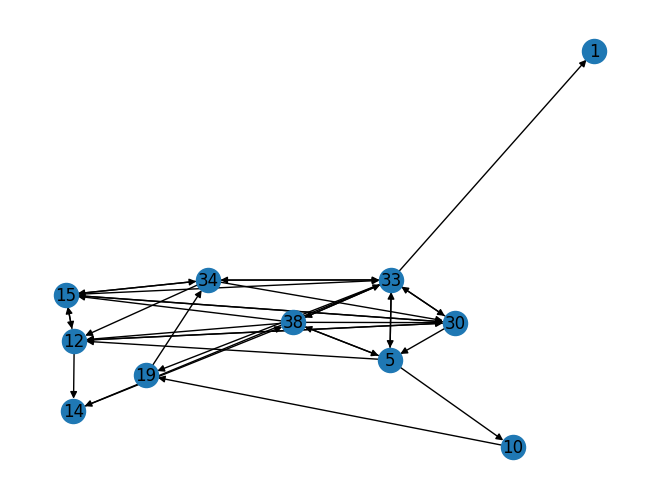

In [1988]:
# Tottenham 50-60 mins
print("The details of 50-60 mins are:")
details(generate_graph(83-2,94-2,21,24))

In [1989]:
# Tottenham 60-70 mins
print("The details of 60-70 mins are:")
details(generate_graph(98-2,111-2,21,24))

The details of 60-70 mins are:
Player:  34 | Closeness Centrality:  0.5789473684210527 | Degree:  9
Player:  33 | Closeness Centrality:  0.5789473684210527 | Degree:  8
Player:  5 | Closeness Centrality:  0.5789473684210527 | Degree:  9
Player:  38 | Closeness Centrality:  0.55 | Degree:  10
Player:  30 | Closeness Centrality:  0.5238095238095238 | Degree:  8
Player:  10 | Closeness Centrality:  0.5238095238095238 | Degree:  5
Player:  15 | Closeness Centrality:  0.5 | Degree:  9
Player:  19 | Closeness Centrality:  0.5 | Degree:  4
Player:  12 | Closeness Centrality:  0.4782608695652174 | Degree:  6
Player:  14 | Closeness Centrality:  0.0 | Degree:  2
Player:  2 | Closeness Centrality:  0.0 | Degree:  1

Player:  38 | Degree Centrality:  10
Player:  34 | Degree Centrality:  9
Player:  15 | Degree Centrality:  9
Player:  5 | Degree Centrality:  9
Player:  33 | Degree Centrality:  8
Player:  30 | Degree Centrality:  8
Player:  12 | Degree Centrality:  6
Player:  10 | Degree Centrality:

The details of 70-80 mins are:
Player:  14 | Closeness Centrality:  0.6400000000000001 | Degree:  9
Player:  5 | Closeness Centrality:  0.5818181818181819 | Degree:  7
Player:  34 | Closeness Centrality:  0.5333333333333333 | Degree:  9
Player:  30 | Closeness Centrality:  0.5333333333333333 | Degree:  9
Player:  10 | Closeness Centrality:  0.47647058823529415 | Degree:  2
Player:  15 | Closeness Centrality:  0.45714285714285713 | Degree:  7
Player:  33 | Closeness Centrality:  0.4 | Degree:  5
Player:  1 | Closeness Centrality:  0.3857142857142857 | Degree:  1
Player:  38 | Closeness Centrality:  0.3764705882352941 | Degree:  6
Player:  2 | Closeness Centrality:  0.0 | Degree:  3
Player:  21 | Closeness Centrality:  0.0 | Degree:  2

Player:  34 | Degree Centrality:  9
Player:  14 | Degree Centrality:  9
Player:  30 | Degree Centrality:  9
Player:  15 | Degree Centrality:  7
Player:  5 | Degree Centrality:  7
Player:  38 | Degree Centrality:  6
Player:  33 | Degree Centrality:  5
Play

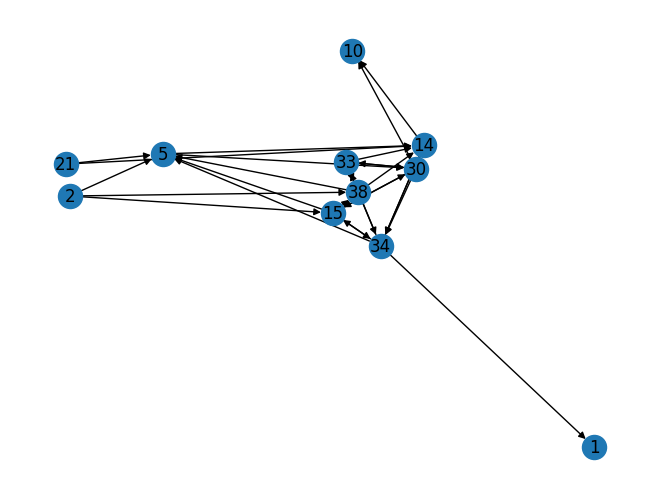

In [1990]:
# Tottenham 70-80 mins
print("The details of 70-80 mins are:")
details(generate_graph(113-2,126-2,21,24))

The details of 80-90 + Extra Time mins are:
Player:  15 | Closeness Centrality:  0.7575757575757576 | Degree:  11
Player:  5 | Closeness Centrality:  0.606060606060606 | Degree:  7
Player:  14 | Closeness Centrality:  0.606060606060606 | Degree:  10
Player:  38 | Closeness Centrality:  0.5347593582887701 | Degree:  9
Player:  30 | Closeness Centrality:  0.5050505050505051 | Degree:  6
Player:  33 | Closeness Centrality:  0.47846889952153104 | Degree:  8
Player:  1 | Closeness Centrality:  0.45454545454545453 | Degree:  3
Player:  34 | Closeness Centrality:  0.45454545454545453 | Degree:  9
Player:  10 | Closeness Centrality:  0.4230769230769231 | Degree:  1
Player:  2 | Closeness Centrality:  0.0 | Degree:  2
Player:  21 | Closeness Centrality:  0.0 | Degree:  3

Player:  15 | Degree Centrality:  11
Player:  14 | Degree Centrality:  10
Player:  34 | Degree Centrality:  9
Player:  38 | Degree Centrality:  9
Player:  33 | Degree Centrality:  8
Player:  5 | Degree Centrality:  7
Player:  

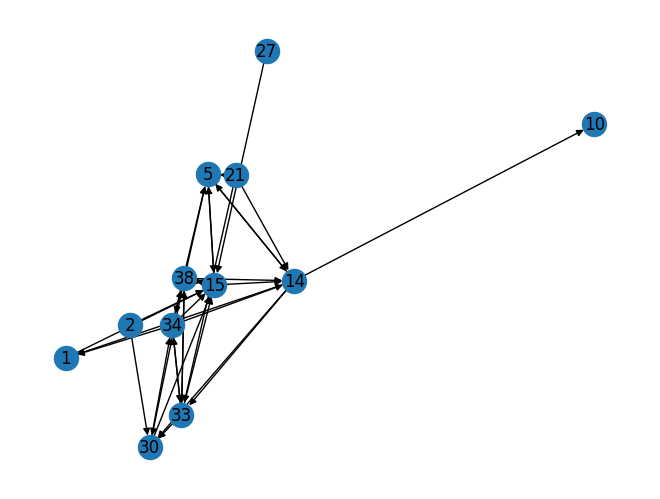

In [1991]:
# Tottenham 80-90 + Extra Time mins
print("The details of 80-90 + Extra Time mins are:")
details(generate_graph(129-2,143-2,21,24))

# Tottenham Interception Analysis

Tottenham players Allison  Van Dijk  Robertson  Alexander-Arnold  Konate   \
0            Lloris         0         1          0                 0       1   
1            Lenglet        0         0          0                 0       0   
2             Davies        0         0          0                 0       0   
3               Dier        0         0          0                 0       0   
4     Emerson Royal         0         0          0                 0       0   
5          Sessegnon        0         0          0                 0       0   
6           Hojbjerg        0         0          0                 0       0   
7           Bissouma        0         0          0                 0       0   
8          Bentancur        0         0          0                 0       0   
9            Perisic        0         0          0                 0       2   
10              Kane        0         0          1                 0       0   

   Fabinho Elliott  Thiago  Firmino  Salah Nunez  
0        0        0       0        0     0     0  
1        0        0       0        0     0     0  
2        0        1       0        0     1     0  
3        0        0       0        0     0     0  
4        0        0       0        0     0     0  
5        0        0       1        2     0     0  
6        0        0       0        0     0     0  
7        0        0       0        0     0     0  
8        0        0       0        0     0     0  
9        0        0       0        0     0     0  
10       0        0       1        0     0     0

Player:  Thiago  | Degree Centrality:  2
Player:  Davies | Degree Centrality:  2
Player:  Sessegnon | Degree Centrality:  2
Player:  Kane | Degree Centrality:  2
Player:  Robertson  | Degree Centrality:  1
Player:  Konate  | Degree Centrality:  1
Player:  Elliott  | Degree Centrality:  1
Player:  Firmino  | Degree Centrality:  1
Player:  Salah | Degree Centrality:  1
Player:  Perisic | Degree Centrality:  1
Player:  Allison  | Degree Centrality:  0

Player:  Davies | Closeness Centrality:  0.1 | Degree:  2
Player:  Sessegnon | Closeness Centrality:  0.1 | Degree:  2
Player:  Kane | Closeness Centrality:  0.1 | Degree:  2
Player:  Perisic | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree:  0
Player:  Van Dijk  | Closeness Centrality:  0.0 | Degree:  0
Player:  Robertson  | Closeness Centrality:  0.0 | Degree:  1
Player:  Alexander-Arnold  | Closeness Centrality:  0.0 | Degree:  0
Player:  Konate  | Closeness Centrality:  0.0 | Degree:  1


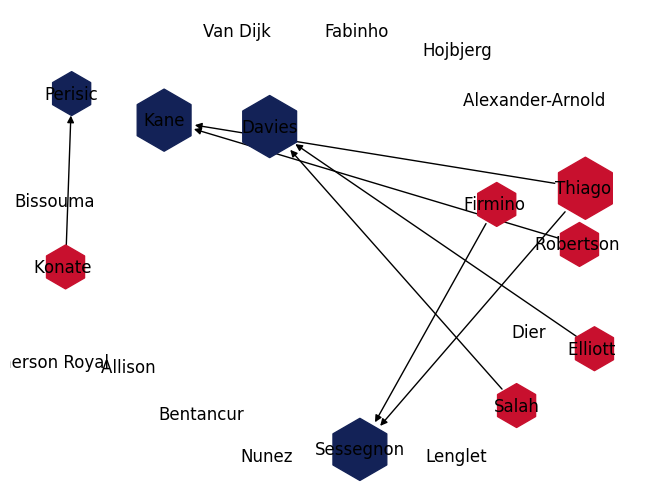

In [1992]:
# Liverpool Interceptions on Tottenham 0-10 mins
Interceptions(0,11,16, 28,'#C8102E','#132257','Tottenham players') 

Tottenham players Allison  Van Dijk  Robertson  Alexander-Arnold  Konate   \
13           Lloris         0         0          0                 0       0   
14           Lenglet        1         0          0                 0       0   
15            Davies        0         0          0                 0       0   
16              Dier        0         0          0                 0       0   
17    Emerson Royal         1         0          0                 0       0   
18         Sessegnon        0         0          0                 1       0   
19          Hojbjerg        0         0          0                 0       0   
20          Bissouma        0         0          0                 0       0   
21         Bentancur        0         0          0                 1       1   
22           Perisic        0         0          0                 0       0   
23              Kane        0         0          0                 0       0   

   Fabinho Elliott  Thiago  Firmino  Salah Nunez  
13       0        0       0        0     0     0  
14       0        1       0        0     0     0  
15       0        0       0        0     0     0  
16       0        0       0        0     0     0  
17       0        0       0        0     0     0  
18       0        0       0        0     0     0  
19       0        0       0        0     0     0  
20       0        0       0        0     0     0  
21       0        1       0        0     0     0  
22       0        1       0        0     0     0  
23       2        0       1        0     0     0

Player:  Elliott  | Degree Centrality:  3
Player:  Bentancur | Degree Centrality:  3
Player:  Allison  | Degree Centrality:  2
Player:  Alexander-Arnold  | Degree Centrality:  2
Player:  Lenglet | Degree Centrality:  2
Player:  Kane | Degree Centrality:  2
Player:  Konate  | Degree Centrality:  1
Player:  Fabinho | Degree Centrality:  1
Player:  Thiago  | Degree Centrality:  1
Player:  Emerson Royal  | Degree Centrality:  1
Player:  Sessegnon | Degree Centrality:  1

Player:  Bentancur | Closeness Centrality:  0.15 | Degree:  3
Player:  Lenglet | Closeness Centrality:  0.1 | Degree:  2
Player:  Kane | Closeness Centrality:  0.1 | Degree:  2
Player:  Emerson Royal  | Closeness Centrality:  0.05 | Degree:  1
Player:  Sessegnon | Closeness Centrality:  0.05 | Degree:  1
Player:  Perisic | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree:  2
Player:  Van Dijk  | Closeness Centrality:  0.0 | Degree:  0
Player:  Robertson  | Closeness Centralit

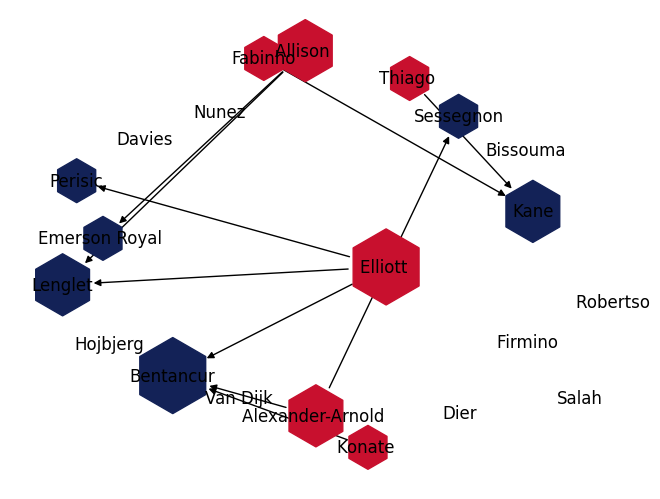

In [1993]:
# Liverpool Interceptions on Tottenham 10-20 mins
Interceptions(13, 24, 16, 28,'#C8102E','#132257','Tottenham players') 

Tottenham players Allison  Van Dijk  Robertson  Alexander-Arnold  Konate   \
26           Lloris         0         0          0                 0       0   
27           Lenglet        0         1          0                 0       0   
28            Davies        0         0          0                 0       1   
29              Dier        0         0          0                 0       0   
30    Emerson Royal         1         0          0                 0       0   
31         Sessegnon        0         1          0                 0       1   
32          Hojbjerg        0         0          0                 0       0   
33          Bissouma        0         0          0                 0       0   
34         Bentancur        0         0          0                 0       0   
35           Perisic        0         0          0                 0       0   
36              Kane        0         0          0                 0       0   

   Fabinho Elliott  Thiago  Firmino  Salah Nunez  
26       0        0       0        0     0     0  
27       0        0       0        0     0     0  
28       0        0       0        0     0     0  
29       0        0       0        0     0     1  
30       0        0       0        0     0     0  
31       0        0       0        0     0     0  
32       0        0       0        0     0     0  
33       0        0       1        0     0     0  
34       0        0       0        0     0     0  
35       0        0       0        0     0     0  
36       0        1       0        0     0     0

Player:  Van Dijk  | Degree Centrality:  2
Player:  Konate  | Degree Centrality:  2
Player:  Sessegnon | Degree Centrality:  2
Player:  Allison  | Degree Centrality:  1
Player:  Elliott  | Degree Centrality:  1
Player:  Thiago  | Degree Centrality:  1
Player:  Nunez | Degree Centrality:  1
Player:  Lenglet | Degree Centrality:  1
Player:  Davies | Degree Centrality:  1
Player:  Dier | Degree Centrality:  1
Player:  Emerson Royal  | Degree Centrality:  1

Player:  Sessegnon | Closeness Centrality:  0.1 | Degree:  2
Player:  Lenglet | Closeness Centrality:  0.05 | Degree:  1
Player:  Davies | Closeness Centrality:  0.05 | Degree:  1
Player:  Dier | Closeness Centrality:  0.05 | Degree:  1
Player:  Emerson Royal  | Closeness Centrality:  0.05 | Degree:  1
Player:  Bissouma | Closeness Centrality:  0.05 | Degree:  1
Player:  Kane | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree:  1
Player:  Van Dijk  | Closeness Centrality:  0.0 | Degree:  

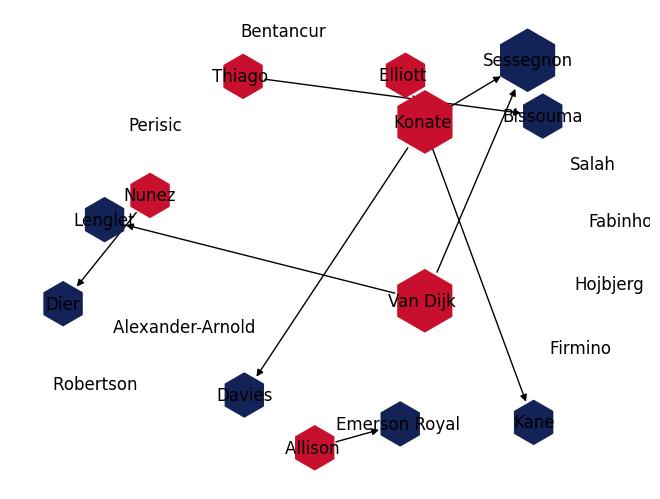

In [1994]:
# Liverpool Interceptions on Tottenham 20-30 mins
Interceptions(26, 37, 16, 28,'#C8102E','#132257','Tottenham players') 

Tottenham players Allison  Van Dijk  Robertson  Alexander-Arnold  Konate   \
39           Lloris         0         0          0                 0       0   
40           Lenglet        0         0          0                 0       0   
41            Davies        0         0          0                 1       1   
42              Dier        0         0          1                 0       1   
43    Emerson Royal         0         0          1                 0       0   
44         Sessegnon        0         0          0                 1       0   
45          Hojbjerg        0         0          0                 0       0   
46          Bissouma        0         1          0                 0       0   
47         Bentancur        0         0          0                 0       0   
48           Perisic        0         0          0                 0       1   
49              Kane        1         0          0                 0       0   

   Fabinho Elliott  Thiago  Firmino  Salah Nunez  
39       0        0       0        0     0     0  
40       0        0       0        0     0     0  
41       0        0       0        0     0     0  
42       0        0       0        0     1     0  
43       0        0       2        0     0     0  
44       0        1       0        0     0     0  
45       1        0       0        0     0     0  
46       1        0       0        0     0     0  
47       0        0       0        0     0     0  
48       0        1       0        0     0     0  
49       0        0       0        0     0     0

Player:  Konate  | Degree Centrality:  3
Player:  Dier | Degree Centrality:  3
Player:  Robertson  | Degree Centrality:  2
Player:  Alexander-Arnold  | Degree Centrality:  2
Player:  Fabinho | Degree Centrality:  2
Player:  Elliott  | Degree Centrality:  2
Player:  Davies | Degree Centrality:  2
Player:  Emerson Royal  | Degree Centrality:  2
Player:  Sessegnon | Degree Centrality:  2
Player:  Bissouma | Degree Centrality:  2
Player:  Perisic | Degree Centrality:  2

Player:  Dier | Closeness Centrality:  0.15 | Degree:  3
Player:  Davies | Closeness Centrality:  0.1 | Degree:  2
Player:  Emerson Royal  | Closeness Centrality:  0.1 | Degree:  2
Player:  Sessegnon | Closeness Centrality:  0.1 | Degree:  2
Player:  Bissouma | Closeness Centrality:  0.1 | Degree:  2
Player:  Perisic | Closeness Centrality:  0.1 | Degree:  2
Player:  Hojbjerg | Closeness Centrality:  0.05 | Degree:  1
Player:  Kane | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | 

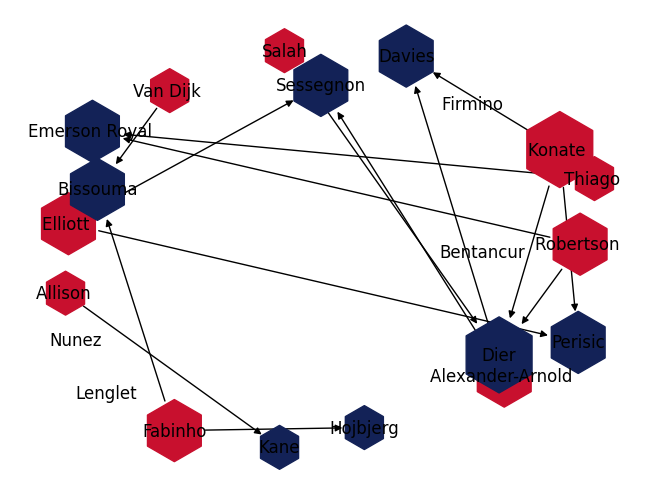

In [1995]:
# Liverpool Interceptions on Tottenham 30-40 mins
Interceptions(39, 50, 16, 28,'#C8102E','#132257','Tottenham players') 

Tottenham players Allison  Van Dijk  Robertson  Alexander-Arnold  Konate   \
52           Lloris         0         0          0                 0       0   
53           Lenglet        0         0          0                 0       0   
54            Davies        1         0          0                 0       0   
55              Dier        0         0          0                 0       0   
56    Emerson Royal         0         1          0                 0       1   
57         Sessegnon        0         0          0                 0       0   
58          Hojbjerg        0         0          0                 0       0   
59          Bissouma        0         0          0                 0       0   
60         Bentancur        0         0          0                 0       0   
61           Perisic        0         0          1                 0       0   
62              Kane        0         0          0                 0       0   

   Fabinho Elliott  Thiago  Firmino  Salah Nunez  
52       0        0       0        1     0     0  
53       1        0       0        0     0     0  
54       2        0       0        0     0     0  
55       1        0       1        0     0     0  
56       0        0       0        0     0     1  
57       0        1       0        0     0     0  
58       0        2       0        0     0     0  
59       0        0       0        0     0     0  
60       0        0       0        0     0     1  
61       0        0       0        0     0     1  
62       0        0       0        0     0     0

Player:  Fabinho | Degree Centrality:  3
Player:  Nunez | Degree Centrality:  3
Player:  Emerson Royal  | Degree Centrality:  3
Player:  Elliott  | Degree Centrality:  2
Player:  Davies | Degree Centrality:  2
Player:  Dier | Degree Centrality:  2
Player:  Perisic | Degree Centrality:  2
Player:  Allison  | Degree Centrality:  1
Player:  Van Dijk  | Degree Centrality:  1
Player:  Robertson  | Degree Centrality:  1
Player:  Konate  | Degree Centrality:  1

Player:  Emerson Royal  | Closeness Centrality:  0.15 | Degree:  3
Player:  Davies | Closeness Centrality:  0.1 | Degree:  2
Player:  Dier | Closeness Centrality:  0.1 | Degree:  2
Player:  Perisic | Closeness Centrality:  0.1 | Degree:  2
Player:  Lenglet | Closeness Centrality:  0.05 | Degree:  1
Player:  Sessegnon | Closeness Centrality:  0.05 | Degree:  1
Player:  Hojbjerg | Closeness Centrality:  0.05 | Degree:  1
Player:  Bentancur | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree

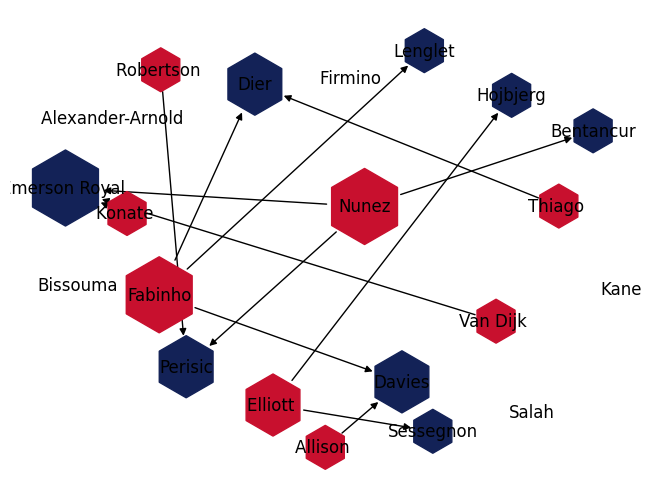

In [1996]:
# Liverpool Interceptions on Tottenham 40-50 mins
Interceptions(52, 63, 16, 28,'#C8102E','#132257','Tottenham players') 

Tottenham players Allison  Van Dijk  Robertson  Alexander-Arnold  Konate   \
65           Lloris         0         1          0                 0       0   
66           Lenglet        0         0          0                 0       0   
67            Davies        0         0          0                 0       0   
68              Dier        0         0          0                 0       0   
69    Emerson Royal         0         0          0                 0       0   
70         Sessegnon        0         0          0                 0       0   
71          Hojbjerg        0         0          0                 0       0   
72          Bissouma        0         0          0                 0       1   
73         Bentancur        0         1          0                 0       0   
74           Perisic        0         0          0                 0       1   
75              Kane        0         0          0                 0       1   

   Fabinho Elliott  Thiago  Firmino  Salah Nunez  
65       0        0       0        0     0     0  
66       0        0       1        0     0     1  
67       0        0       1        0     0     0  
68       0        0       0        0     0     0  
69       0        0       0        0     0     1  
70       0        0       0        0     0     0  
71       0        0       0        0     0     0  
72       0        0       0        0     0     0  
73       0        0       0        0     0     0  
74       1        0       0        0     0     0  
75       0        0       0        0     0     0

Player:  Konate  | Degree Centrality:  3
Player:  Thiago  | Degree Centrality:  2
Player:  Nunez | Degree Centrality:  2
Player:  Lenglet | Degree Centrality:  2
Player:  Perisic | Degree Centrality:  2
Player:  Van Dijk  | Degree Centrality:  1
Player:  Fabinho | Degree Centrality:  1
Player:  Davies | Degree Centrality:  1
Player:  Emerson Royal  | Degree Centrality:  1
Player:  Bissouma | Degree Centrality:  1
Player:  Bentancur | Degree Centrality:  1

Player:  Lenglet | Closeness Centrality:  0.1 | Degree:  2
Player:  Perisic | Closeness Centrality:  0.1 | Degree:  2
Player:  Davies | Closeness Centrality:  0.05 | Degree:  1
Player:  Emerson Royal  | Closeness Centrality:  0.05 | Degree:  1
Player:  Bissouma | Closeness Centrality:  0.05 | Degree:  1
Player:  Bentancur | Closeness Centrality:  0.05 | Degree:  1
Player:  Kane | Closeness Centrality:  0.05 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree:  0
Player:  Van Dijk  | Closeness Centrality:  0.0 | Degre

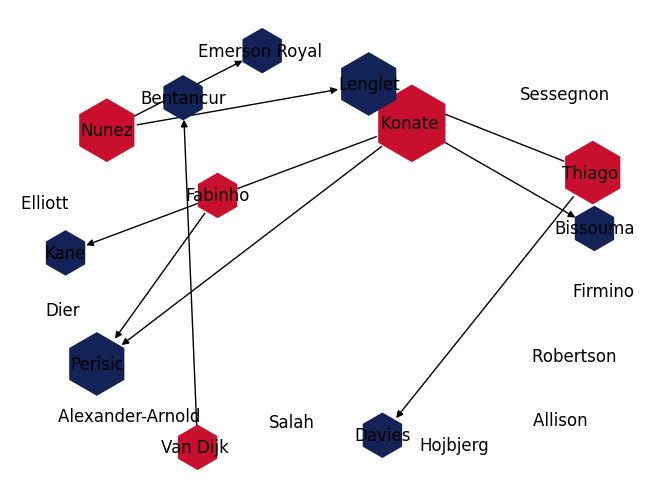

In [1997]:
# Liverpool Interceptions on Tottenham 50-60 mins
Interceptions(65, 76, 16, 28,'#C8102E','#132257','Tottenham players') 

In [1998]:
# Liverpool Interceptions on Tottenham 60-70 mins
Interceptions(78, 91, 16, 28,'#C8102E','#132257','Tottenham players') 

Tottenham players Allison  Van Dijk  Robertson  Alexander-Arnold  Konate   \
78           Lloris         0         0          0                 0       0   
79           Lenglet        0         0          0                 1       0   
80            Davies        0         1          0                 1       0   
81              Dier        0         0          0                 0       0   
82    Emerson Royal         0         0          0                 0       0   
83         Sessegnon        0         0          0                 0       1   
84          Hojbjerg        0         0          0                 0       0   
85          Bissouma        0         0          0                 0       0   
86         Bentancur        0         0          0                 0       0   
87           Perisic        0         0          0                 0       0   
88              Kane        0         0          0                 0       0   
89           Doherty        0         0          0                 0       0   
90        Kulusevski        0         1          0                 0       0   

   Fabinho Elliott  Thiago  Firmino  Salah Nunez  
78       0        0       0        0     0     0  
79       0        0       0        0     0     0  
80       0        0       0        0     0     0  
81       0        0       0        0     0     1  
82       0        0       0        0     0     0  
83       0        0       0        0     0     0  
84       0        0       0        0     0     0  
85       0        0       0        0     0     0  
86       0        0       0        0     0     0  
87       0        0       0        0     0     0  
88       1        1       0        0     0     0  
89       0        0       0        0     0     0  
90       0        0       0        0     0     0

Player:  Van Dijk  | Degree Centrality:  2
Player:  Alexander-Arnold  | Degree Centrality:  2
Player:  Davies | Degree Centrality:  2
Player:  Kane | Degree Centrality:  2
Player:  Konate  | Degree Centrality:  1
Player:  Fabinho | Degree Centrality:  1
Player:  Elliott  | Degree Centrality:  1
Player:  Nunez | Degree Centrality:  1
Player:  Lenglet | Degree Centrality:  1
Player:  Dier | Degree Centrality:  1
Player:  Sessegnon | Degree Centrality:  1

Player:  Davies | Closeness Centrality:  0.09090909090909091 | Degree:  2
Player:  Kane | Closeness Centrality:  0.09090909090909091 | Degree:  2
Player:  Lenglet | Closeness Centrality:  0.045454545454545456 | Degree:  1
Player:  Dier | Closeness Centrality:  0.045454545454545456 | Degree:  1
Player:  Sessegnon | Closeness Centrality:  0.045454545454545456 | Degree:  1
Player:  Kulusevski | Closeness Centrality:  0.045454545454545456 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree:  0
Player:  Van Dijk  | Closeness

Tottenham players Allison  Van Dijk  Robertson  Alexander-Arnold  Konate   \
93            Lloris         0         1          0                 0       0   
94            Lenglet        0         0          0                 0       0   
95             Davies        0         0          0                 0       1   
96               Dier        0         0          0                 0       0   
97     Emerson Royal         0         0          0                 0       0   
98          Sessegnon        0         0          0                 0       0   
99           Hojbjerg        0         2          1                 0       1   
100          Bissouma        0         1          0                 0       0   
101         Bentancur        0         0          0                 0       0   
102           Perisic        0         0          0                 1       0   
103              Kane        0         0          0                 0       0   
104           Doherty        0         1          0                 0       0   
105        Kulusevski        0         0          0                 0       0   

    Fabinho Elliott  Thiago  Firmino  Salah Nunez  
93        0        0       0        0     0     0  
94        0        0       0        0     0     0  
95        0        0       0        0     0     0  
96        0        0       0        0     0     0  
97        0        0       0        0     0     0  
98        0        0       0        0     0     0  
99        0        0       0        0     0     0  
100       1        0       0        0     0     0  
101       0        0       0        0     0     0  
102       1        0       0        0     0     1  
103       0        0       0        0     0     0  
104       0        0       1        0     0     0  
105       0        0       0        0     0     0

Player:  Van Dijk  | Degree Centrality:  3
Player:  Hojbjerg | Degree Centrality:  3
Player:  Perisic | Degree Centrality:  3
Player:  Konate  | Degree Centrality:  2
Player:  Fabinho | Degree Centrality:  2
Player:  Bissouma | Degree Centrality:  2
Player:  Doherty | Degree Centrality:  2
Player:  Robertson  | Degree Centrality:  1
Player:  Alexander-Arnold  | Degree Centrality:  1
Player:  Thiago  | Degree Centrality:  1
Player:  Nunez | Degree Centrality:  1

Player:  Hojbjerg | Closeness Centrality:  0.13636363636363635 | Degree:  3
Player:  Perisic | Closeness Centrality:  0.13636363636363635 | Degree:  3
Player:  Bissouma | Closeness Centrality:  0.09090909090909091 | Degree:  2
Player:  Doherty | Closeness Centrality:  0.09090909090909091 | Degree:  2
Player:  Davies | Closeness Centrality:  0.045454545454545456 | Degree:  1
Player:  Allison  | Closeness Centrality:  0.0 | Degree:  0
Player:  Van Dijk  | Closeness Centrality:  0.0 | Degree:  3
Player:  Robertson  | Closeness Cen

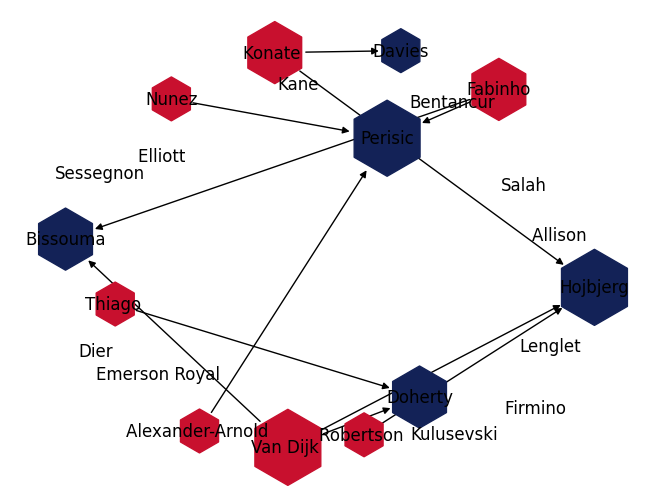

In [1999]:
# Liverpool Interceptions on Tottenham 70-80 mins
Interceptions(93, 106, 16, 28,'#C8102E','#132257','Tottenham players') 

Tottenham players  Allison   Van Dijk   Robertson   Alexander-Arnold   \
107  Tottenham players  Allison   Van Dijk   Robertson   Alexander-Arnold    
108            Lloris          0          0           0                  0   
109            Lenglet         0          0           0                  0   
110             Davies         0          0           0                  0   
111               Dier         0          0           0                  0   
112     Emerson Royal          0          0           0                  0   
113          Sessegnon         0          0           0                  0   
114           Hojbjerg         1          0           1                  0   
115           Bissouma         0          0           0                  0   
116          Bentancur         0          0           0                  0   
117            Perisic         0          0           0                  2   
118               Kane         0          0           0                  0   
119            Doherty         0          1           1                  0   
120         Kulusevski         0          0           1                  0   
121             Moura          0          0           0                  0   

     Konate   Fabinho  Elliott   Thiago   Firmino   Salah  Nunez Unnamed: 28  \
107  Konate   Fabinho  Elliott   Thiago   Firmino   Salah  Nunez      Gomez    
108        0        0         0        0         0      0      0           0   
109        0        0         0        0         0      0      0           0   
110        0        0         0        0         0      0      0           0   
111        0        0         0        0         0      0      0           0   
112        0        0         0        0         0      0      0           0   
113        0        0         0        0         0      0      0           0   
114        0        0         0        0         0      0      0           0   
115        0        1         0        0         0      0      0           0   
116        0        0         0        0         0      0      0           0   
117        1        2         0        0         0      0      0           1   
118        1        0         0        0         0      0      0           0   
119        1        0         0        0         0      0      0           0   
120        0        0         0        1         0      0      0           0   
121        0        1         0        0         0      0      0           0   

    Unnamed: 29  
107      Jones   
108           0  
109           0  
110           0  
111           0  
112           0  
113           0  
114           0  
115           0  
116           0  
117           0  
118           0  
119           1  
120           0  
121           0

Player:  Perisic | Degree Centrality:  4
Player:  Doherty | Degree Centrality:  4
Player:  Robertson  | Degree Centrality:  3
Player:  Konate  | Degree Centrality:  3
Player:  Fabinho | Degree Centrality:  3
Player:  Hojbjerg | Degree Centrality:  2
Player:  Kulusevski | Degree Centrality:  2
Player:  Allison  | Degree Centrality:  1
Player:  Van Dijk  | Degree Centrality:  1
Player:  Alexander-Arnold  | Degree Centrality:  1
Player:  Thiago  | Degree Centrality:  1

Player:  Perisic | Closeness Centrality:  0.15384615384615385 | Degree:  4
Player:  Doherty | Closeness Centrality:  0.15384615384615385 | Degree:  4
Player:  Hojbjerg | Closeness Centrality:  0.07692307692307693 | Degree:  2
Player:  Kulusevski | Closeness Centrality:  0.07692307692307693 | Degree:  2
Player:  Bissouma | Closeness Centrality:  0.038461538461538464 | Degree:  1
Player:  Kane | Closeness Centrality:  0.038461538461538464 | Degree:  1
Player:  Moura  | Closeness Centrality:  0.038461538461538464 | Degree:  1

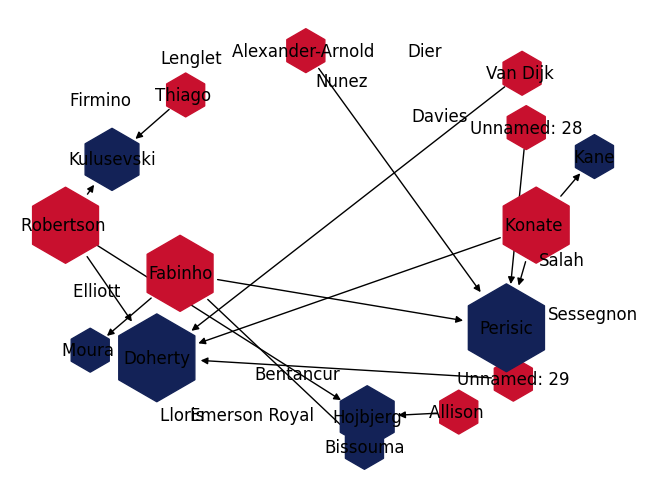

In [2000]:
# Liverpool Interceptions on Tottenham 80-90 mins
Interceptions(107, 122, 16, 30,'#C8102E','#132257','Tottenham players') 